## Self Organizing Maps

Self-organizing map (SOM) is a form of artificial neural network. It is trained by using
unsupervised learning to generate a two-dimensional presentation of the input metrics.
Therefore, SOM is one algorithm can realize dimensionality reduction. SOM is an appro-
priate tool for visualizing low-dimensional graphs of high-dimensional input data for its
function of preserving the topological properties of the input data space.

## Experiments

Regarding the SOM, we intended to explore the influence of changing inherent variables
of the algorithm. In the first experiment, the number of iterations were set as 500,
1000, and 2000 and the other parameters were fixed as following: OP learning rate =
1.0; Tuning phase (TP) learning rate = 1; TP Neighborhood distance = 1; and Map size
= 20x20. In the second experiment, the number of iterations was fixed as 500, and the
Neighbourhood distance was fixed at 1. While the Map size were set as 10×10, 20×20,
30×30. In the third experiment, the OP steps were fixed in 500 iterations and the TP
Neighborhood distances were set as 1, 10 and 20, while the other variables were not mod-
ified.

## Results

SOM neighborhood weight distance graph, which indicates the distances between neighboring neurons.

## Running a hybrid approach with SOM and FKMEANS

In [1]:
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
from time import time
import sompy

backend module://ipykernel.pylab.backend_inline version unknown


## Dealing with Actual Data

In [2]:
data_location = '/home/sarai/Documents/UPE/tcc/hybrid-approach/5_gait_symmetry_ratios_and_2_kinematic_features_from_180_samples2.csv'
complet_data = pd.read_csv(data_location)

data = complet_data.drop(['Age'], axis=1)
print(data.head())

data = data.values

      Rst     Rsw    RssR    RssL      Rs  ACT[s]  Cadence
0  1.0547  1.0581  1.4835  1.4884  0.9967  0.7080   2.8249
1  1.3552  0.9913  1.7594  1.2870  1.3671  0.7633   2.6201
2  1.0082  1.0353  1.3977  1.4353  0.9738  0.6920   2.8902
3  0.9524  0.9363  1.5200  1.4944  1.0171  0.6893   2.9014
4  0.8895  1.1240  1.3190  1.6667  0.7914  0.7307   2.7372


In [3]:
complet_data.head()

Rst     Rsw    RssR    RssL      Rs  ACT[s]  Cadence  Age
0  1.0547  1.0581  1.4835  1.4884  0.9967  0.7080   2.8249    0
1  1.3552  0.9913  1.7594  1.2870  1.3671  0.7633   2.6201    0
2  1.0082  1.0353  1.3977  1.4353  0.9738  0.6920   2.8902    0
3  0.9524  0.9363  1.5200  1.4944  1.0171  0.6893   2.9014    0
4  0.8895  1.1240  1.3190  1.6667  0.7914  0.7307   2.7372    0

In [4]:
group_0_10 = data[:30]
group_10_19 = data[30:60]
group_20_29 = data[60:90]
group_30_39 = data[90:120]
group_40_49 = data[120:150]
group_over_50 = data[150:]

In [5]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [6]:
def get_group(complet_data, i):
    val = complet_data.iloc[[i]]['Age']
    return val.item()

In [7]:
def cluster(som, n_clusters=6):
    from sklearn.cluster import KMeans
    cl_labels = KMeans(n_clusters=n_clusters).fit(
        som._normalizer.denormalize_by(som.data_raw, som.codebook.matrix)
    )
    return cl_labels

In [8]:
def plot_data(som, plot1=True, plot2=True, plot3=True, plot4=True, plot5=True, plot6=True):
    plt.figure(figsize=(20,20))
    if plot1:
        proj = som.project_data(group_0_10)
        coord = som.bmu_ind_to_xy(proj)
        plt.subplot(321)
        plt.plot(coord[:, 1], coord[:, 0], marker='.', linestyle='--', color='r')

    if plot2:
        proj = som.project_data(group_10_19)
        coord = som.bmu_ind_to_xy(proj)
        plt.subplot(322)
        plt.plot(coord[:, 1], coord[:, 0], c='black', linestyle='--',
                                marker='.')
    if plot3:
        proj = som.project_data(group_20_29)
        coord = som.bmu_ind_to_xy(proj)
        plt.subplot(323)
        plt.plot(coord[:, 1], coord[:, 0], c='brown',
                                marker='.', linestyle='--',)
    if plot4:
        proj = som.project_data(group_30_39)
        coord = som.bmu_ind_to_xy(proj)
        plt.subplot(324)
        plt.plot(coord[:, 1], coord[:, 0], c='blue',
                                marker='.', linestyle='--',)
    if plot5:
        proj = som.project_data(group_40_49)
        coord = som.bmu_ind_to_xy(proj)
        plt.subplot(325)
        plt.plot(coord[:, 1], coord[:, 0], c='green',
                                marker='.', linestyle='--',)
    if plot6:
        proj = som.project_data(group_over_50)
        coord = som.bmu_ind_to_xy(proj)
        plt.subplot(326)
        plt.plot(coord[:, 1], coord[:, 0], c='orange', marker='.', linestyle='--',)

In [9]:
def plot_dots(som, plot1=True, plot2=True, plot3=True, plot4=True, plot5=True, plot6=True):
    plt.figure(figsize=(20,20))
    if plot1:
        proj = som.project_data(group_0_10)
        coord = som.bmu_ind_to_xy(proj)
        plt.subplot(321)
        plt.scatter(coord[:, 1], coord[:, 0], s=2, alpha=1., c='Gray',
                                marker='o', cmap='jet', linewidths=3, edgecolor='Gray')

    if plot2:
        proj = som.project_data(group_10_19)
        coord = som.bmu_ind_to_xy(proj)
        plt.subplot(322)
        plt.scatter(coord[:, 1], coord[:, 0], s=2, alpha=1., c='black',
                                marker='o', cmap='jet', linewidths=3, edgecolor='black')
    if plot3:
        proj = som.project_data(group_20_29)
        coord = som.bmu_ind_to_xy(proj)
        plt.subplot(323)
        plt.scatter(coord[:, 1], coord[:, 0], s=2, alpha=1., c='brown',
                                marker='o', cmap='jet', linewidths=3, edgecolor='brown')
    if plot4:
        proj = som.project_data(group_30_39)
        coord = som.bmu_ind_to_xy(proj)
        plt.subplot(324)
        plt.scatter(coord[:, 1], coord[:, 0], s=2, alpha=1., c='blue',
                                marker='o', cmap='jet', linewidths=3, edgecolor='blue')
    if plot5:
        proj = som.project_data(group_40_49)
        coord = som.bmu_ind_to_xy(proj)
        plt.subplot(325)
        plt.scatter(coord[:, 1], coord[:, 0], s=2, alpha=1., c='green',
                                marker='o', cmap='jet', linewidths=3, edgecolor='green')
    if plot6:
        proj = som.project_data(group_over_50)
        coord = som.bmu_ind_to_xy(proj)
        plt.subplot(326)
        plt.scatter(coord[:, 1], coord[:, 0], s=2, alpha=1., c='red',
                                marker='o', cmap='jet', linewidths=3, edgecolor='red')

In [10]:
def plot_one_type(som, data, color):
    proj = som.project_data(data)
    coord = som.bmu_ind_to_xy(proj)
    plt.subplot(321)
    plt.plot(coord[:, 1], coord[:, 0], c=color,
                            marker='.', linestyle='--')

In [11]:
def get_prediction_vs_real(data, complet_data):
    # normalized_data = som._normalizer.normalize_by(som.data_raw, data)
    results = kmeans_labels.predict(data)
    complet_data['Cluster'] = results
    return complet_data

def get_false_positives(conf_matrix, num_classes=6):
    false_positive = []
    for i in range(num_classes):
        false_positive.append(sum(conf_matrix[:,i]) - conf_matrix[i,i])
    return false_positive

def get_false_negatives(conf_matrix, num_classes=6):
    false_negative = []
    for i in range(num_classes):
        false_negative.append(sum(conf_matrix[i,:]) - conf_matrix[i,i])
    return false_negative

def generate_confusion_matrix(complet_data, classes_name=['0~10', '10~19', '20~29', '30~39', '40~49', '>50']):
    from sklearn import metrics

    conf_matrix = metrics.confusion_matrix(complet_data['Age'], complet_data['Cluster'])
    plt.figure()
    plot_confusion_matrix(conf_matrix, classes=classes_name,
                          title='Confusion matrix, without normalization')
    print()
    return conf_matrix

def get_metrics(conf_matrix, num_classes=6):
    true_positives = np.diag(conf_matrix)
    false_positives = get_false_positives(conf_matrix, num_classes)
    false_negatives = get_false_negatives(conf_matrix, num_classes)

    true_positives = sum(true_positives)
    false_positives = sum(false_positives)
    false_negatives = sum(false_negatives)

    print()
    print('true_positives total:', true_positives)
    print('false_positives total:', false_positives)
    print('false_negatives total:', false_negatives)
    
def get_precision_recal_f1_score_and_accuracy(complet_data):
    precision = metrics.precision_score(complet_data['Age'], complet_data['Cluster'], average='macro')
    recal = metrics.recall_score(complet_data['Age'], complet_data['Cluster'], average='micro')
    f1_score = metrics.f1_score(complet_data['Age'], complet_data['Cluster'], average='weighted')
    accuracy = metrics.accuracy_score(complet_data['Age'], complet_data['Cluster'])
    
    print()
    print('Precision: ', precision)
    print('Recal: ', recal)
    print('F1-Score: ', f1_score)
    print('Accuracy: ', accuracy)

In [12]:
from sklearn import metrics

def evaluate_som(data, complet_data, n_clusters=6, classes_name=['0~10', '10~19', '20~29', '30~39', '40~49', '>50']):
    # define which cluster number represents each Age group.
    complet_data = get_prediction_vs_real(data, complet_data)

    # Plot confusion matrix
    conf_matrix = generate_confusion_matrix(complet_data, classes_name)
    
    # Show true positives, false negatives, false positives
    get_metrics(conf_matrix, num_classes=len(classes_name))
    
    # Show metrics
    get_precision_recal_f1_score_and_accuracy(complet_data)

In [13]:
def analyse_cluster_per_group(complet_data):
    complet_data[complet_data.Age.values == complet_data.Cluster.values]
    complet_data['Cluster'].value_counts()
    return complet_data.groupby('Age')['Cluster'].value_counts()

# Experiment 1
- Map Size = [50, 50]
- Iterations = 2000
- All the 7 features as input
- All the 6 groups to classify

In [14]:
mapsize = [50,50]

/home/sarai/.virtualenvs/hybrid-approach/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


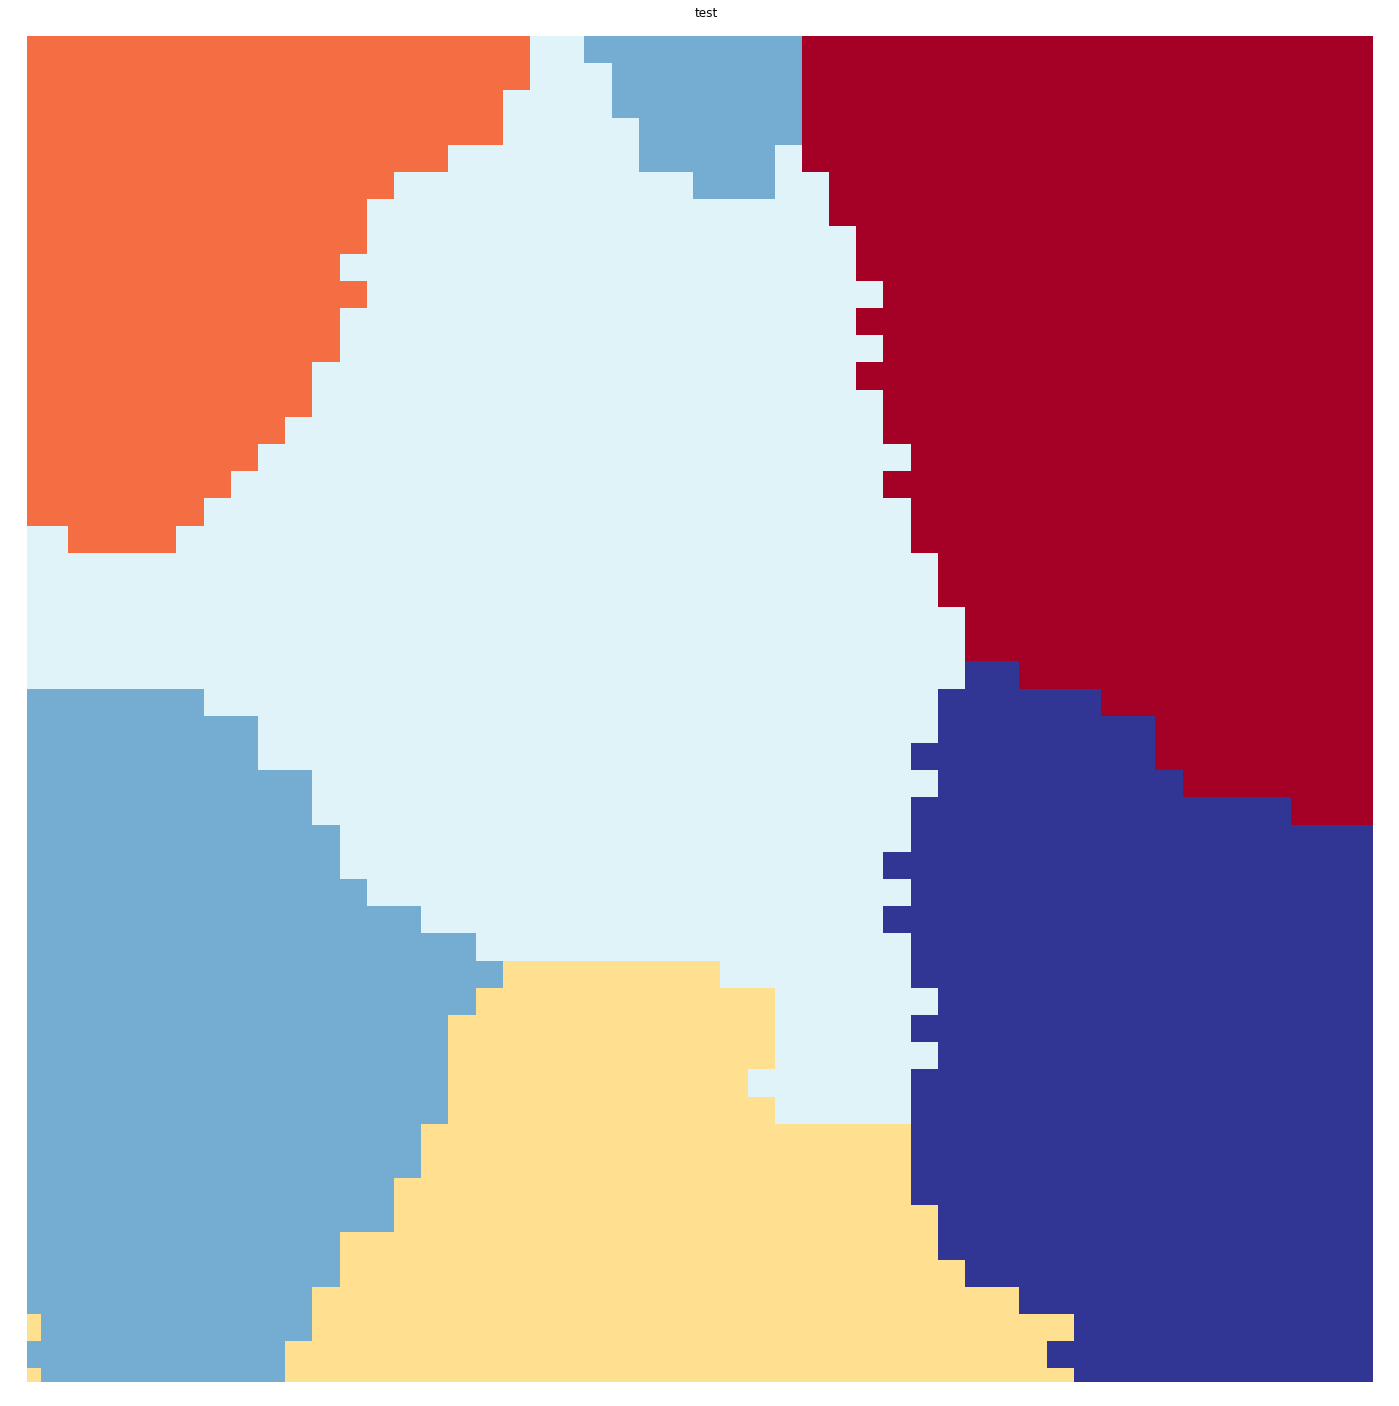

In [15]:
som = sompy.SOMFactory.build(
    data, mapsize, mask=None, mapshape='planar', 
    normalization='var', initialization='pca', 
    neighborhood='gaussian', training='batch', 
    name='sompy', lattice='hexa')
som.train(n_job=4, verbose=False, train_finetune_len=100, train_rough_len=2000)
vis  = sompy.mapview.View2DPacked(5, 5, 'test',text_size=12)  
kmeans_labels = cluster(som, n_clusters=6)
som.cluster_labels = kmeans_labels.labels_
vis.show(som, what='cluster')

/home/sarai/.virtualenvs/hybrid-approach/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


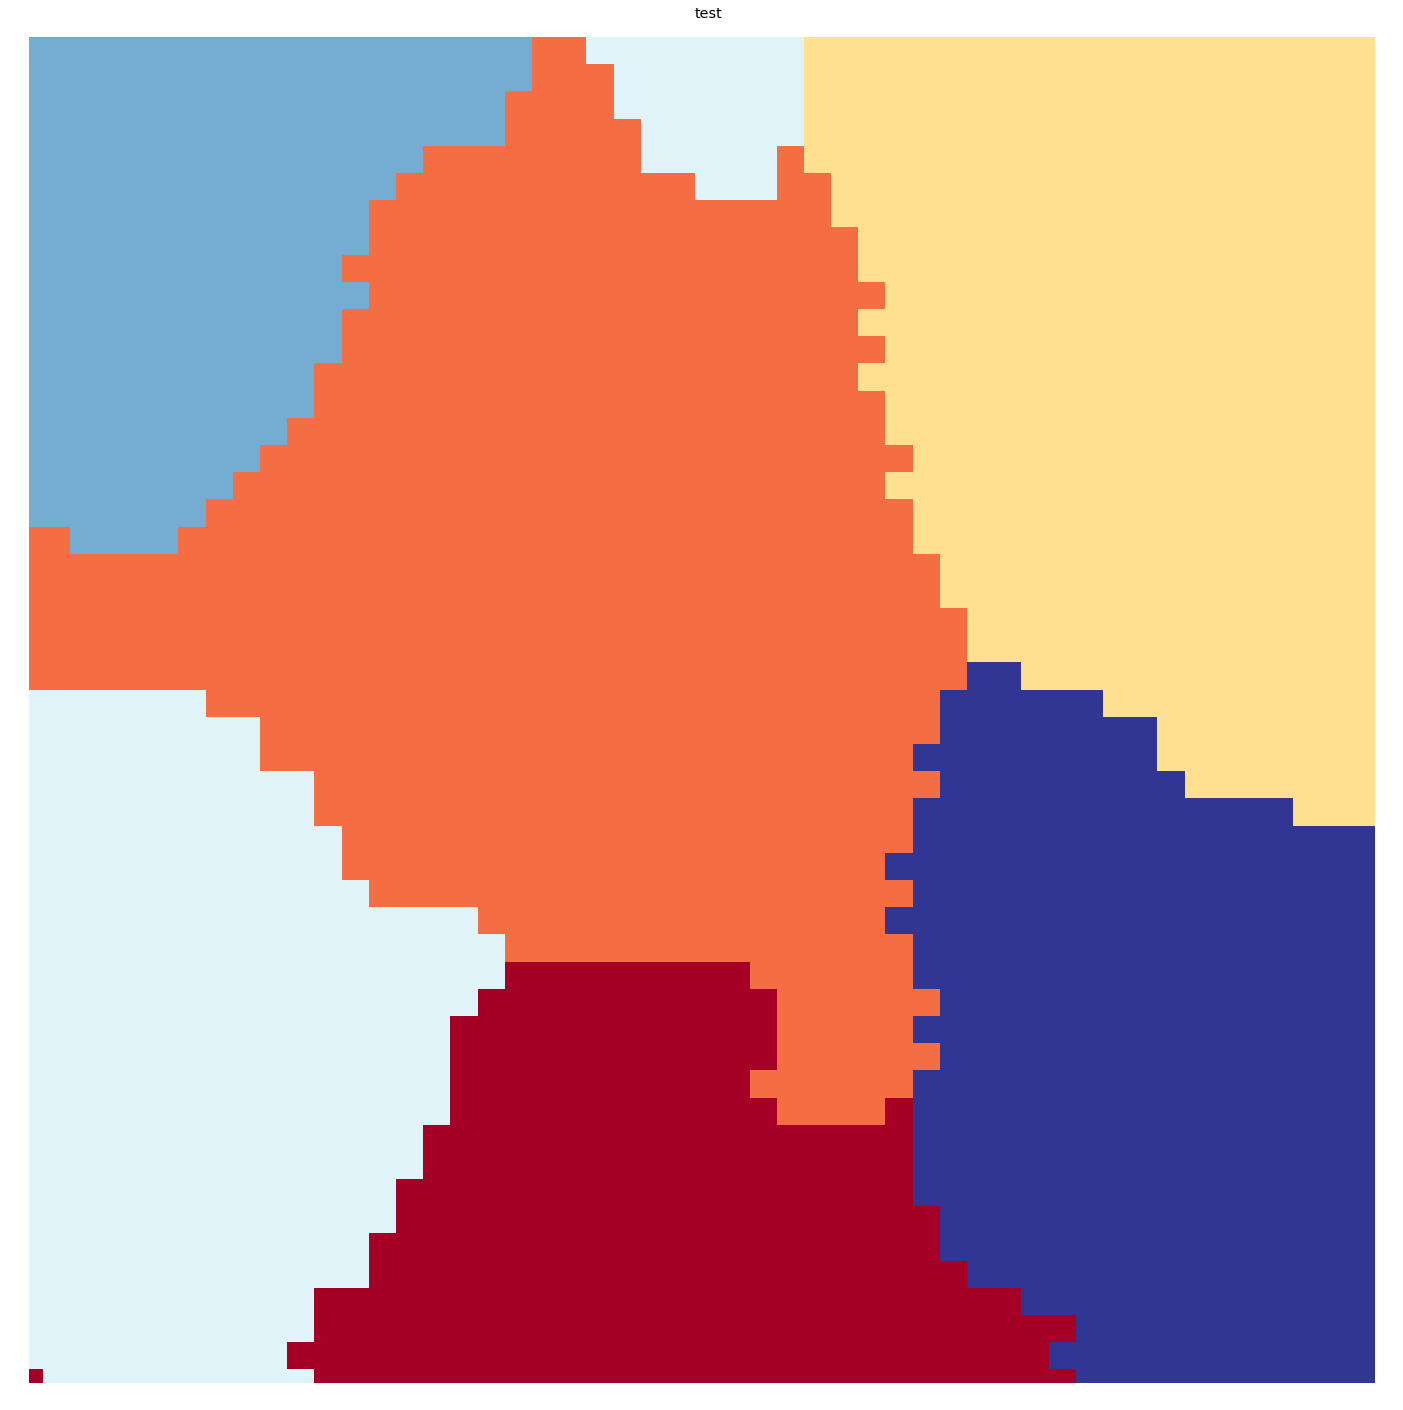

In [16]:
vis  = sompy.mapview.View2DPacked(20, 20, 'test',text_size=12)  
kmeans_labels = cluster(som, n_clusters=6)
som.cluster_labels = kmeans_labels.labels_
vis.show(som, what='cluster')

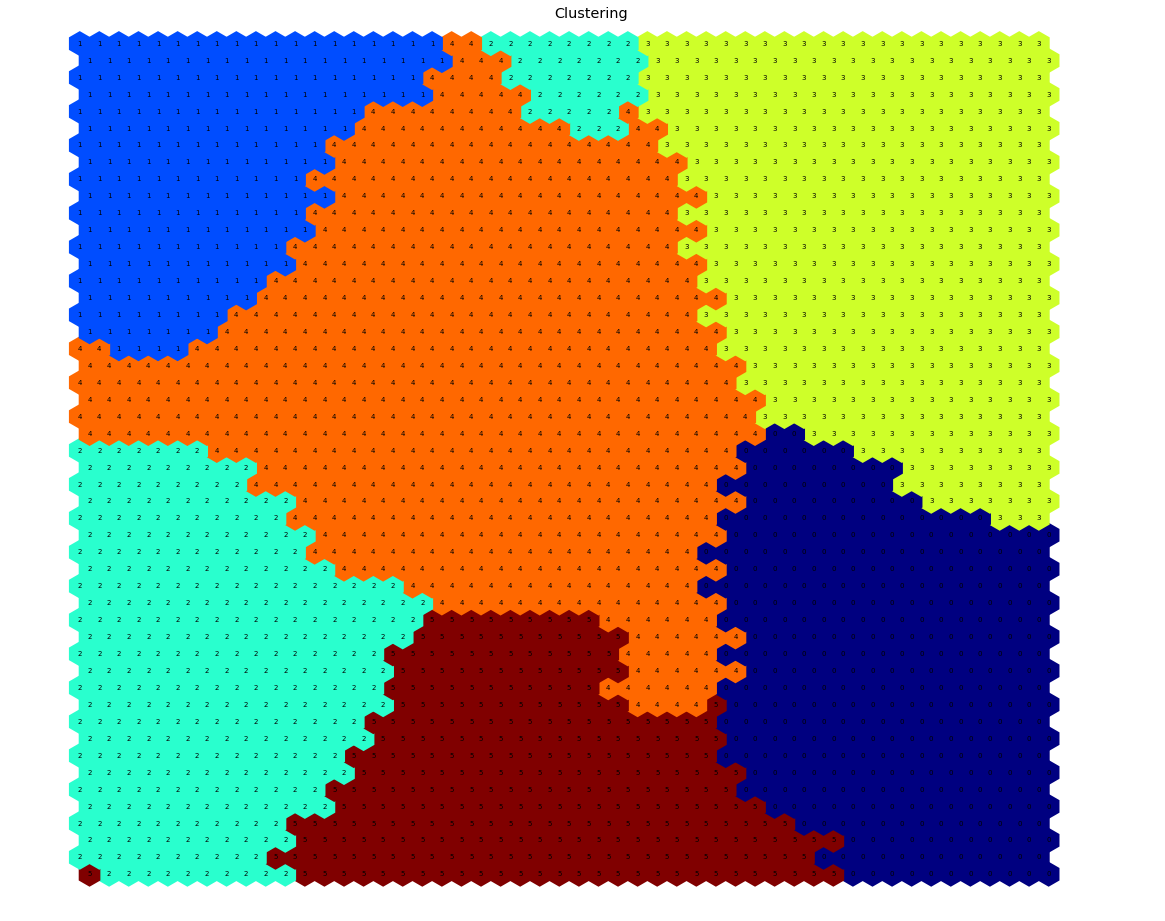

In [17]:
from sompy.visualization.hitmap import HitMapView
hits = HitMapView(20, 20,"Clustering",text_size=10, cmap=plt.cm.jet)
a = hits.show(som, anotate=True, onlyzeros=False, labelsize=7, cmap="jet")
plt.show()

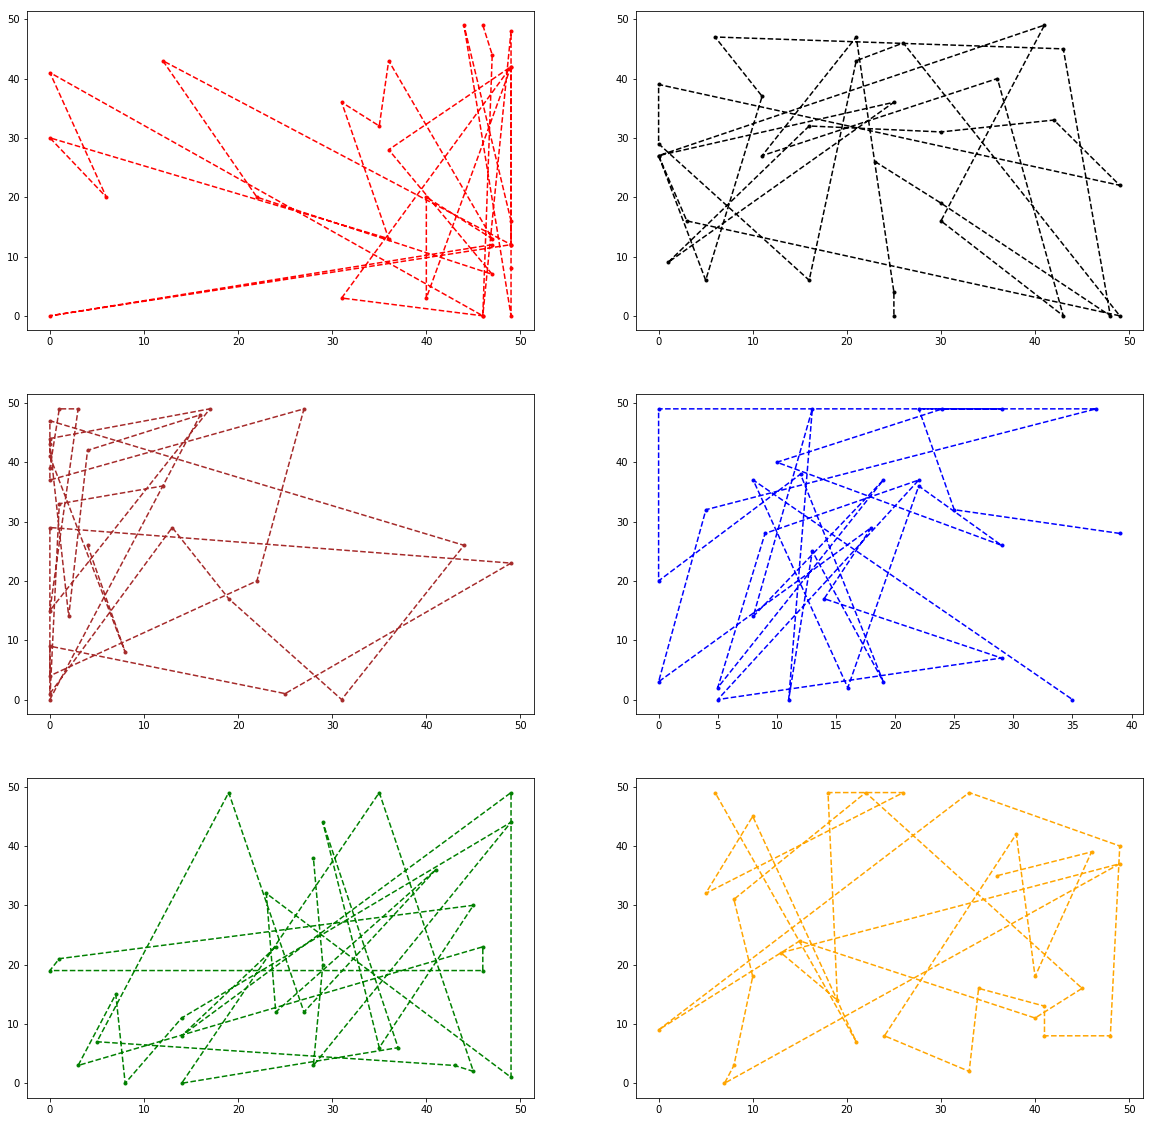

In [18]:
plot_data(som)

### Patterns learned by the neural network which are used to determine de winning neuron of each training instance

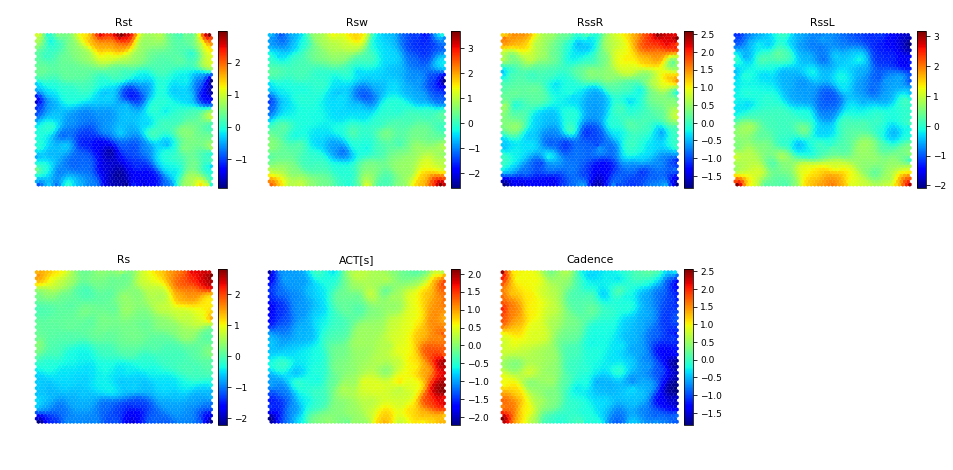

In [19]:
som.component_names = ['Rst', 'Rsw', 'RssR', 'RssL', 'Rs', 'ACT[s]', 'Cadence']
v = sompy.mapview.View2D(10,10,"", text_size=9)  
v.show(som, which_dim='all', cmap='jet', col_sz=4) #which_dim='all' default

Confusion matrix, without normalization
[[ 8  1  3 15  3  0]
 [ 5  3  9  3  6  4]
 [ 0  7 13  3  3  4]
 [ 1  6  5  1  8  9]
 [ 4  5  1  7 10  3]
 [ 5  3  4  8  6  4]]


true_positives total: 39
false_positives total: 141
false_negatives total: 141

Precision:  0.2184543549760941
Recal:  0.21666666666666667
F1-Score:  0.2153344831651412
Accuracy:  0.21666666666666667


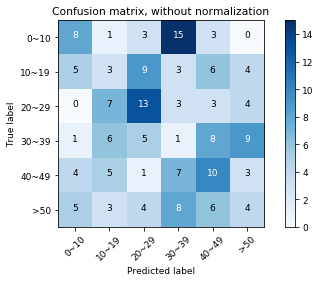

In [20]:
evaluate_som(data, complet_data)

On the previous experiment, I assumed that the relationship between groups and cluster was:

- '0~10' -> 0
- '10~19' -> 1
- '20~29' -> 2
- '30~39' -> 3
- '40~49' -> 4
- '>50' -> 5

Because we don't know what cluster represents each group.

In [21]:
analyse_cluster_per_group(complet_data)

Age  Cluster
0    3          15
     0           8
     2           3
     4           3
     1           1
1    2           9
     4           6
     0           5
     5           4
     1           3
     3           3
2    2          13
     1           7
     5           4
     3           3
     4           3
3    5           9
     4           8
     1           6
     2           5
     0           1
     3           1
4    4          10
     3           7
     1           5
     0           4
     5           3
     2           1
5    3           8
     4           6
     0           5
     2           4
     5           4
     1           3
Name: Cluster, dtype: int64

From the previous result, I can use the frequency of forecasts to choose the groups:
- '0~10' -> 3
- '10~19' -> 0
- '20~29' -> 4
- '30~39' -> 5
- '40~49' -> 1
- '>50' -> 2

Confusion matrix, without normalization
[[ 5  3  9  3  6  4]
 [ 4  5  1  7 10  3]
 [ 5  3  4  8  6  4]
 [ 8  1  3 15  3  0]
 [ 0  7 13  3  3  4]
 [ 1  6  5  1  8  9]]


true_positives total: 41
false_positives total: 139
false_negatives total: 139

Precision:  0.23256929289537986
Recal:  0.22777777777777777
F1-Score:  0.2275963280750664
Accuracy:  0.22777777777777777


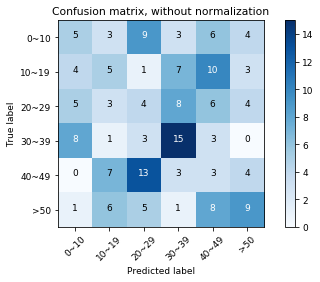

In [22]:
new_data = data.copy()
new_complet_data = complet_data.copy()

new_complet_data.loc[0:30, 'Age'] = 3
new_complet_data.loc[30:60, 'Age'] = 0
new_complet_data.loc[60:90, 'Age'] = 4
new_complet_data.loc[90:120, 'Age'] = 5
new_complet_data.loc[120:150, 'Age'] = 1
new_complet_data.loc[150:, 'Age'] = 2

evaluate_som(data, new_complet_data)

<hr>

# Experiment 2
- Map Size = [50, 50]
- Iterations = 2000
- All the 7 features as input
- Only 2 groups to classify
   - Group 1: 0~10
   - Group 3: 20~29

In [23]:
mapsize = [50,50]
group_1_and_3 = np.concatenate((group_0_10, group_20_29))

/home/sarai/.virtualenvs/hybrid-approach/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


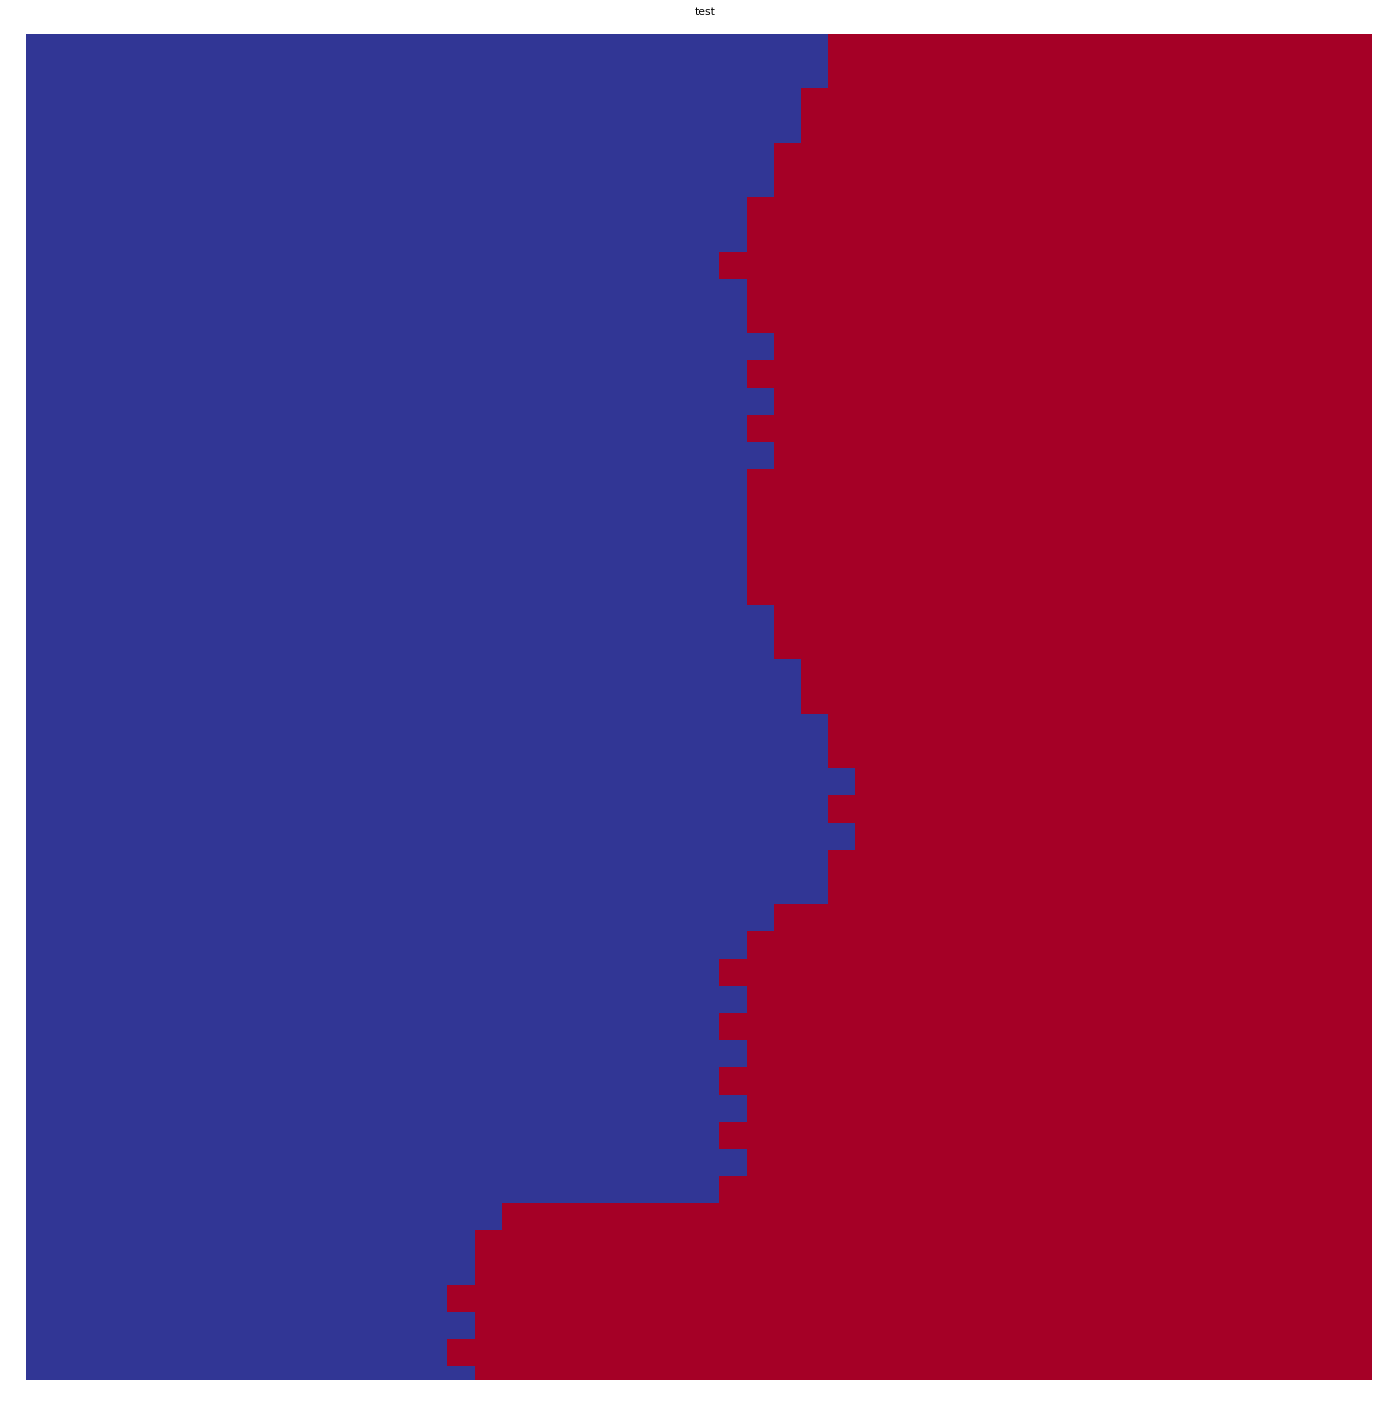

In [24]:
som = sompy.SOMFactory.build(
    group_1_and_3, mapsize, mask=None, mapshape='planar', lattice='hexa', 
    normalization='var', initialization='pca', neighborhood='gaussian', 
    training='batch', name='sompy'
)
som.train(n_job=4, verbose=False, train_finetune_len=100, train_rough_len=2000)

vis = sompy.mapview.View2DPacked(5, 5, 'test',text_size=12)  

kmeans_labels = cluster(som, n_clusters=2)

som.cluster_labels = kmeans_labels.labels_
vis.show(som, what='cluster')

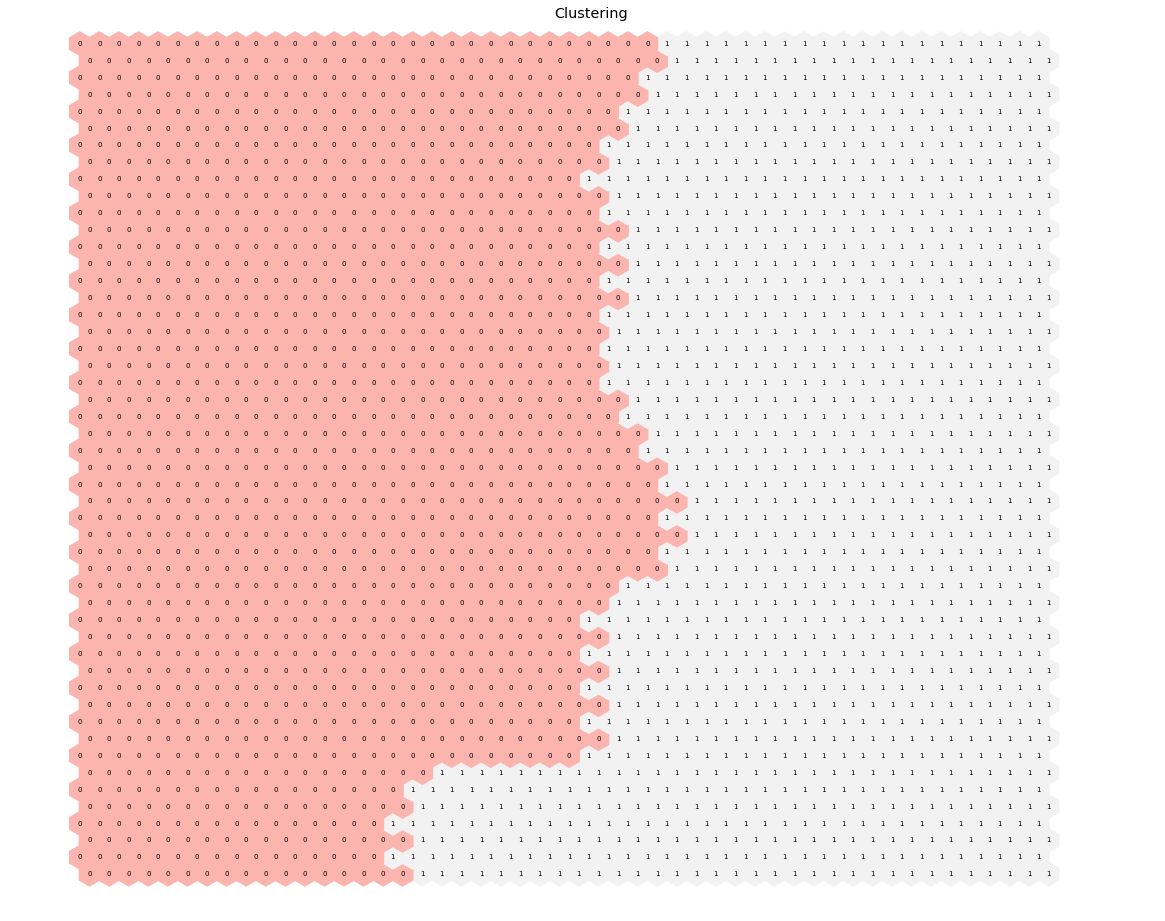

In [25]:
from sompy.visualization.hitmap import HitMapView
hits = HitMapView(20, 20,"Clustering",text_size=10, cmap=plt.cm.jet)
a = hits.show(som, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")
plt.show()

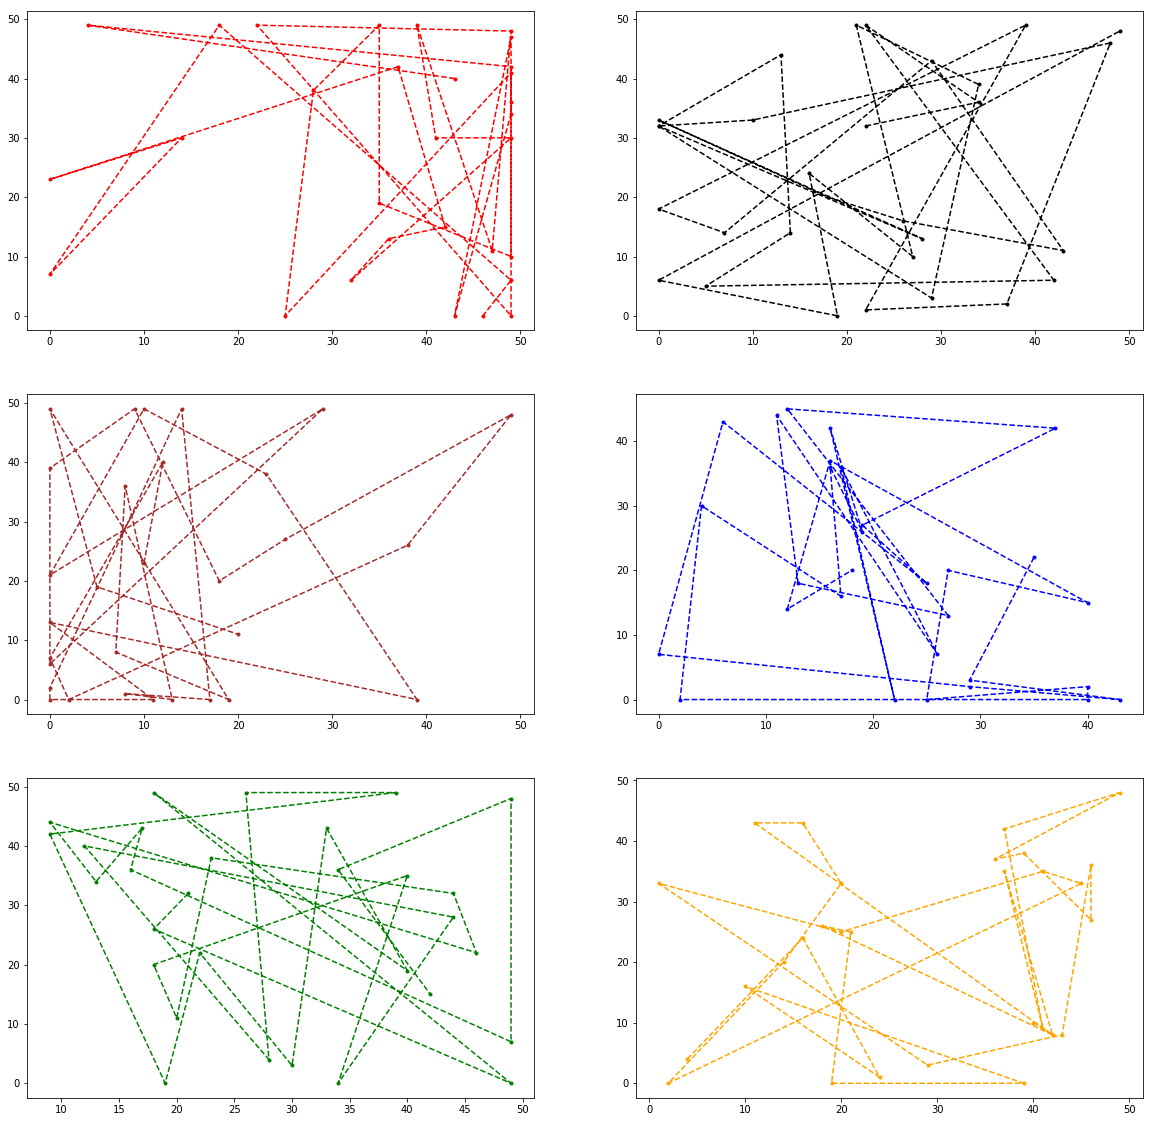

In [26]:
plot_data(som)

### Patterns learned by the neural network which are used to determine de winning neuron of each training instance

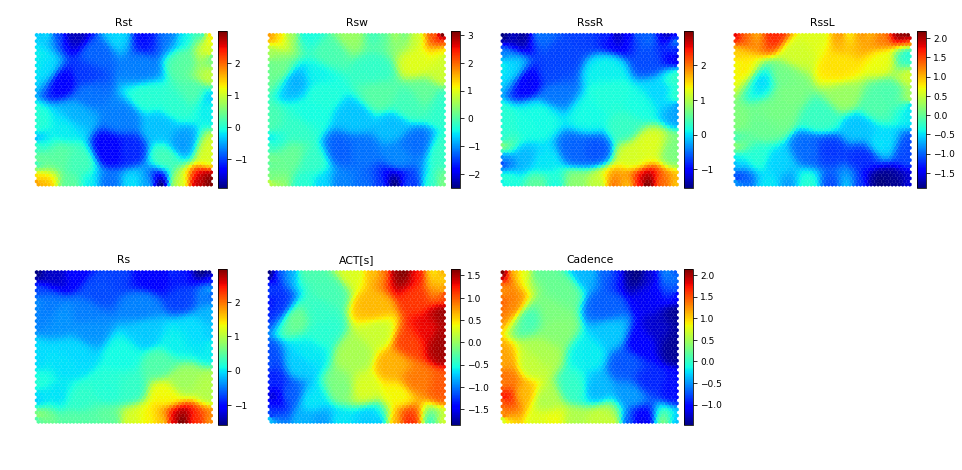

In [27]:
som.component_names = ['Rst', 'Rsw', 'RssR', 'RssL', 'Rs', 'ACT[s]', 'Cadence']
v = sompy.mapview.View2D(10,10,"", text_size=9)  
v.show(som, which_dim='all', cmap='jet', col_sz=4) #which_dim='all' default

In [28]:
new_complet_data = complet_data.copy()
new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 1].index)
new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 3].index)
new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 4].index)
new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 5].index)

Confusion matrix, without normalization
[[ 5 25]
 [26  4]]


true_positives total: 9
false_positives total: 51
false_negatives total: 51

Precision:  0.1496106785317019
Recal:  0.15
F1-Score:  0.14976382328424562
Accuracy:  0.15


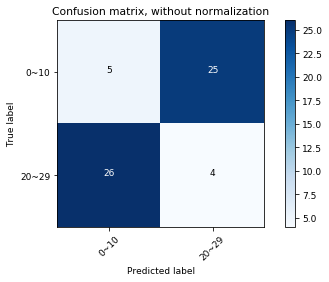

In [29]:
# Replaces age groups number by 0 and 1
new_complet_data.loc[new_complet_data['Age'] == 2, 'Age'] = 1

evaluate_som(group_1_and_3, new_complet_data, classes_name=['0~10', '20~29'])

In [30]:
analyse_cluster_per_group(new_complet_data)

Age  Cluster
0    1          25
     0           5
1    0          26
     1           4
Name: Cluster, dtype: int64

In [31]:
new_complet_data = complet_data.copy()
new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 1].index)
new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 3].index)
new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 4].index)
new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 5].index)

Confusion matrix, without normalization
[[26  4]
 [ 5 25]]


true_positives total: 51
false_positives total: 9
false_negatives total: 9

Precision:  0.850389321468298
Recal:  0.85
F1-Score:  0.8499583217560432
Accuracy:  0.85


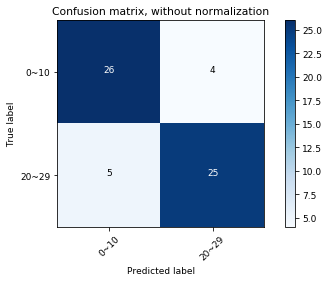

In [32]:
# Replaces age groups number by 0 and 1
new_complet_data.loc[new_complet_data['Age'] == 0, 'Age'] = 1
new_complet_data.loc[new_complet_data['Age'] == 2, 'Age'] = 0

evaluate_som(group_1_and_3, new_complet_data, classes_name=['0~10', '20~29'])

<hr>

# Experiment 3
- Map Size = [50, 50]
- Iterations = 2000
- All the 7 features as input
- Only 2 groups to classify
   - Group 5: 40~49
   - Group 6: >50

In [33]:
mapsize = [50,50]
group_5_and_6 = np.concatenate((group_40_49, group_over_50))

/home/sarai/.virtualenvs/hybrid-approach/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


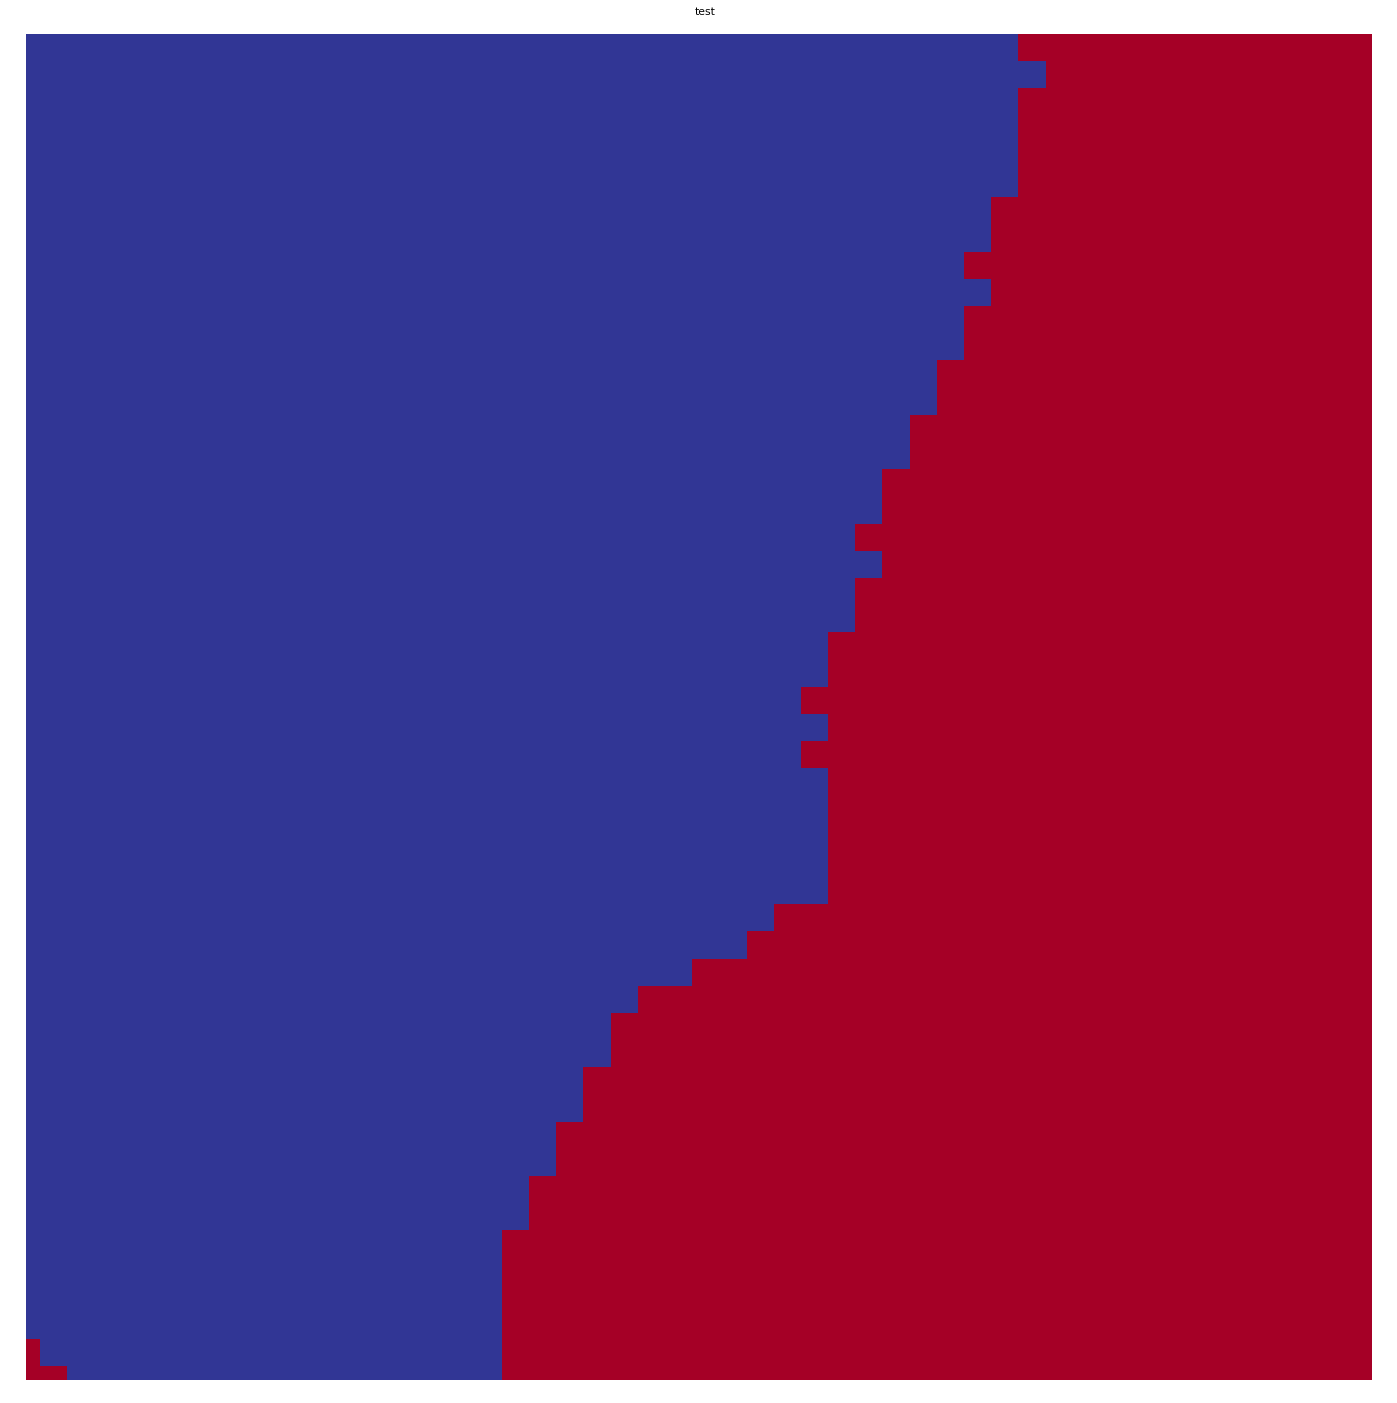

In [34]:
som = sompy.SOMFactory.build(
    group_5_and_6, mapsize, mask=None, mapshape='planar', lattice='hexa', 
    normalization='var', initialization='pca', neighborhood='gaussian', 
    training='batch', name='sompy'
)
som.train(n_job=4, verbose=False, train_finetune_len=100, train_rough_len=2000)

vis = sompy.mapview.View2DPacked(5, 5, 'test',text_size=12)  

kmeans_labels = cluster(som, n_clusters=2)

som.cluster_labels = kmeans_labels.labels_
vis.show(som, what='cluster')

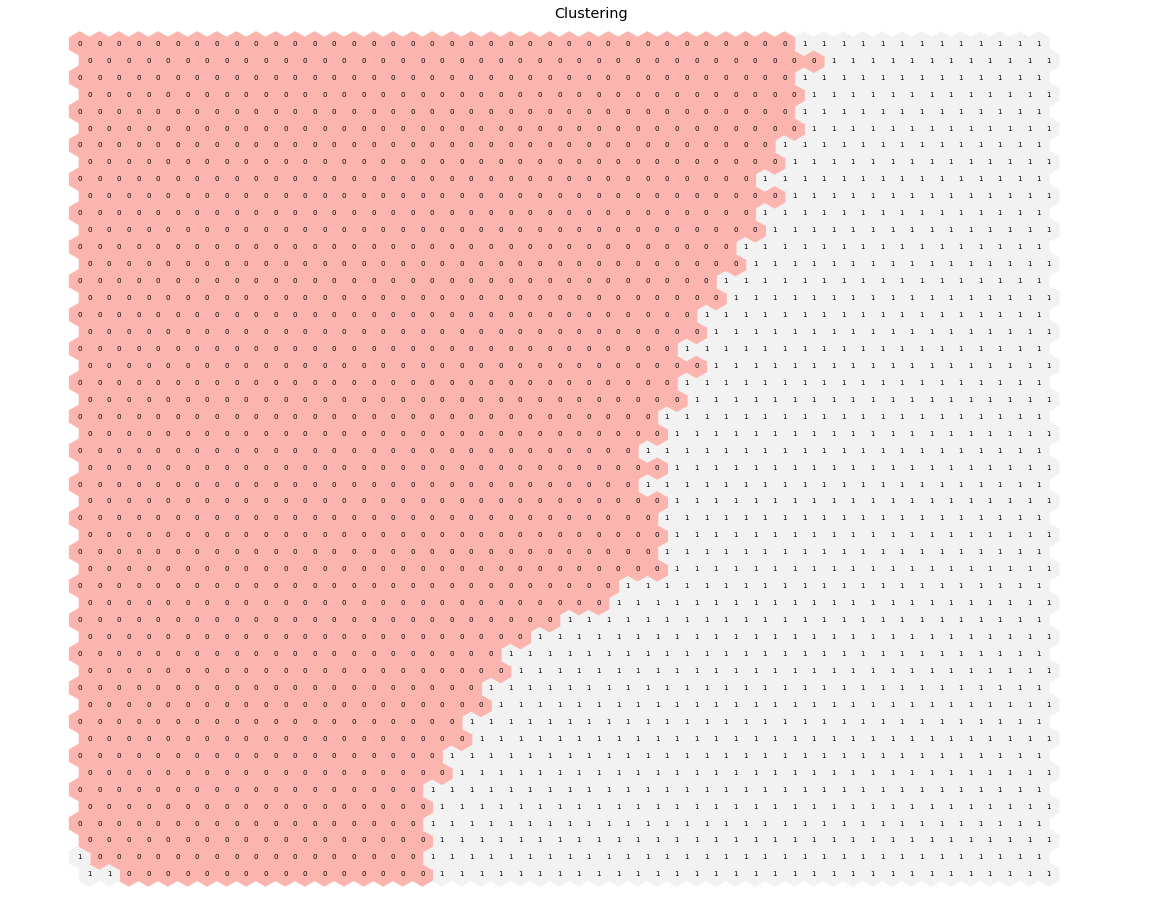

In [35]:
from sompy.visualization.hitmap import HitMapView
hits = HitMapView(20, 20,"Clustering",text_size=10, cmap=plt.cm.jet)
a = hits.show(som, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")
plt.show()

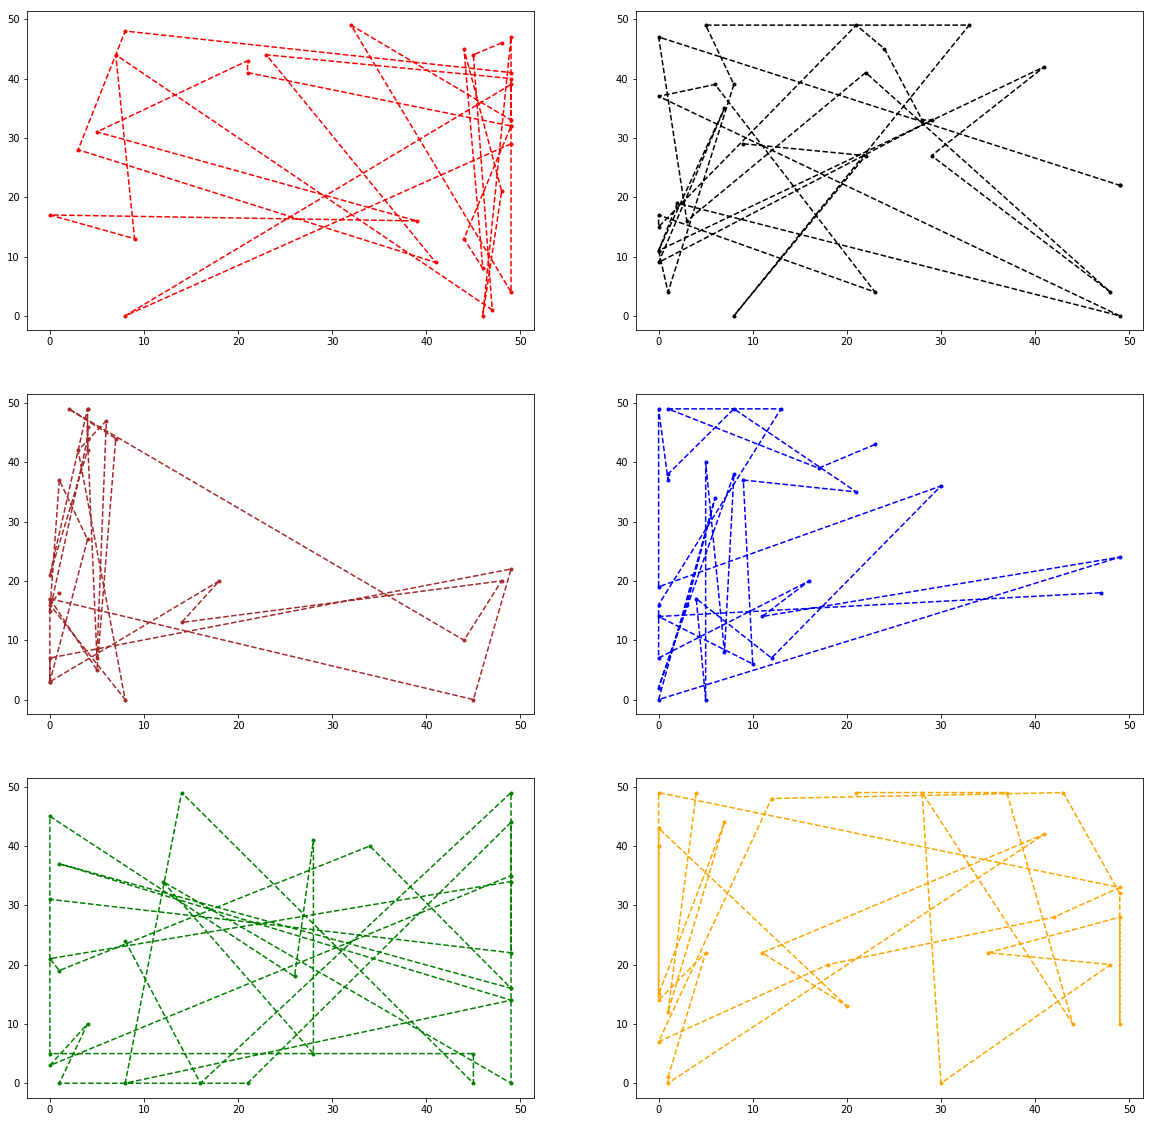

In [36]:
plot_data(som)

### Patterns learned by the neural network which are used to determine de winning neuron of each training instance

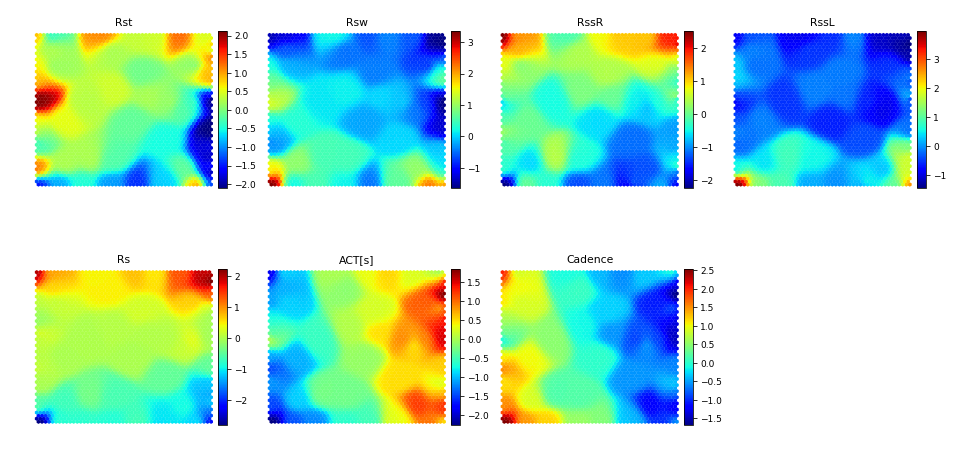

In [37]:
som.component_names = ['Rst', 'Rsw', 'RssR', 'RssL', 'Rs', 'ACT[s]', 'Cadence']
v = sompy.mapview.View2D(10,10,"", text_size=9)  
v.show(som, which_dim='all', cmap='jet', col_sz=4) #which_dim='all' default

In [38]:
new_complet_data = complet_data.copy()
new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 0].index)
new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 1].index)
new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 2].index)
new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 3].index)

Confusion matrix, without normalization
[[16 14]
 [19 11]]


true_positives total: 27
false_positives total: 33
false_negatives total: 33

Precision:  0.44857142857142857
Recal:  0.45
F1-Score:  0.4461538461538461
Accuracy:  0.45


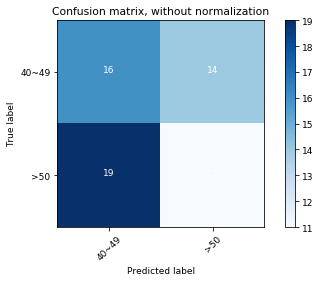

In [39]:
# Replaces age groups number by 0 and 1
new_complet_data.loc[new_complet_data['Age'] == 5, 'Age'] = 0
new_complet_data.loc[new_complet_data['Age'] == 4, 'Age'] = 1

evaluate_som(group_5_and_6, new_complet_data, classes_name=['40~49', '>50'])

In [40]:
analyse_cluster_per_group(new_complet_data)

Age  Cluster
0    0          16
     1          14
1    0          19
     1          11
Name: Cluster, dtype: int64

In [41]:
new_complet_data = complet_data.copy()
new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 0].index)
new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 1].index)
new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 2].index)
new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 3].index)

Confusion matrix, without normalization
[[19 11]
 [16 14]]


true_positives total: 33
false_positives total: 27
false_negatives total: 27

Precision:  0.5514285714285714
Recal:  0.55
F1-Score:  0.5468531468531469
Accuracy:  0.55


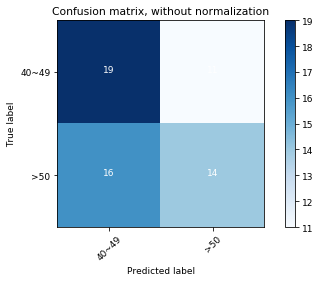

In [42]:
# Replaces age groups number by 0 and 1
new_complet_data.loc[new_complet_data['Age'] == 5, 'Age'] = 1
new_complet_data.loc[new_complet_data['Age'] == 4, 'Age'] = 0

evaluate_som(group_5_and_6, new_complet_data, classes_name=['40~49', '>50'])

<hr>

# Experiment 4

- Map Size = [50, 50]
- Iterations = 2000
- Only 2 features as input: RSW and CADENCE
- Only 2 groups to classify
   - Group 1: 0~10
   - Group 2: 20~29

In [43]:
mapsize = [50,50]

rsw_cadence = complet_data.drop(['Rst', 'RssR', 'RssL', 'Rs', 'ACT[s]', 'Age'], axis=1)
rsw_cadence = rsw_cadence.values

group_0_10 = rsw_cadence[:30]
group_10_19 = rsw_cadence[30:60]
group_20_29 = rsw_cadence[60:90]
group_30_39 = rsw_cadence[90:120]
group_40_49 = rsw_cadence[120:150]
group_over_50 = rsw_cadence[150:]

group_1_and_3 = np.concatenate((group_0_10, group_20_29))

/home/sarai/.virtualenvs/hybrid-approach/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


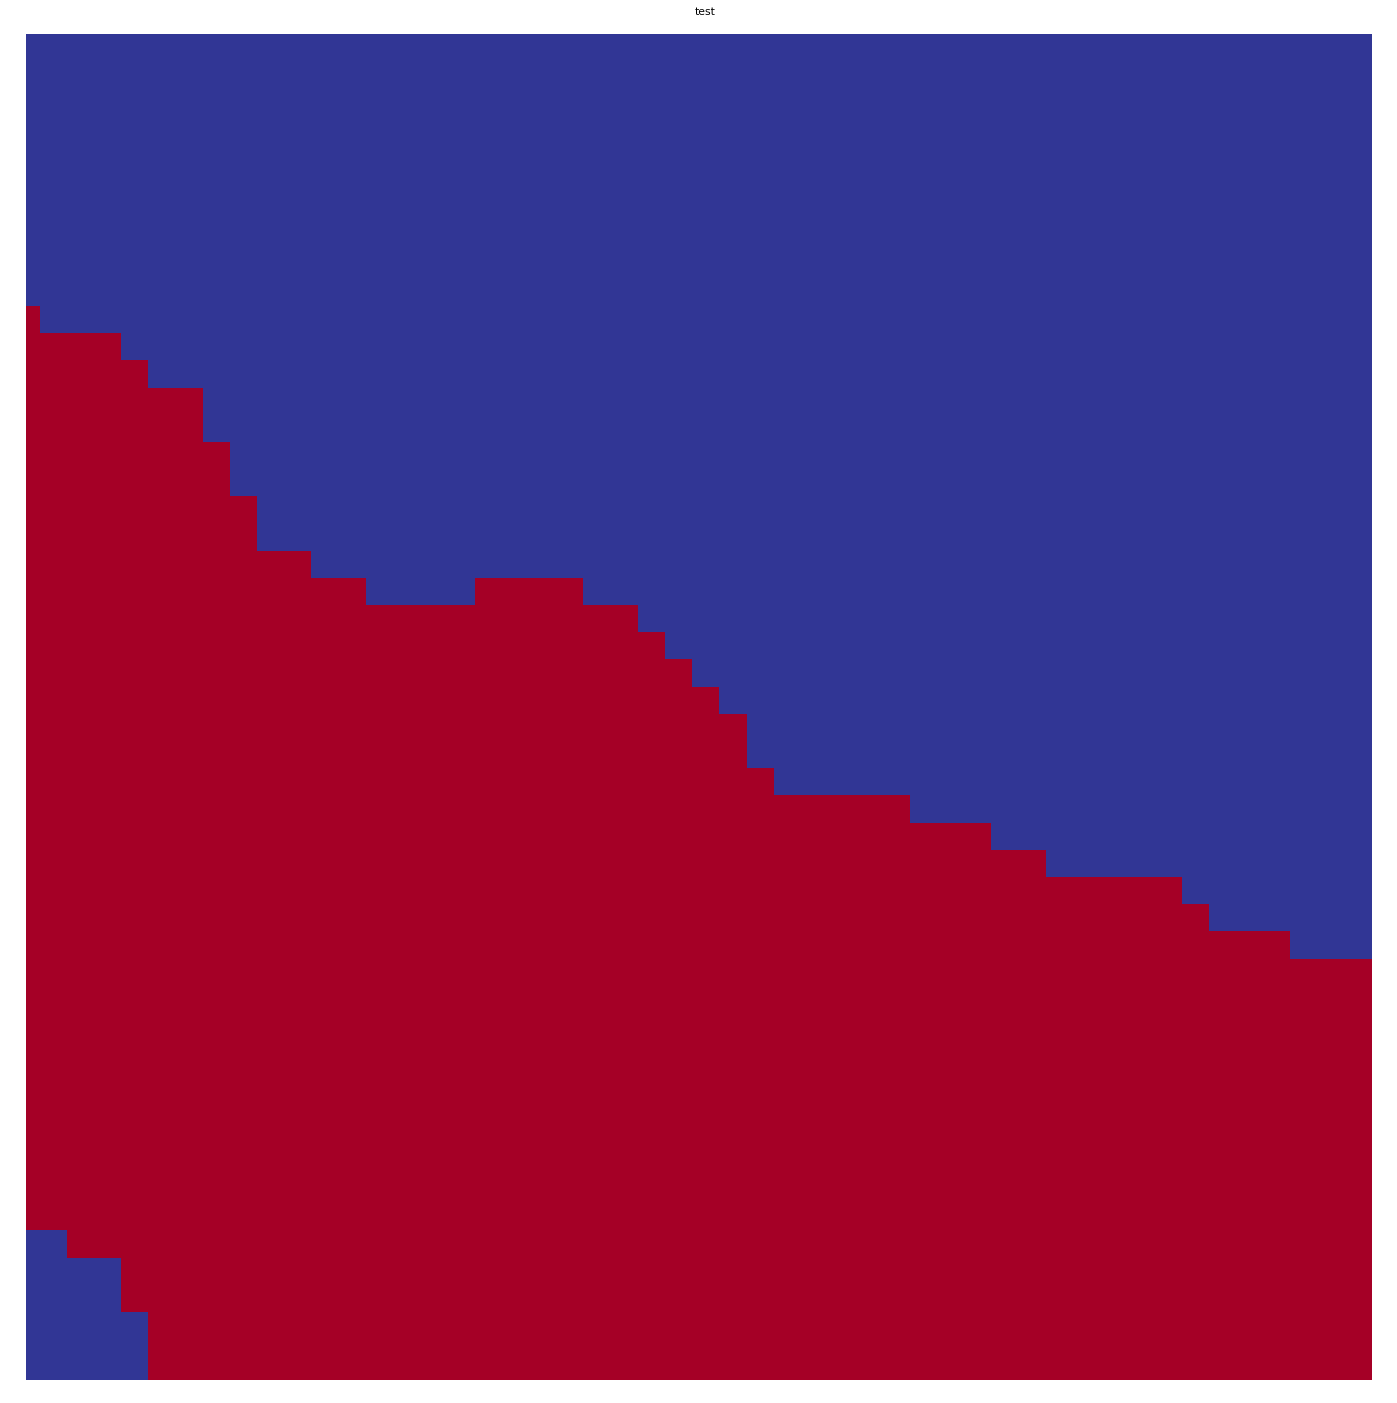

In [44]:
som = sompy.SOMFactory.build(
    group_1_and_3, mapsize, mask=None, mapshape='planar', lattice='hexa', 
    normalization='var', initialization='pca', neighborhood='gaussian', 
    training='batch', name='sompy'
)
som.train(n_job=4, verbose=False, train_finetune_len=100, train_rough_len=50)

vis = sompy.mapview.View2DPacked(5, 5, 'test',text_size=12)  

kmeans_labels = cluster(som, n_clusters=2)

som.cluster_labels = kmeans_labels.labels_
vis.show(som, what='cluster')

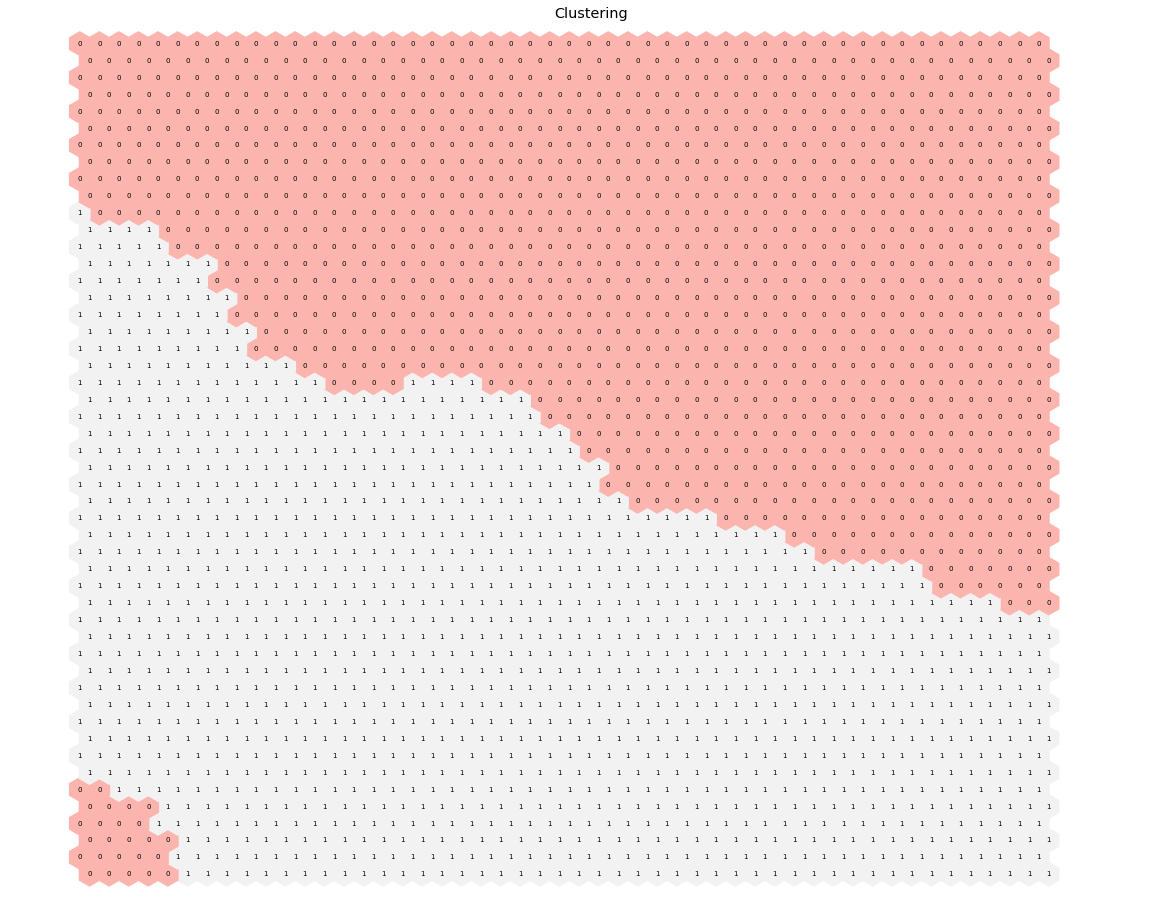

In [45]:
from sompy.visualization.hitmap import HitMapView
hits = HitMapView(20, 20,"Clustering",text_size=10, cmap=plt.cm.jet)
a = hits.show(som, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")
plt.show()

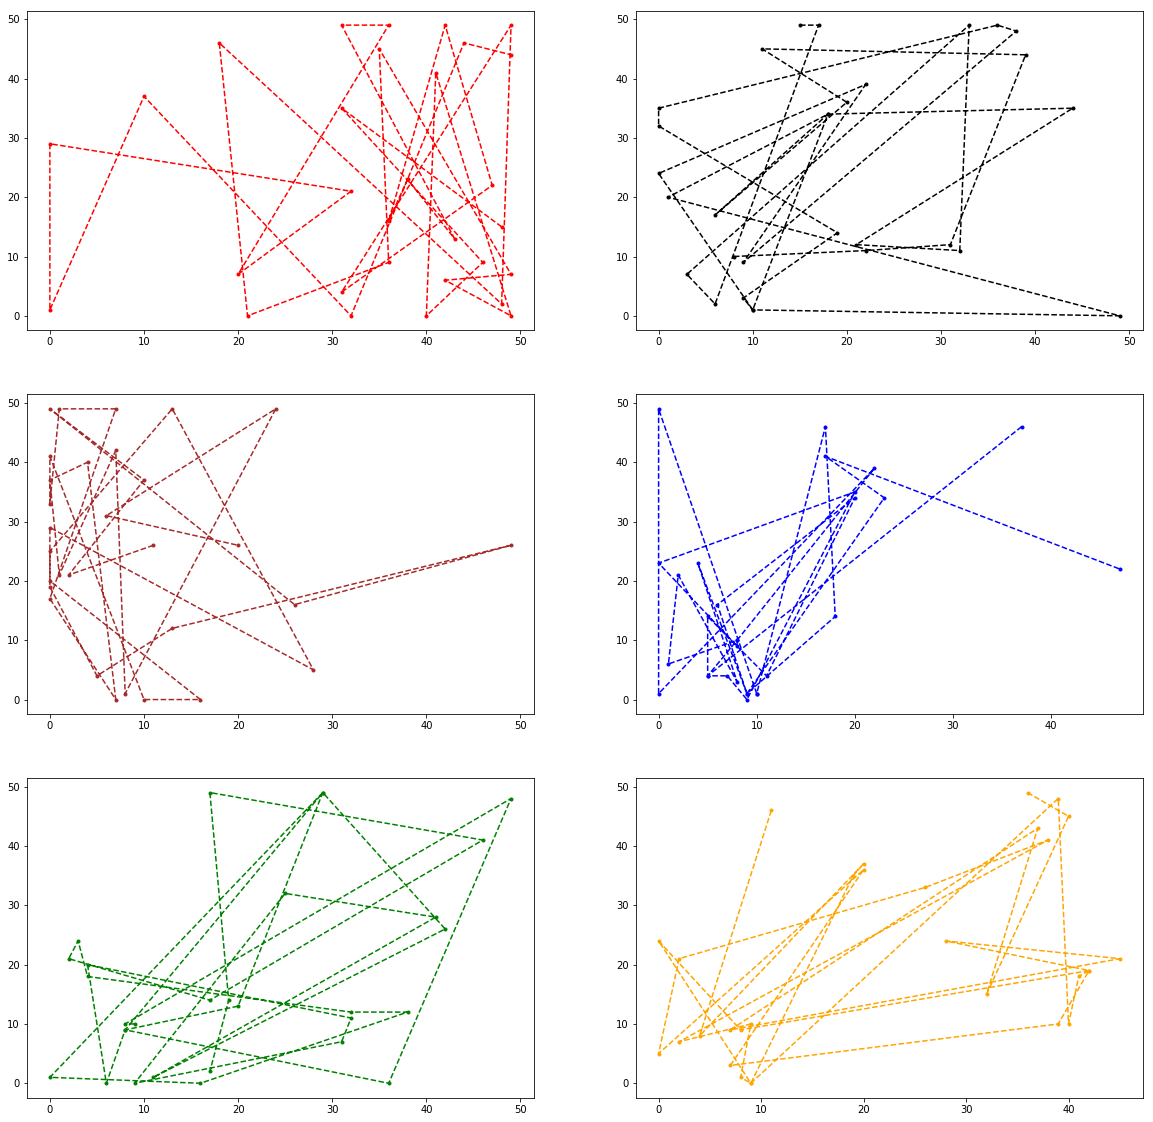

In [46]:
plot_data(som)

### Patterns learned by the neural network which are used to determine de winning neuron of each training instance

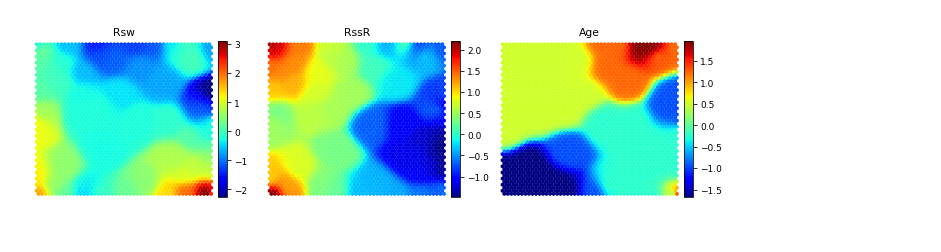

In [47]:
som.component_names = ['Rsw', 'RssR', 'Age']
v = sompy.mapview.View2D(10,10,"", text_size=9)  
v.show(som, which_dim='all', cmap='jet', col_sz=4) #which_dim='all' default

In [48]:
new_complet_data = complet_data.copy()
new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 1].index)
new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 3].index)
new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 4].index)
new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 5].index)

Confusion matrix, without normalization
[[10 20]
 [18 12]]


true_positives total: 22
false_positives total: 38
false_negatives total: 38

Precision:  0.3660714285714286
Recal:  0.36666666666666664
F1-Score:  0.3659621802002225
Accuracy:  0.36666666666666664


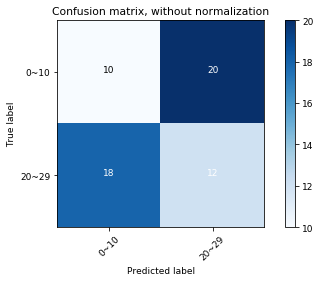

In [49]:
# Replaces age groups number by 0 and 1
new_complet_data.loc[new_complet_data['Age'] == 0, 'Age'] = 1
new_complet_data.loc[new_complet_data['Age'] == 2, 'Age'] = 0
new_complet_data

evaluate_som(group_1_and_3, new_complet_data, classes_name=['0~10', '20~29'])

In [50]:
analyse_cluster_per_group(new_complet_data)

Age  Cluster
0    1          20
     0          10
1    0          18
     1          12
Name: Cluster, dtype: int64

In [51]:
new_complet_data = complet_data.copy()
new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 1].index)
new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 3].index)
new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 4].index)
new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 5].index)

Confusion matrix, without normalization
[[18 12]
 [10 20]]


true_positives total: 38
false_positives total: 22
false_negatives total: 22

Precision:  0.6339285714285714
Recal:  0.6333333333333333
F1-Score:  0.6329254727474972
Accuracy:  0.6333333333333333


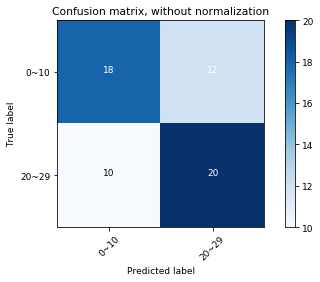

In [52]:
# Replaces age groups number by 0 and 1
new_complet_data.loc[new_complet_data['Age'] == 0, 'Age'] = 0
new_complet_data.loc[new_complet_data['Age'] == 2, 'Age'] = 1
new_complet_data

evaluate_som(group_1_and_3, new_complet_data, classes_name=['0~10', '20~29'])

<hr>

# Experiment 5

- Map Size = [50, 50]
- Iterations = 2000
- Only 2 features as input: RSW and CADENCE
- Only 2 groups to classify
   - Group 1: 40~49
   - Group 2: >50

In [53]:
mapsize = [50,50]

rsw_cadence = complet_data.drop(['Rst', 'RssR', 'RssL', 'Rs', 'ACT[s]', 'Age'], axis=1)
rsw_cadence = rsw_cadence.values

group_0_10 = rsw_cadence[:30]
group_10_19 = rsw_cadence[30:60]
group_20_29 = rsw_cadence[60:90]
group_30_39 = rsw_cadence[90:120]
group_40_49 = rsw_cadence[120:150]
group_over_50 = rsw_cadence[150:]

group_5_and_6 = np.concatenate((group_40_49, group_over_50))

/home/sarai/.virtualenvs/hybrid-approach/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


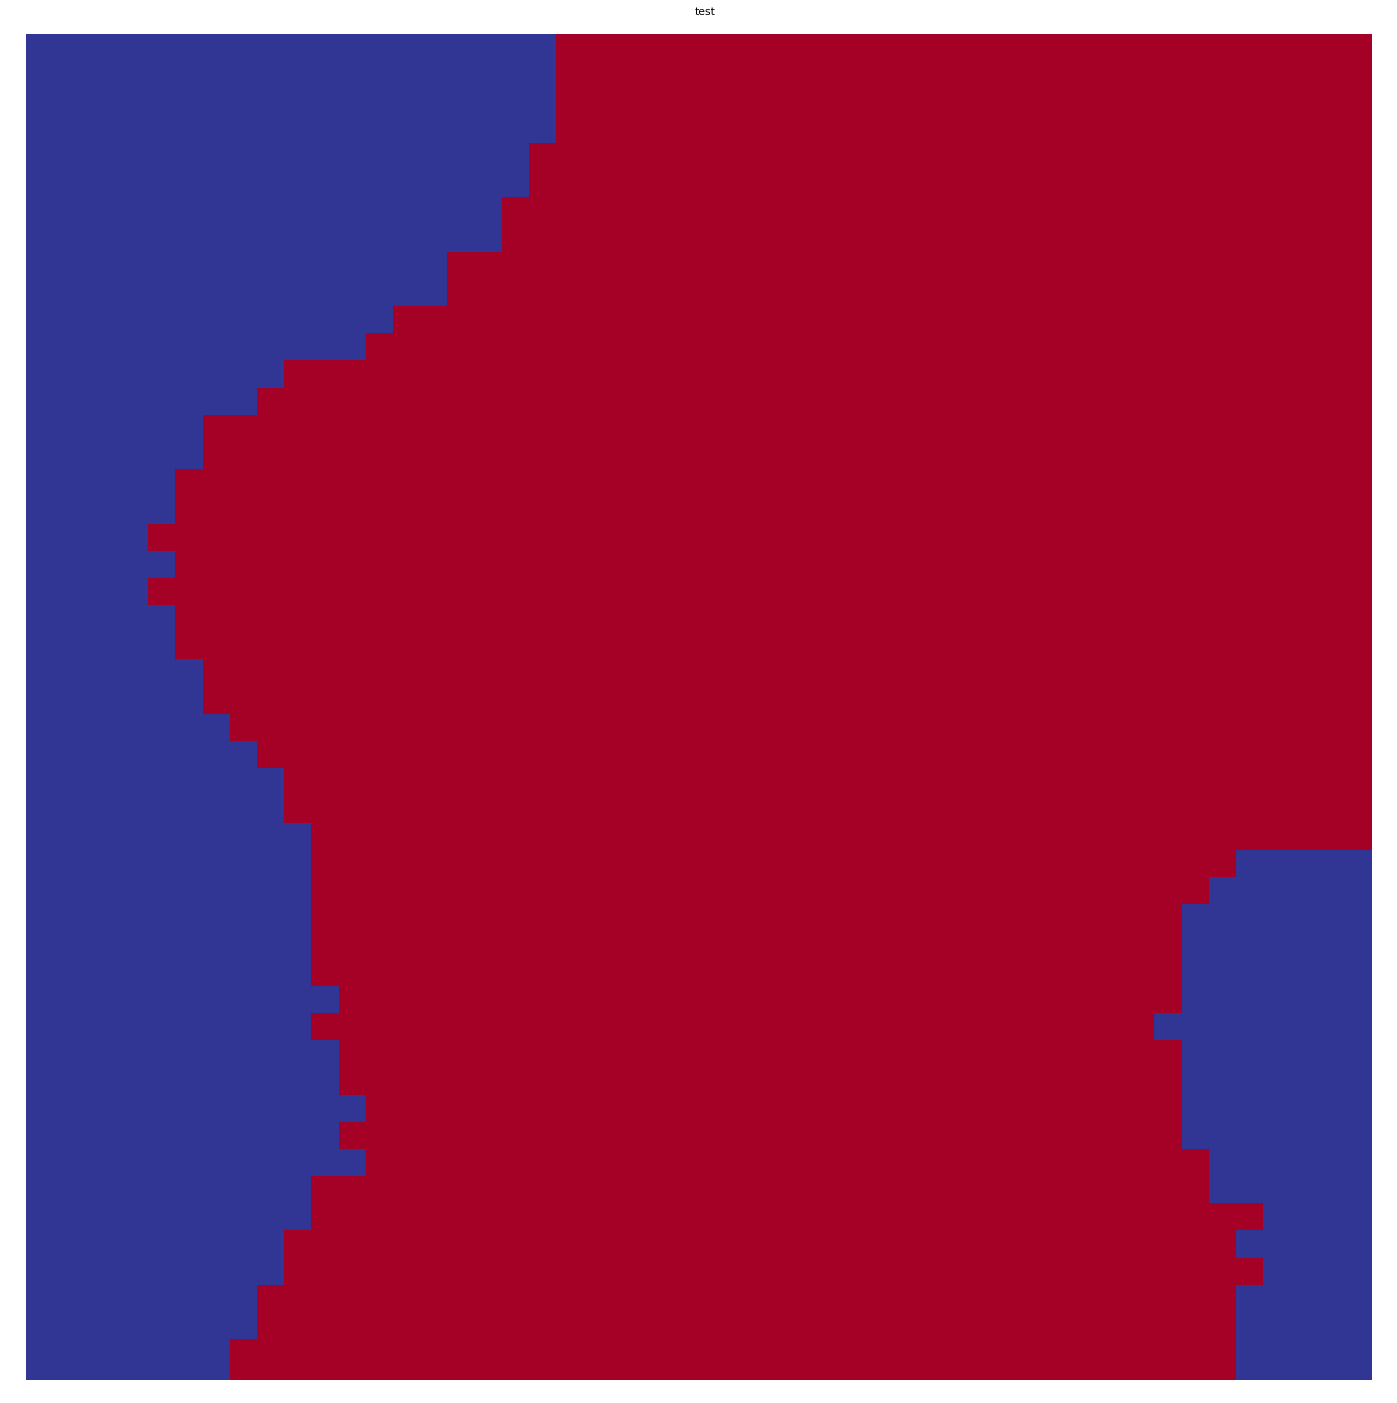

In [54]:
som = sompy.SOMFactory.build(
    group_5_and_6, mapsize, mask=None, mapshape='planar', lattice='hexa', 
    normalization='var', initialization='pca', neighborhood='gaussian', 
    training='batch', name='sompy'
)
som.train(n_job=4, verbose=False, train_finetune_len=100, train_rough_len=2000)

vis = sompy.mapview.View2DPacked(5, 5, 'test',text_size=12)  

kmeans_labels = cluster(som, n_clusters=2)

som.cluster_labels = kmeans_labels.labels_
vis.show(som, what='cluster')

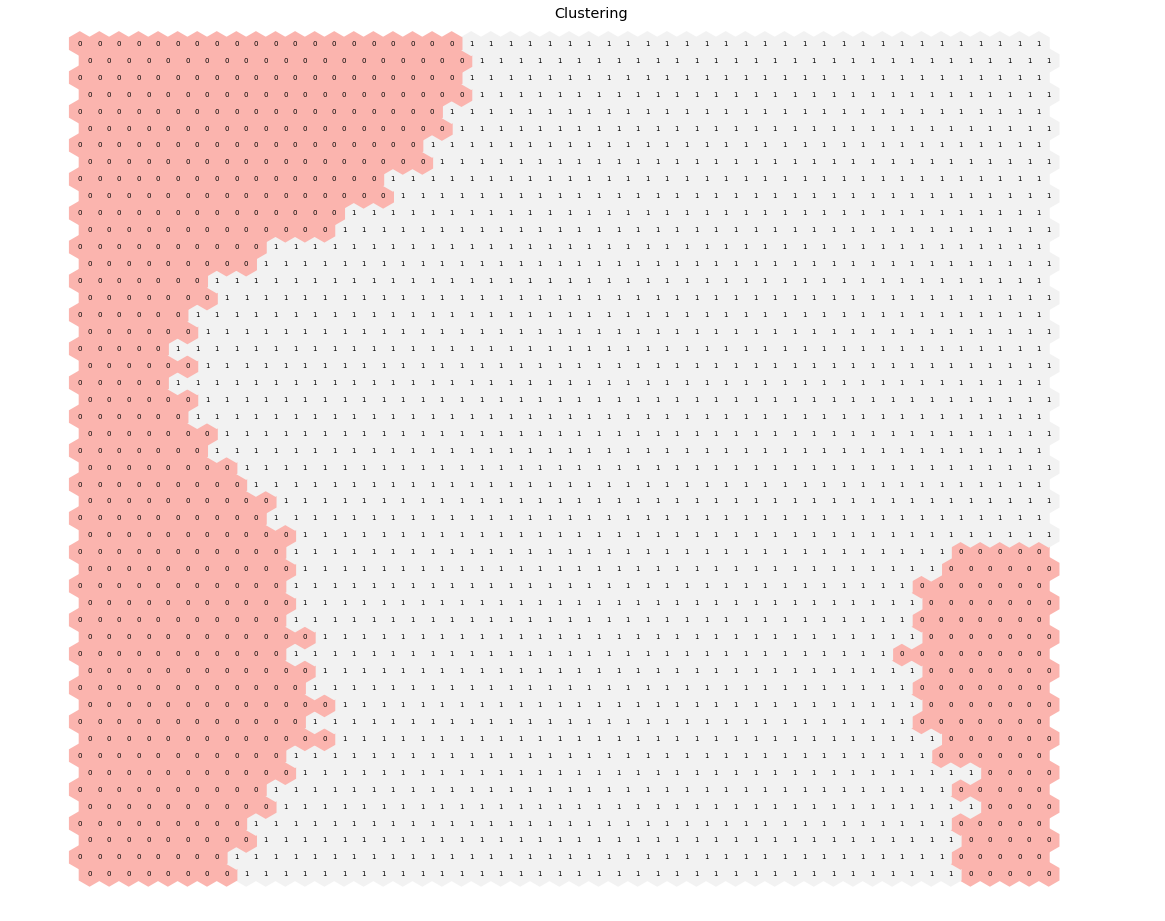

In [55]:
from sompy.visualization.hitmap import HitMapView
hits = HitMapView(20, 20,"Clustering",text_size=10, cmap=plt.cm.jet)
a = hits.show(som, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")
plt.show()

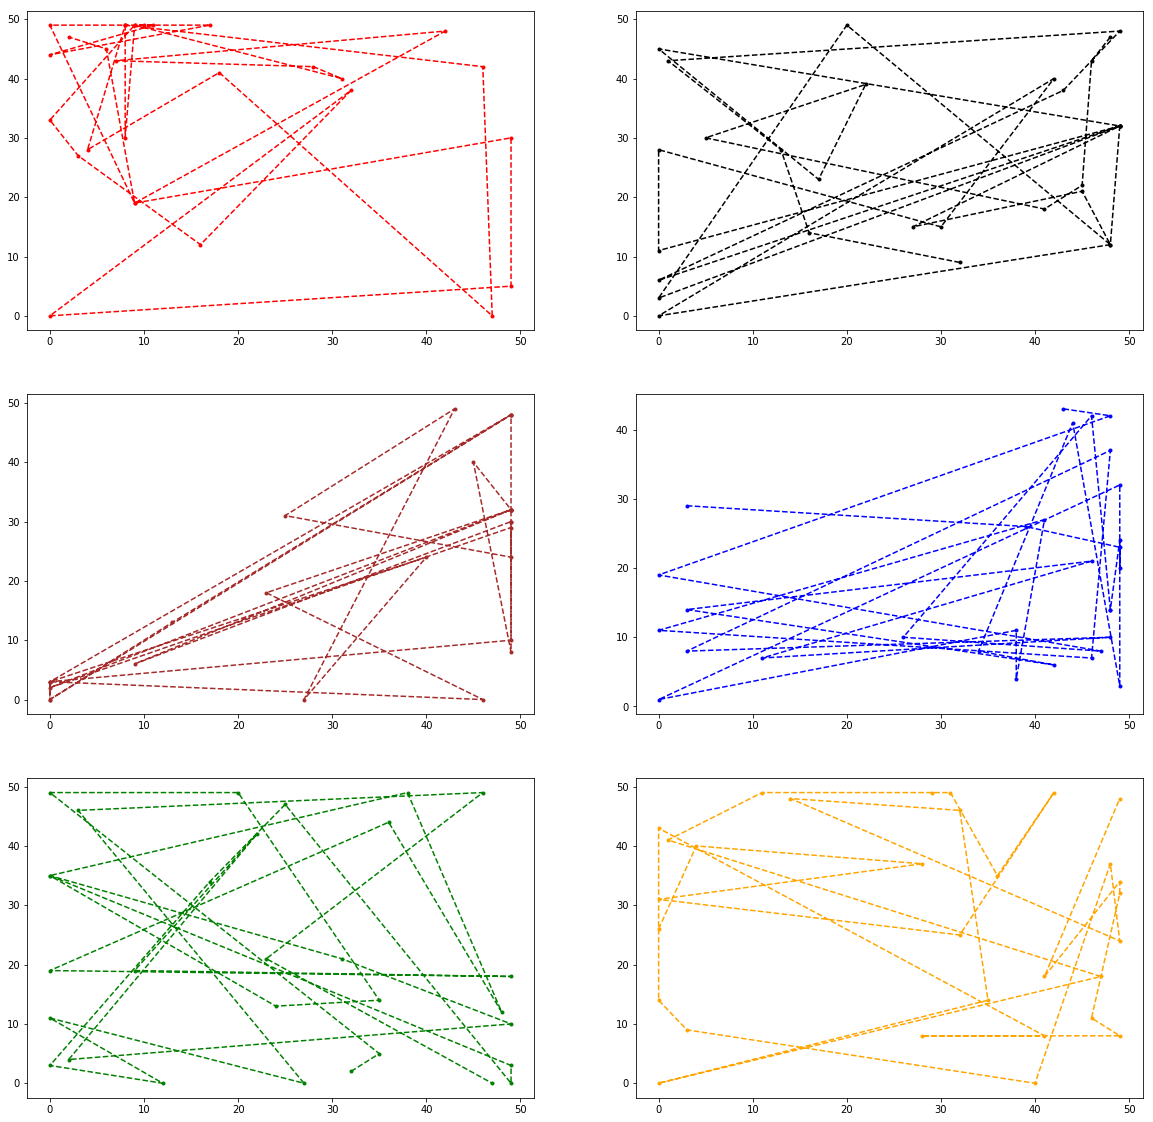

In [56]:
plot_data(som)

### Patterns learned by the neural network which are used to determine de winning neuron of each training instance

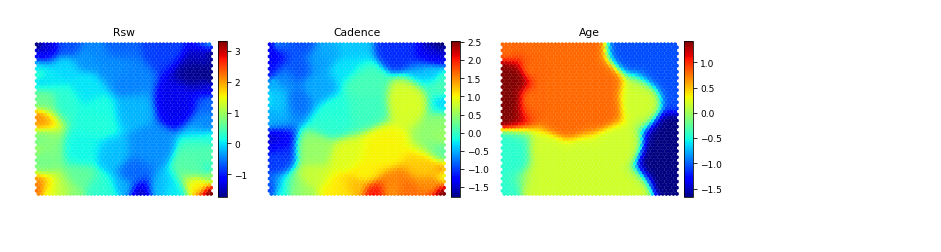

In [57]:
som.component_names = ['Rsw', 'Cadence', 'Age']
v = sompy.mapview.View2D(10,10,"", text_size=9)  
v.show(som, which_dim='all', cmap='jet', col_sz=4) #which_dim='all' default

In [58]:
new_complet_data = complet_data.copy()
new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 1].index)
new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 2].index)
new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 3].index)
new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 0].index)

Confusion matrix, without normalization
[[10 20]
 [12 18]]


true_positives total: 28
false_positives total: 32
false_negatives total: 32

Precision:  0.46411483253588515
Recal:  0.4666666666666667
F1-Score:  0.45701357466063347
Accuracy:  0.4666666666666667


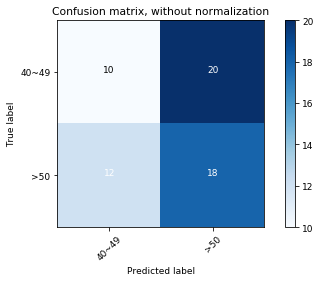

In [59]:
# Replaces age groups number by 0 and 1
new_complet_data.loc[new_complet_data['Age'] == 5, 'Age'] = 1
new_complet_data.loc[new_complet_data['Age'] == 4, 'Age'] = 0
new_complet_data

evaluate_som(group_5_and_6, new_complet_data, classes_name=['40~49', '>50'])

In [60]:
analyse_cluster_per_group(new_complet_data)

Age  Cluster
0    1          20
     0          10
1    1          18
     0          12
Name: Cluster, dtype: int64

In [61]:
new_complet_data = complet_data.copy()
new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 1].index)
new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 2].index)
new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 3].index)
new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 0].index)

Confusion matrix, without normalization
[[12 18]
 [10 20]]


true_positives total: 32
false_positives total: 28
false_negatives total: 28

Precision:  0.5358851674641147
Recal:  0.5333333333333333
F1-Score:  0.5248868778280543
Accuracy:  0.5333333333333333


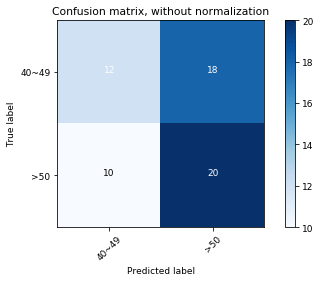

In [62]:
# Replaces age groups number by 0 and 1
new_complet_data.loc[new_complet_data['Age'] == 5, 'Age'] = 0
new_complet_data.loc[new_complet_data['Age'] == 4, 'Age'] = 1
new_complet_data

evaluate_som(group_5_and_6, new_complet_data, classes_name=['40~49', '>50'])

<hr>

# Experiment 6

- Map Size = [50, 50]
- Iterations = 2000
- Only 2 features as input: RSW and RST
- Only 2 groups to classify
   - Group 1: 40~49
   - Group 2: >50

In [63]:
mapsize = [50,50]

rsw_rst = complet_data.drop(['Cadence', 'RssR', 'RssL', 'Rs', 'ACT[s]', 'Age'], axis=1)
rsw_rst = rsw_rst.values

group_0_10 = rsw_rst[:30]
group_10_19 = rsw_rst[30:60]
group_20_29 = rsw_rst[60:90]
group_30_39 = rsw_rst[90:120]
group_40_49 = rsw_rst[120:150]
group_over_50 = rsw_rst[150:]

group_5_and_6 = np.concatenate((group_40_49, group_over_50))

/home/sarai/.virtualenvs/hybrid-approach/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


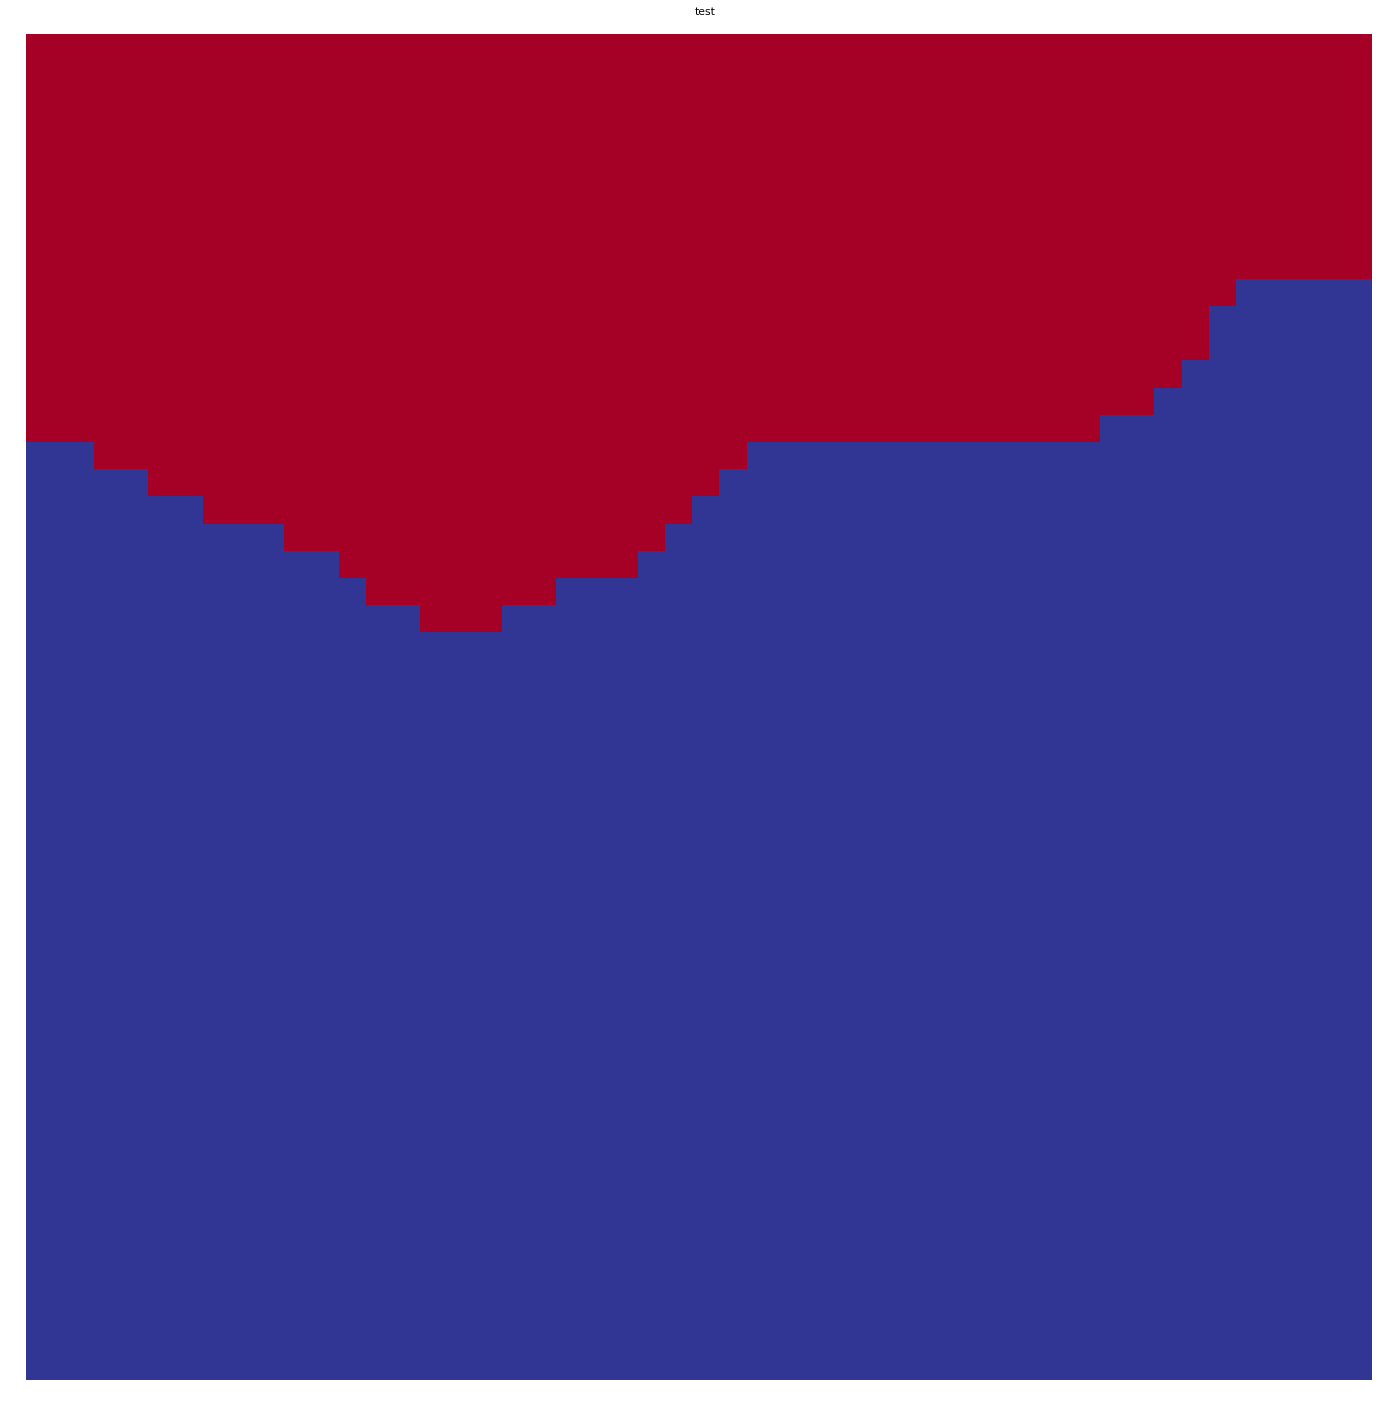

In [64]:
som = sompy.SOMFactory.build(
    group_5_and_6, mapsize, mask=None, mapshape='planar', lattice='hexa', 
    normalization='var', initialization='pca', neighborhood='gaussian', 
    training='batch', name='sompy'
)
som.train(n_job=4, verbose=False, train_finetune_len=100, train_rough_len=2000)

vis = sompy.mapview.View2DPacked(5, 5, 'test',text_size=12)  

kmeans_labels = cluster(som, n_clusters=2)

som.cluster_labels = kmeans_labels.labels_
vis.show(som, what='cluster')

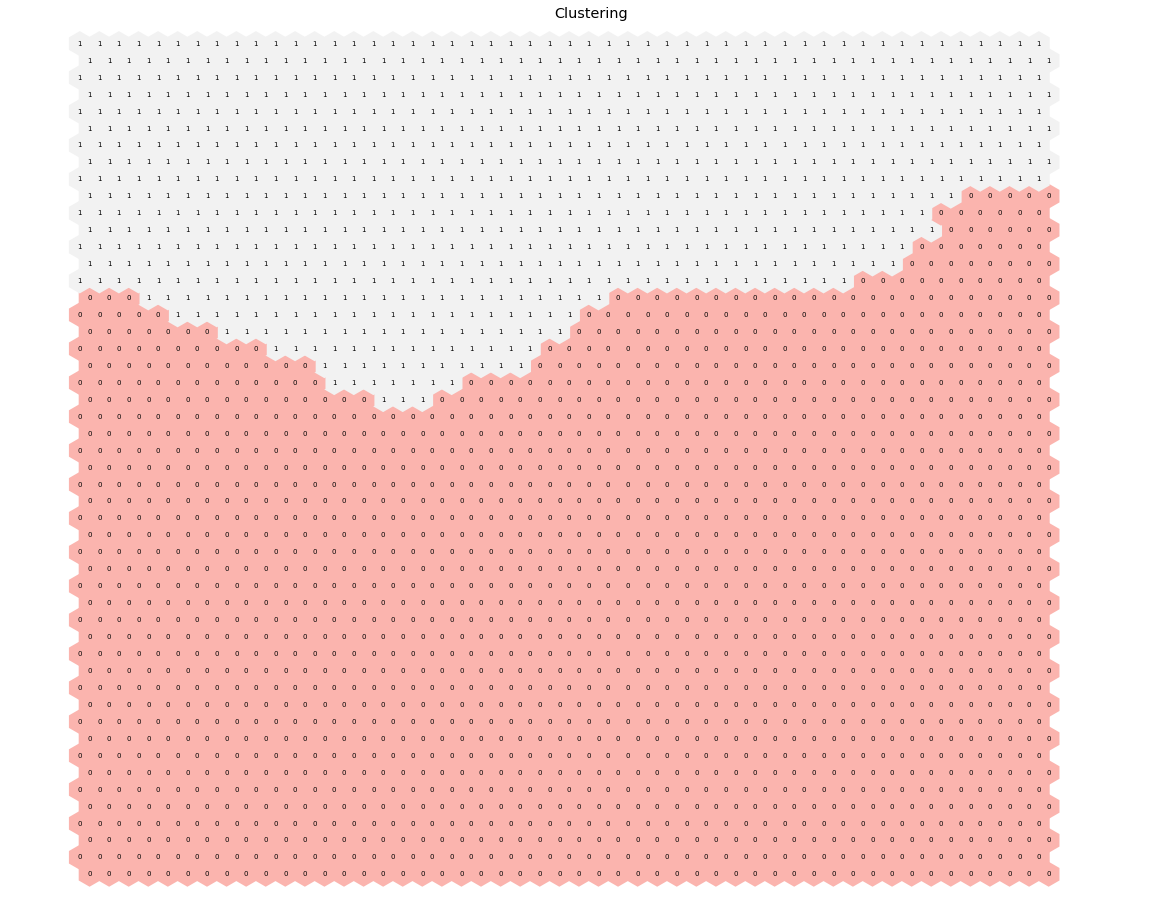

In [65]:
from sompy.visualization.hitmap import HitMapView
hits = HitMapView(20, 20,"Clustering",text_size=10, cmap=plt.cm.jet)
a = hits.show(som, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")
plt.show()

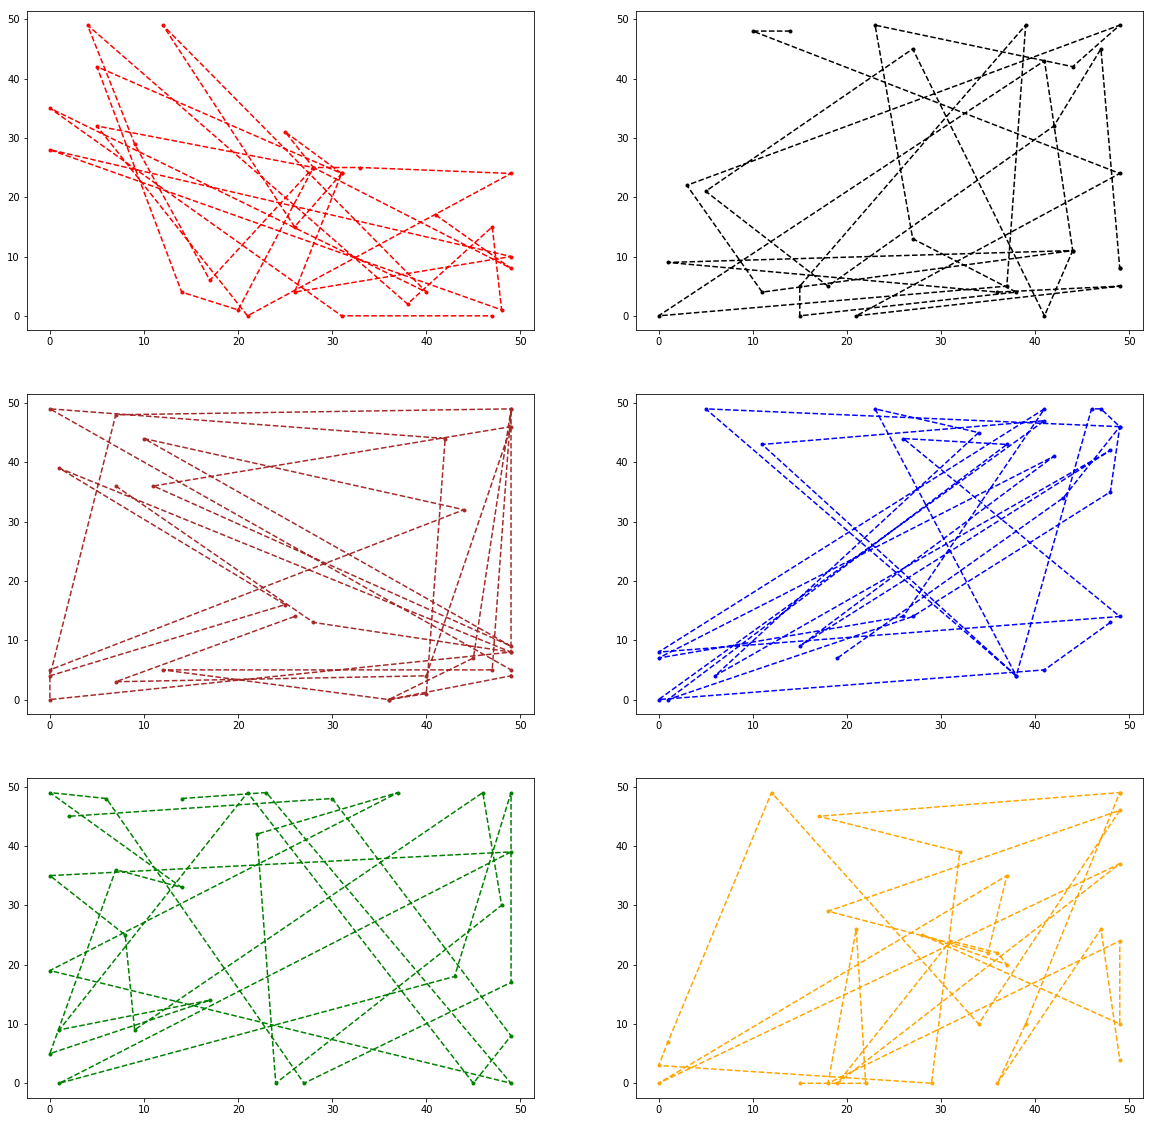

In [66]:
plot_data(som)

### Patterns learned by the neural network which are used to determine de winning neuron of each training instance

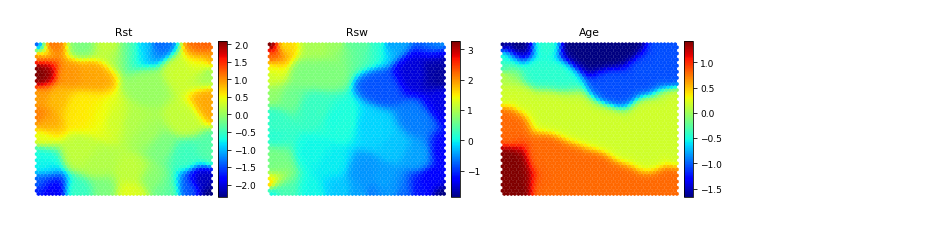

In [67]:
som.component_names = ['Rst', 'Rsw', 'Age']
v = sompy.mapview.View2D(10,10,"", text_size=9)  
v.show(som, which_dim='all', cmap='jet', col_sz=4) #which_dim='all' default

In [68]:
new_complet_data = complet_data.copy()
new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 1].index)
new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 2].index)
new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 3].index)
new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 0].index)

Confusion matrix, without normalization
[[20 10]
 [18 12]]


true_positives total: 32
false_positives total: 28
false_negatives total: 28

Precision:  0.5358851674641147
Recal:  0.5333333333333333
F1-Score:  0.5248868778280543
Accuracy:  0.5333333333333333


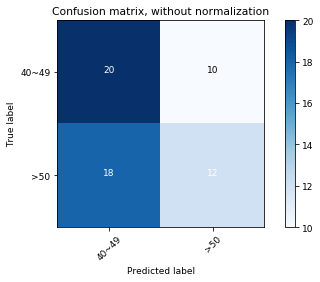

In [69]:
# Replaces age groups number by 0 and 1
new_complet_data.loc[new_complet_data['Age'] == 5, 'Age'] = 1
new_complet_data.loc[new_complet_data['Age'] == 4, 'Age'] = 0
new_complet_data

evaluate_som(group_5_and_6, new_complet_data, classes_name=['40~49', '>50'])

In [70]:
analyse_cluster_per_group(new_complet_data)

Age  Cluster
0    0          20
     1          10
1    0          18
     1          12
Name: Cluster, dtype: int64

In [71]:
new_complet_data = complet_data.copy()
new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 1].index)
new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 2].index)
new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 3].index)
new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 0].index)

Confusion matrix, without normalization
[[18 12  0]
 [ 0  0  0]
 [20 10  0]]


true_positives total: 18
false_positives total: 42
false_negatives total: 12

Precision:  0.15789473684210525
Recal:  0.3
F1-Score:  0.2647058823529412
Accuracy:  0.3


/home/sarai/.virtualenvs/hybrid-approach/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sarai/.virtualenvs/hybrid-approach/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sarai/.virtualenvs/hybrid-approach/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


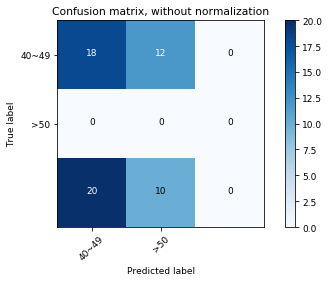

In [72]:
# Replaces age groups number by 0 and 1
new_complet_data.loc[new_complet_data['Age'] == 5, 'Age'] = 0
new_complet_data.loc[new_complet_data['Age'] ==46, 'Age'] = 1
new_complet_data

evaluate_som(group_5_and_6, new_complet_data, classes_name=['40~49', '>50'])

<hr>

# Experiment 7

- Map Size = [50, 50]
- Iterations = 2000
- Only 2 features as input: RSW and RST
- Only 2 groups to classify
   - Group 1: 0~10
   - Group 2: 20~29

In [73]:
mapsize = [50,50]

rsw_rst = complet_data.drop(['Cadence', 'RssR', 'RssL', 'Rs', 'ACT[s]', 'Age'], axis=1)
rsw_rst = rsw_rst.values

group_0_10 = rsw_rst[:30]
group_10_19 = rsw_rst[30:60]
group_20_29 = rsw_rst[60:90]
group_30_39 = rsw_rst[90:120]
group_40_49 = rsw_rst[120:150]
group_over_50 = rsw_rst[150:]

group_1_and_3 = np.concatenate((group_0_10, group_20_29))

/home/sarai/.virtualenvs/hybrid-approach/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


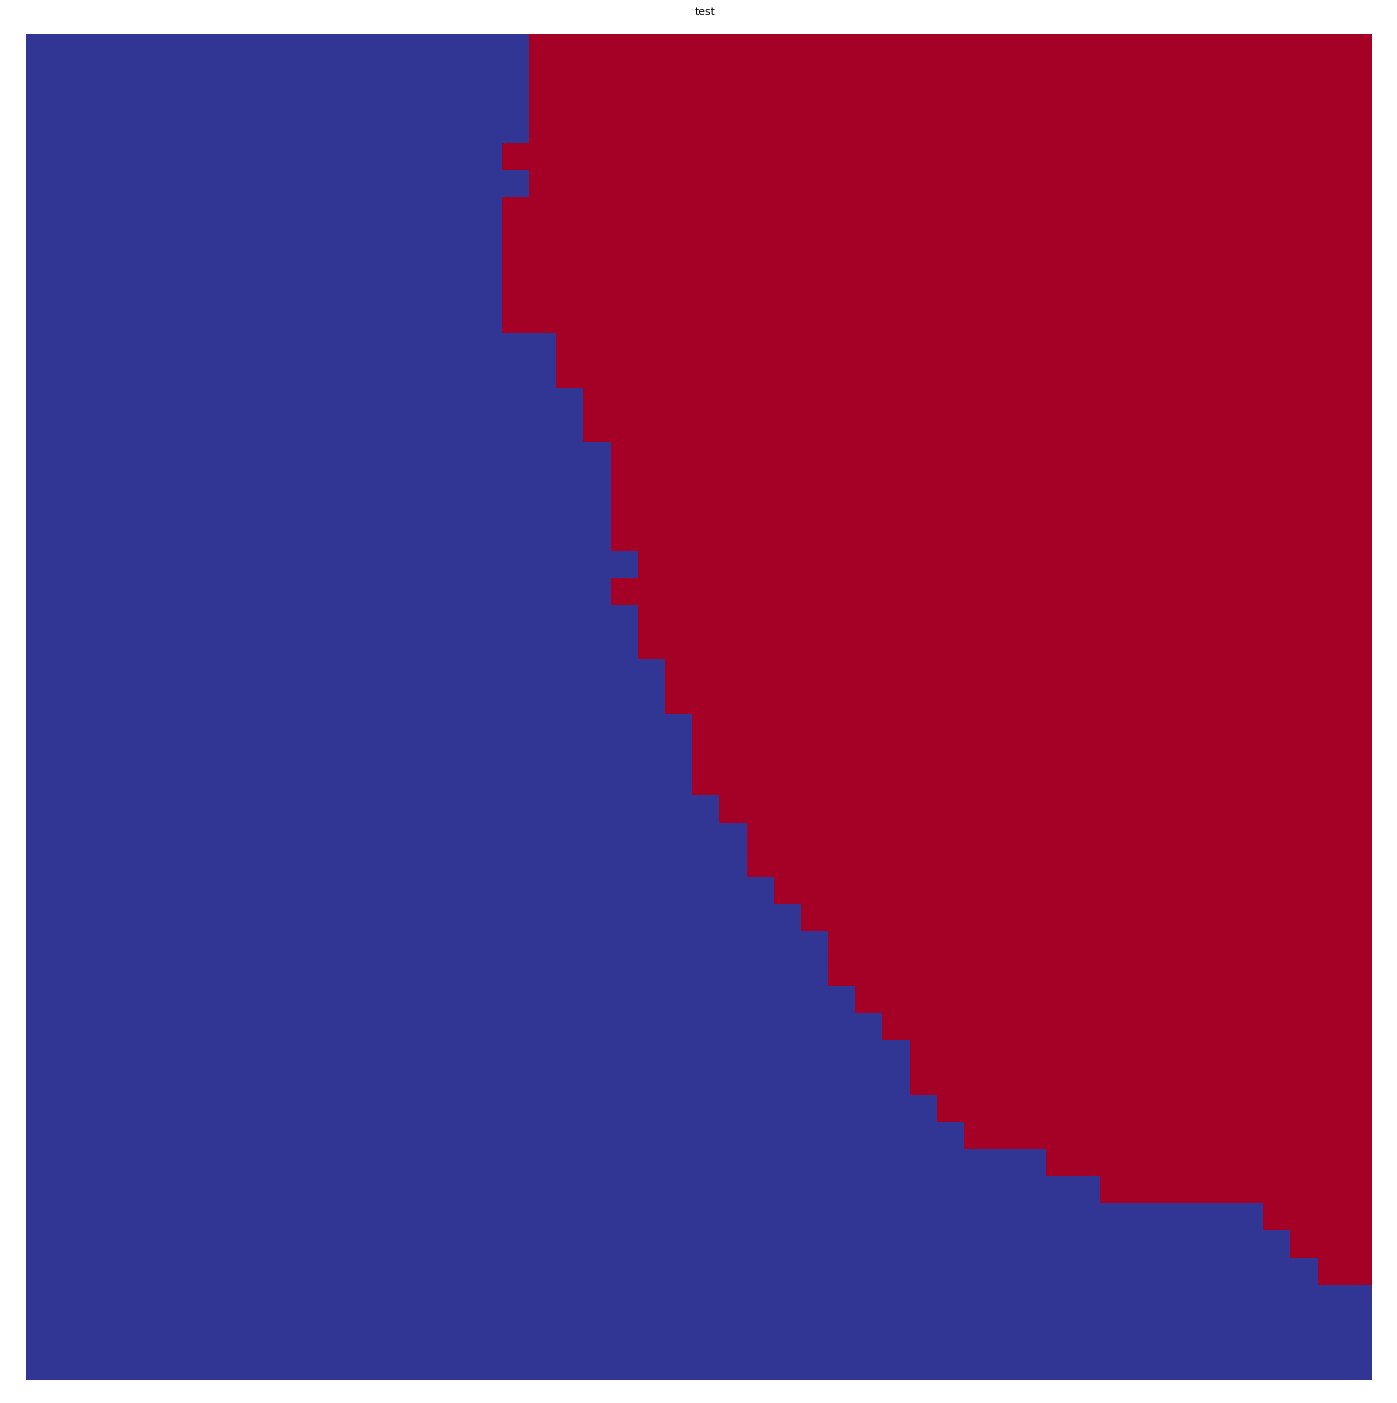

In [74]:
som = sompy.SOMFactory.build(
    group_1_and_3, mapsize, mask=None, mapshape='planar', lattice='hexa', 
    normalization='var', initialization='pca', neighborhood='gaussian', 
    training='batch', name='sompy'
)
som.train(n_job=4, verbose=False, train_finetune_len=100, train_rough_len=2000)

vis = sompy.mapview.View2DPacked(5, 5, 'test',text_size=12)  

kmeans_labels = cluster(som, n_clusters=2)

som.cluster_labels = kmeans_labels.labels_
vis.show(som, what='cluster')

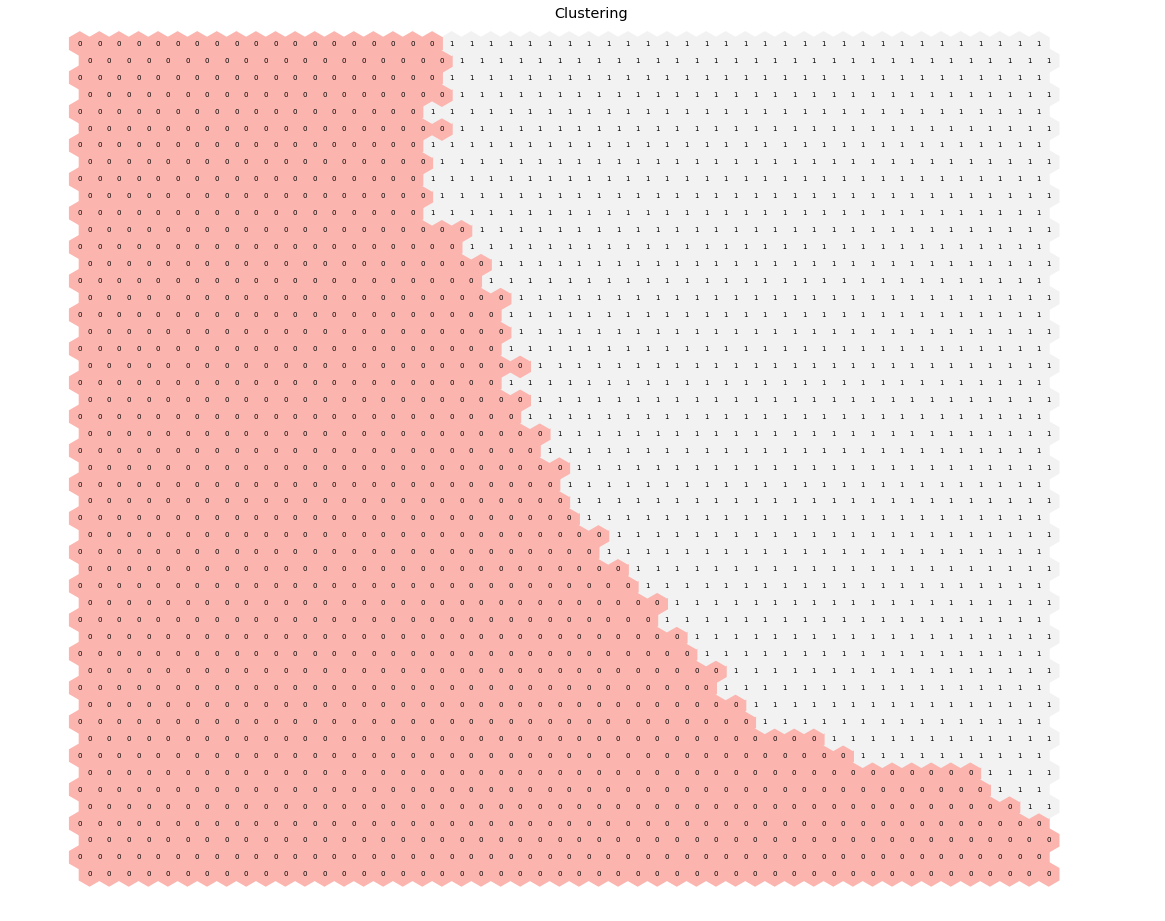

In [75]:
from sompy.visualization.hitmap import HitMapView
hits = HitMapView(20, 20,"Clustering",text_size=10, cmap=plt.cm.jet)
a = hits.show(som, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")
plt.show()

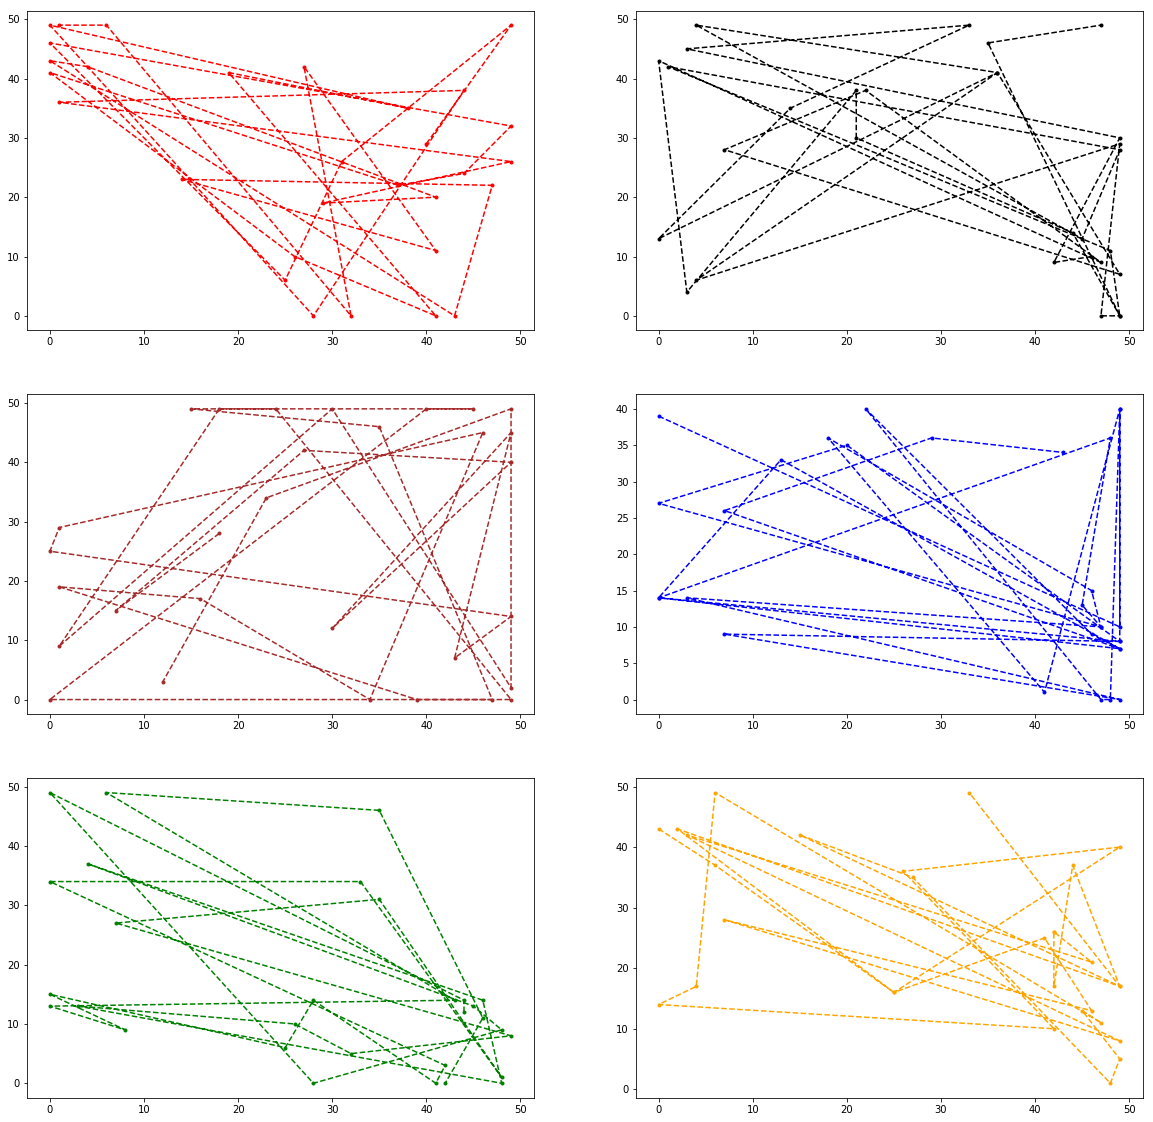

In [76]:
plot_data(som)

### Patterns learned by the neural network which are used to determine de winning neuron of each training instance

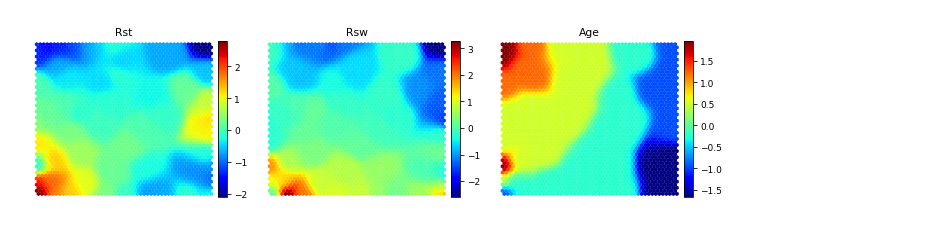

In [77]:
som.component_names = ['Rst', 'Rsw', 'Age']
v = sompy.mapview.View2D(10,10,"", text_size=9)  
v.show(som, which_dim='all', cmap='jet', col_sz=4) #which_dim='all' default

In [78]:
new_complet_data = complet_data.copy()
new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 1].index)
new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 3].index)
new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 4].index)
new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 5].index)

Confusion matrix, without normalization
[[20 10]
 [12 18]]


true_positives total: 38
false_positives total: 22
false_negatives total: 22

Precision:  0.6339285714285714
Recal:  0.6333333333333333
F1-Score:  0.6329254727474972
Accuracy:  0.6333333333333333


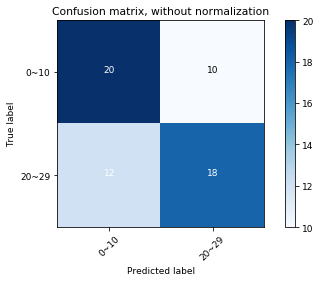

In [79]:
# Replaces age groups number by 0 and 1
new_complet_data.loc[new_complet_data['Age'] == 0, 'Age'] = 1
new_complet_data.loc[new_complet_data['Age'] == 2, 'Age'] = 0
new_complet_data

evaluate_som(group_1_and_3, new_complet_data, classes_name=['0~10', '20~29'])

In [80]:
analyse_cluster_per_group(new_complet_data)

Age  Cluster
0    0          20
     1          10
1    1          18
     0          12
Name: Cluster, dtype: int64

In [81]:
new_complet_data = complet_data.copy()
new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 1].index)
new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 3].index)
new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 4].index)
new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 5].index)

Confusion matrix, without normalization
[[12 18]
 [20 10]]


true_positives total: 22
false_positives total: 38
false_negatives total: 38

Precision:  0.3660714285714286
Recal:  0.36666666666666664
F1-Score:  0.3659621802002225
Accuracy:  0.36666666666666664


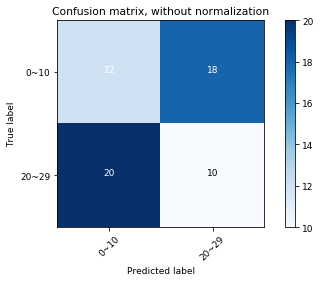

In [82]:
# Replaces age groups number by 0 and 1
new_complet_data.loc[new_complet_data['Age'] == 0, 'Age'] = 0
new_complet_data.loc[new_complet_data['Age'] == 2, 'Age'] = 1
new_complet_data

evaluate_som(group_1_and_3, new_complet_data, classes_name=['0~10', '20~29'])

<hr>

# Experiment 8

- Map Size = [50, 50]
- Iterations = 2000
- Only 2 features as input: RST and Cadence
- Only 2 groups to classify
   - Group 1: 40~49
   - Group 2: >50

In [83]:
mapsize = [50,50]

rst_cadence = complet_data.drop(['Rsw', 'RssR', 'RssL', 'Rs', 'ACT[s]', 'Age'], axis=1)
rst_cadence = rst_cadence.values

group_0_10 = rst_cadence[:30]
group_10_19 = rst_cadence[30:60]
group_20_29 = rst_cadence[60:90]
group_30_39 = rst_cadence[90:120]
group_40_49 = rst_cadence[120:150]
group_over_50 = rst_cadence[150:]

group_5_and_6 = np.concatenate((group_40_49, group_over_50))

/home/sarai/.virtualenvs/hybrid-approach/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


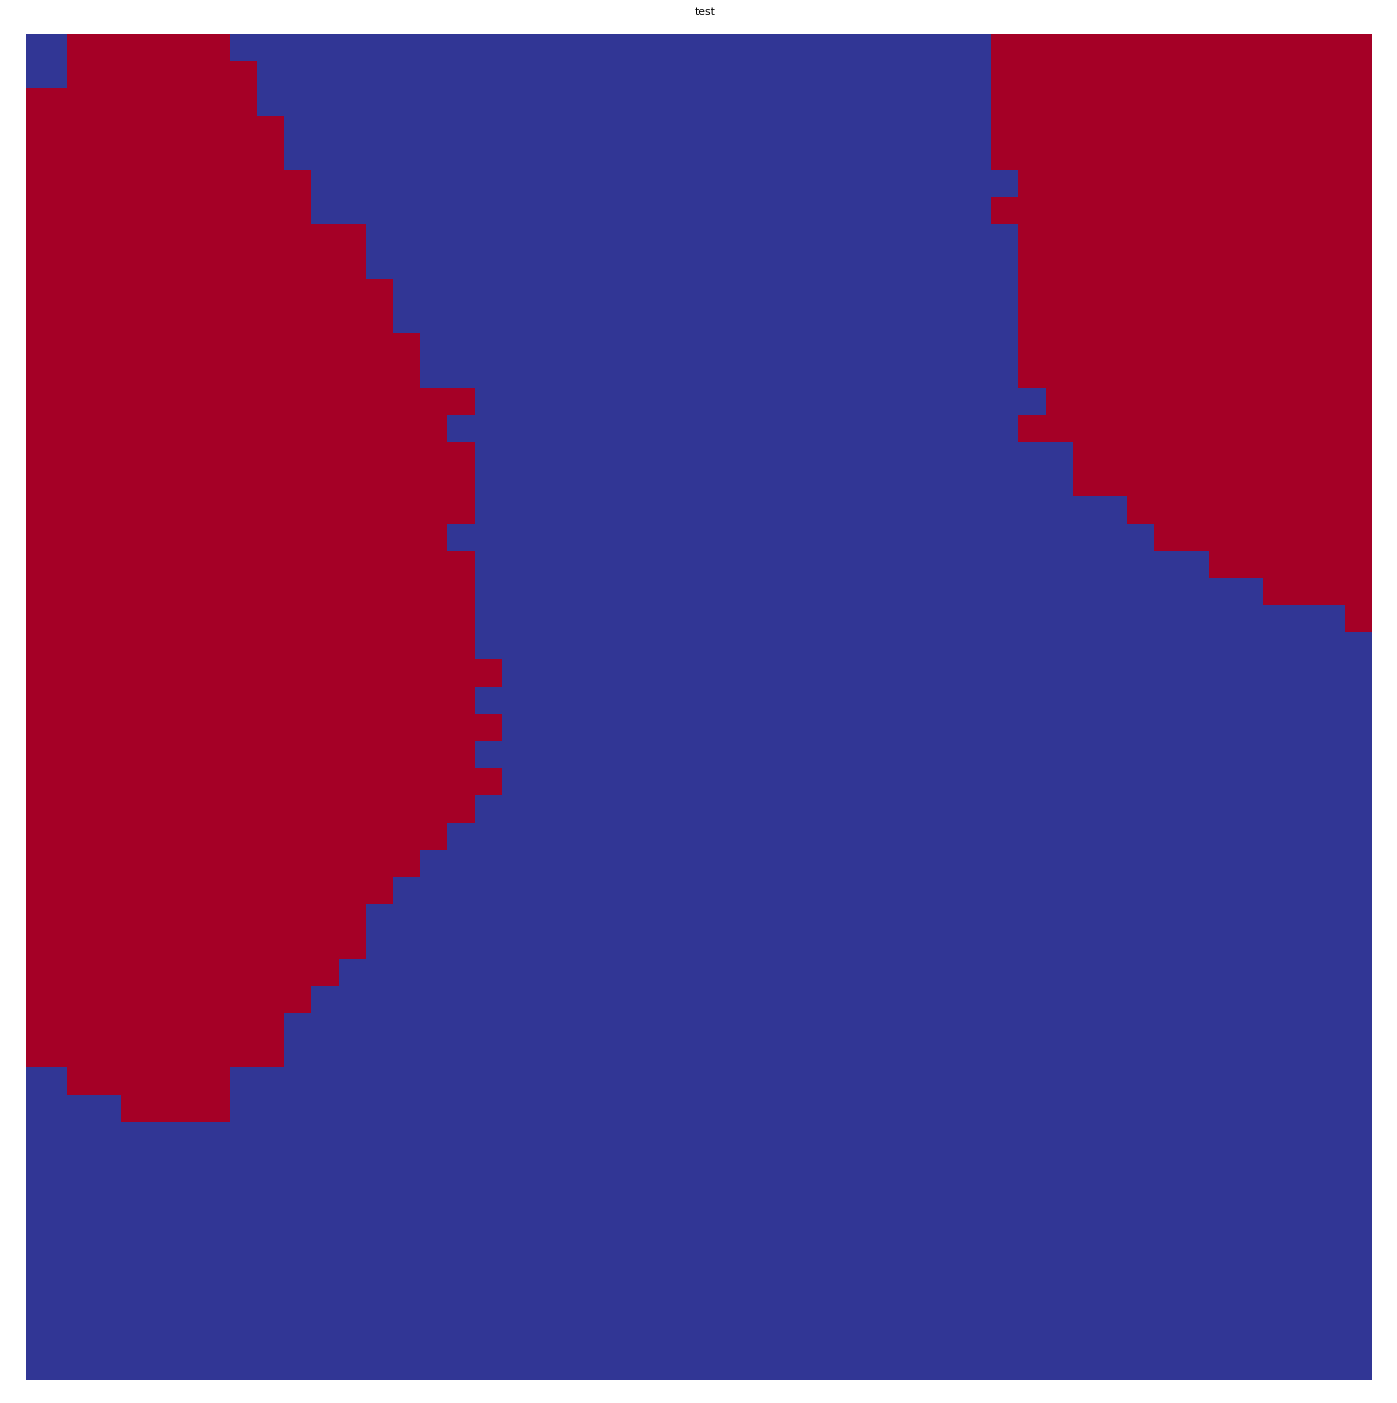

In [84]:
som = sompy.SOMFactory.build(
    group_5_and_6, mapsize, mask=None, mapshape='planar', lattice='hexa', 
    normalization='var', initialization='pca', neighborhood='gaussian', 
    training='batch', name='sompy'
)
som.train(n_job=4, verbose=False, train_finetune_len=100, train_rough_len=2000)

vis = sompy.mapview.View2DPacked(5, 5, 'test',text_size=12)  

kmeans_labels = cluster(som, n_clusters=2)

som.cluster_labels = kmeans_labels.labels_
vis.show(som, what='cluster')

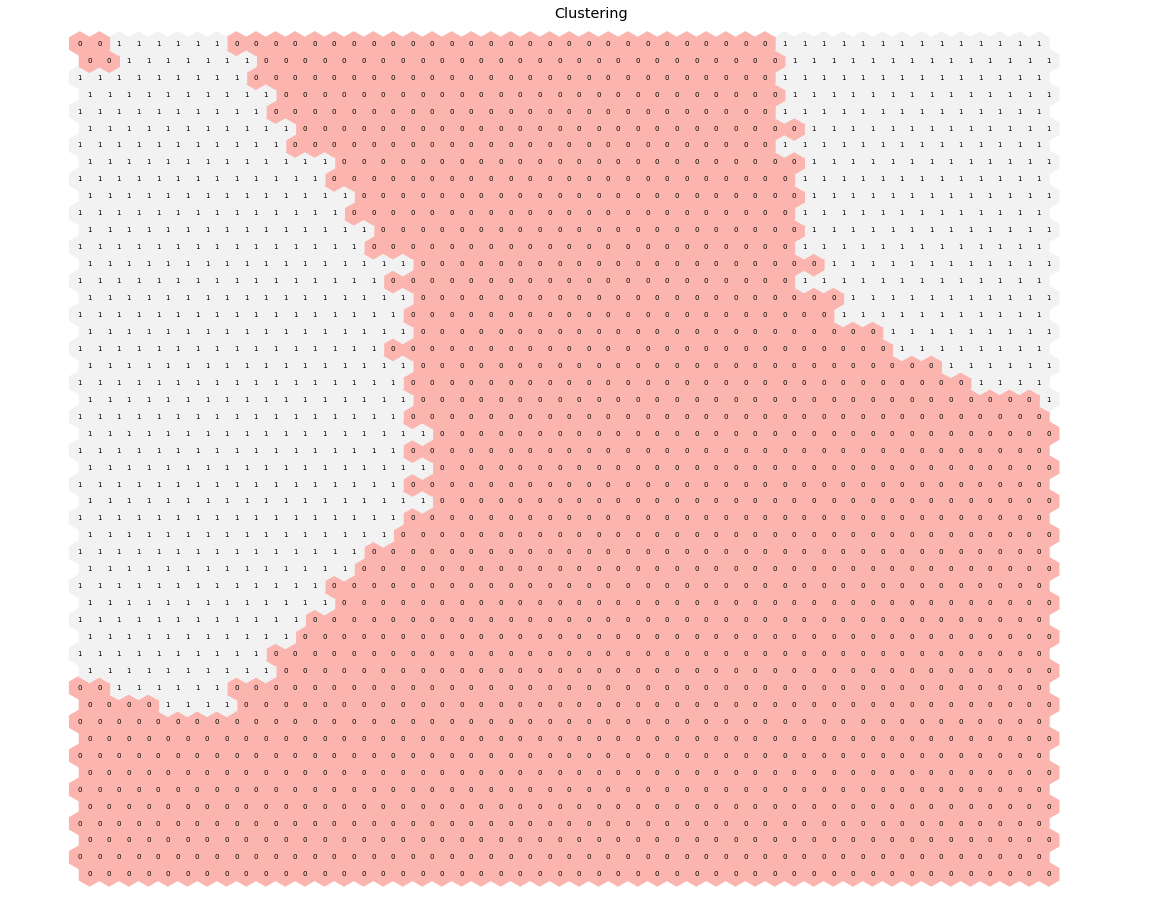

In [85]:
from sompy.visualization.hitmap import HitMapView
hits = HitMapView(20, 20,"Clustering",text_size=10, cmap=plt.cm.jet)
a = hits.show(som, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")
plt.show()

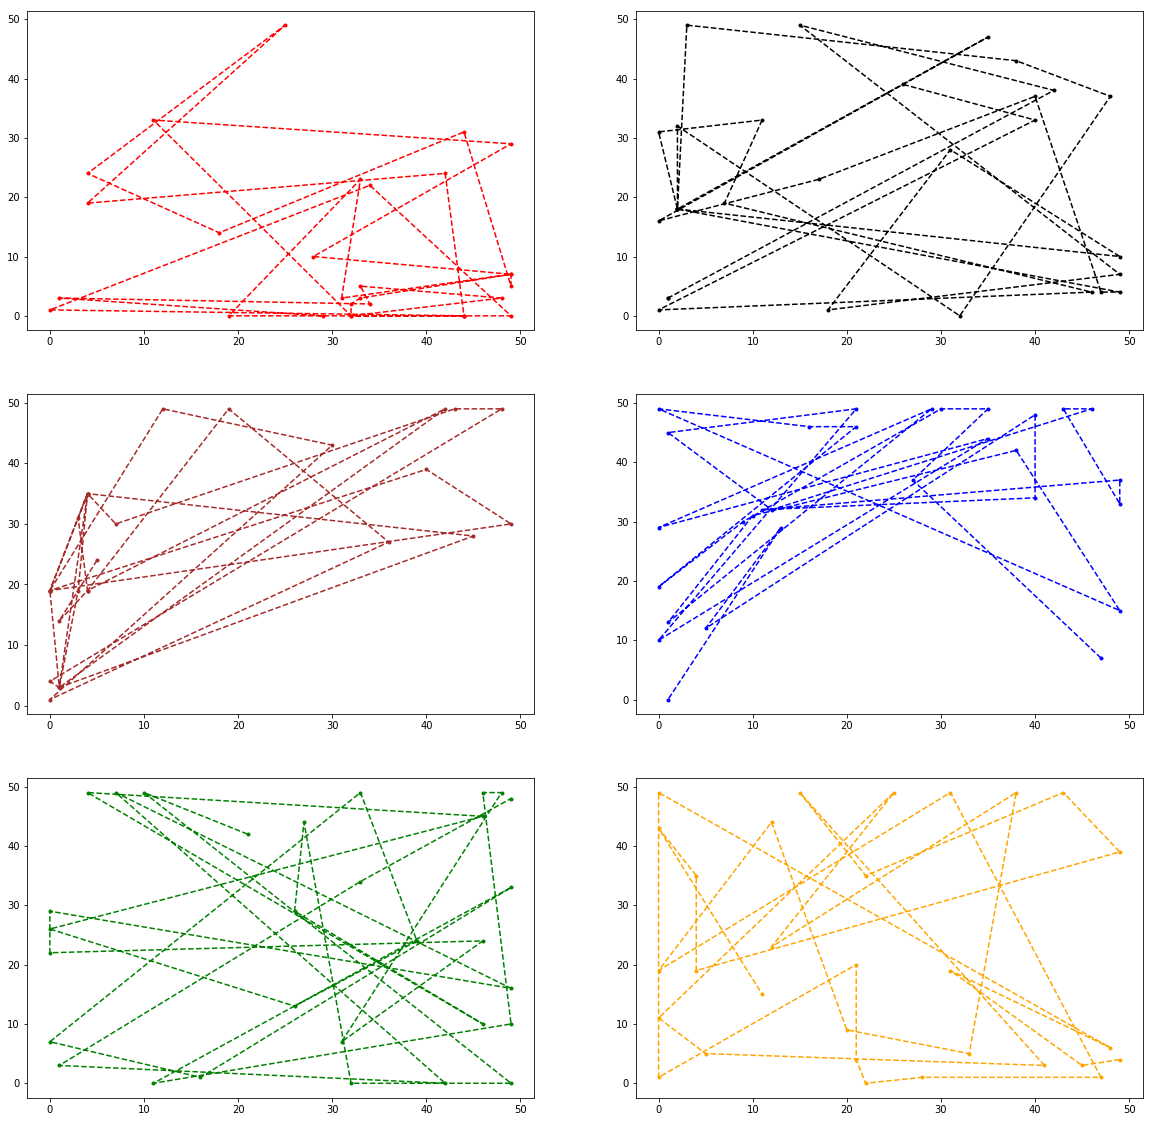

In [86]:
plot_data(som)

### Patterns learned by the neural network which are used to determine de winning neuron of each training instance

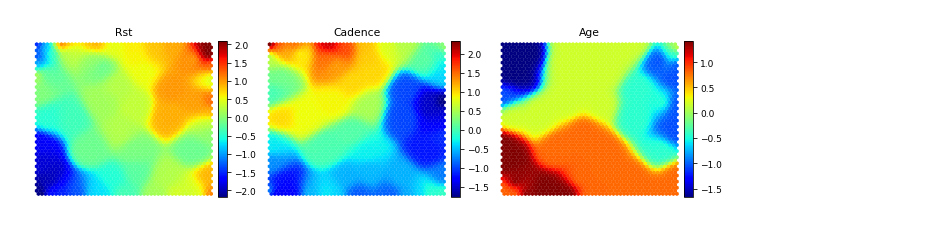

In [87]:
som.component_names = ['Rst', 'Cadence', 'Age']
v = sompy.mapview.View2D(10,10,"", text_size=9)  
v.show(som, which_dim='all', cmap='jet', col_sz=4) #which_dim='all' default

In [88]:
new_complet_data = complet_data.copy()
new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 1].index)
new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 2].index)
new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 3].index)
new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 0].index)

Confusion matrix, without normalization
[[20 10]
 [18 12]]


true_positives total: 32
false_positives total: 28
false_negatives total: 28

Precision:  0.5358851674641147
Recal:  0.5333333333333333
F1-Score:  0.5248868778280543
Accuracy:  0.5333333333333333


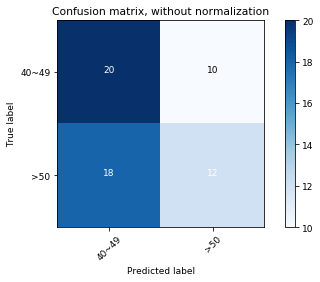

In [89]:
# Replaces age groups number by 0 and 1
new_complet_data.loc[new_complet_data['Age'] == 5, 'Age'] = 1
new_complet_data.loc[new_complet_data['Age'] == 4, 'Age'] = 0
new_complet_data

evaluate_som(group_5_and_6, new_complet_data, classes_name=['40~49', '>50'])

In [90]:
analyse_cluster_per_group(new_complet_data)

Age  Cluster
0    0          20
     1          10
1    0          18
     1          12
Name: Cluster, dtype: int64

In [91]:
new_complet_data = complet_data.copy()
new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 0].index)
new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 1].index)
new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 2].index)
new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 3].index)

Confusion matrix, without normalization
[[18 12]
 [20 10]]


true_positives total: 28
false_positives total: 32
false_negatives total: 32

Precision:  0.46411483253588515
Recal:  0.4666666666666667
F1-Score:  0.45701357466063347
Accuracy:  0.4666666666666667


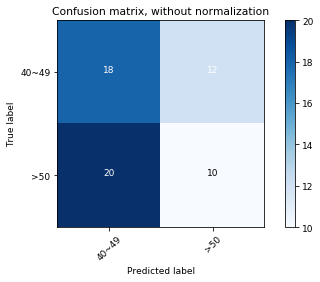

In [92]:
# Replaces age groups number by 0 and 1
new_complet_data.loc[new_complet_data['Age'] == 5, 'Age'] = 0
new_complet_data.loc[new_complet_data['Age'] == 4, 'Age'] = 1
new_complet_data

evaluate_som(group_5_and_6, new_complet_data, classes_name=['40~49', '>50'])

<hr>

# Experiment 9

- Map Size = [50, 50]
- Iterations = 2000
- Only 2 features as input: RST and Cadence
- Only 2 groups to classify
   - Group 1: 0~10
   - Group 2: 20~29

In [93]:
mapsize = [50,50]

rst_cadence = complet_data.drop(['Rsw', 'RssR', 'RssL', 'Rs', 'ACT[s]', 'Age'], axis=1)
rst_cadence = rst_cadence.values

group_0_10 = rst_cadence[:30]
group_10_19 = rst_cadence[30:60]
group_20_29 = rst_cadence[60:90]
group_30_39 = rst_cadence[90:120]
group_40_49 = rst_cadence[120:150]
group_over_50 = rst_cadence[150:]

group_1_and_3 = np.concatenate((group_0_10, group_20_29))

/home/sarai/.virtualenvs/hybrid-approach/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


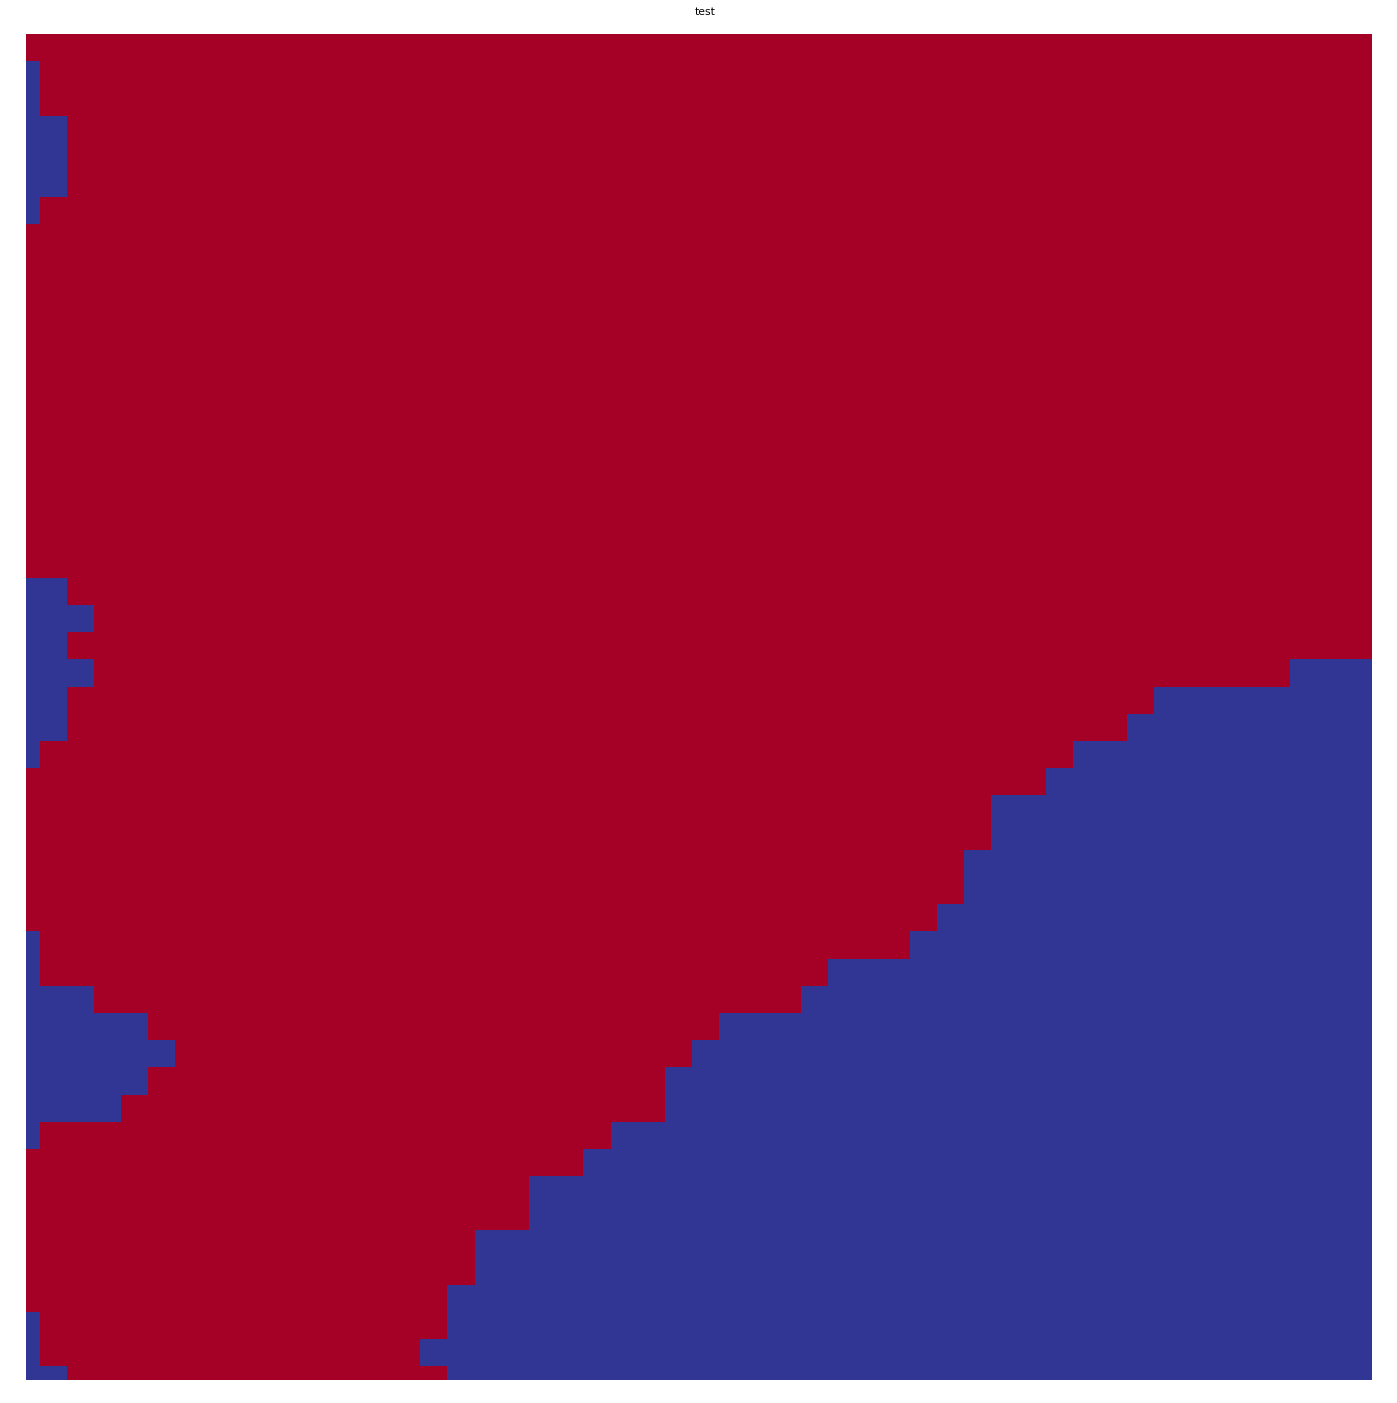

In [94]:
som = sompy.SOMFactory.build(
    group_1_and_3, mapsize, mask=None, mapshape='planar', lattice='hexa', 
    normalization='var', initialization='pca', neighborhood='gaussian', 
    training='batch', name='sompy'
)
som.train(n_job=4, verbose=False, train_finetune_len=100, train_rough_len=2000)

vis = sompy.mapview.View2DPacked(5, 5, 'test',text_size=12)  

kmeans_labels = cluster(som, n_clusters=2)

som.cluster_labels = kmeans_labels.labels_
vis.show(som, what='cluster')

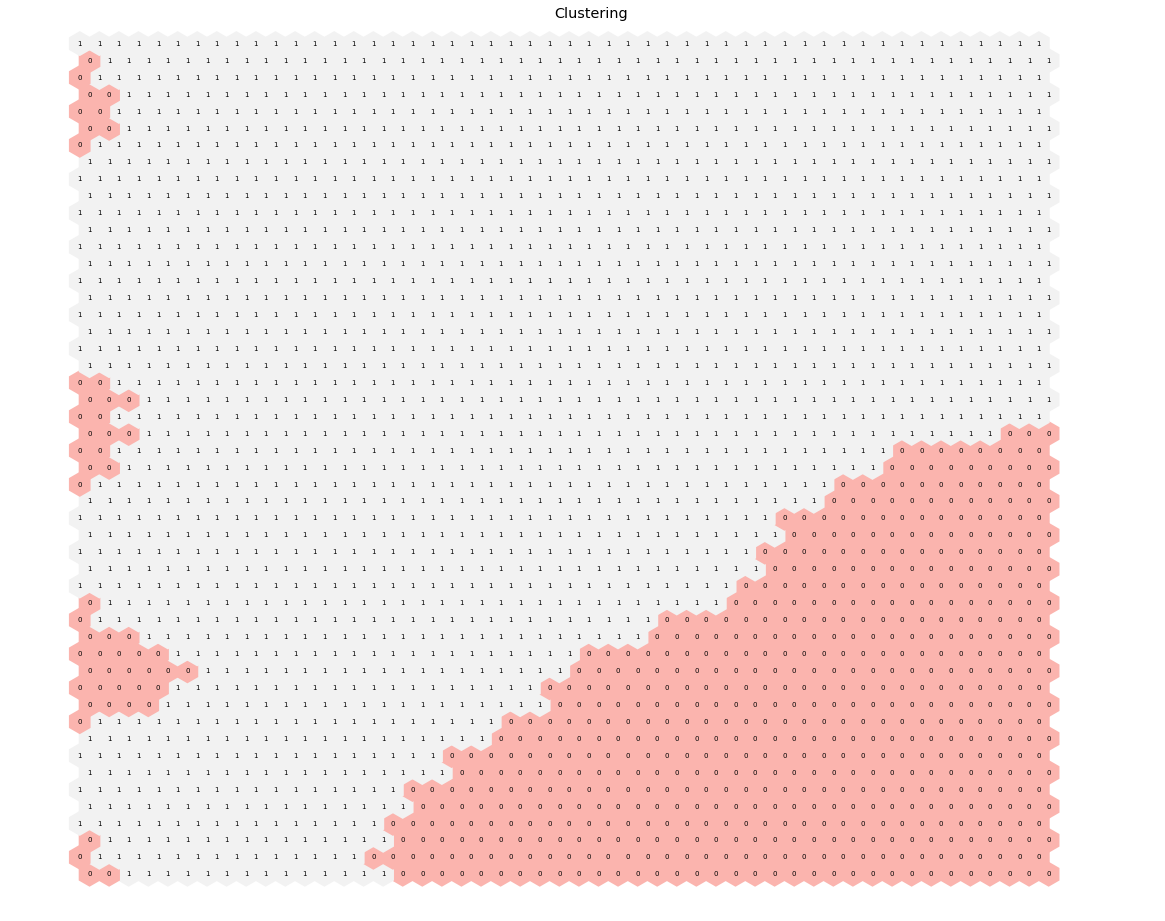

In [95]:
from sompy.visualization.hitmap import HitMapView
hits = HitMapView(20, 20,"Clustering",text_size=10, cmap=plt.cm.jet)
a = hits.show(som, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")
plt.show()

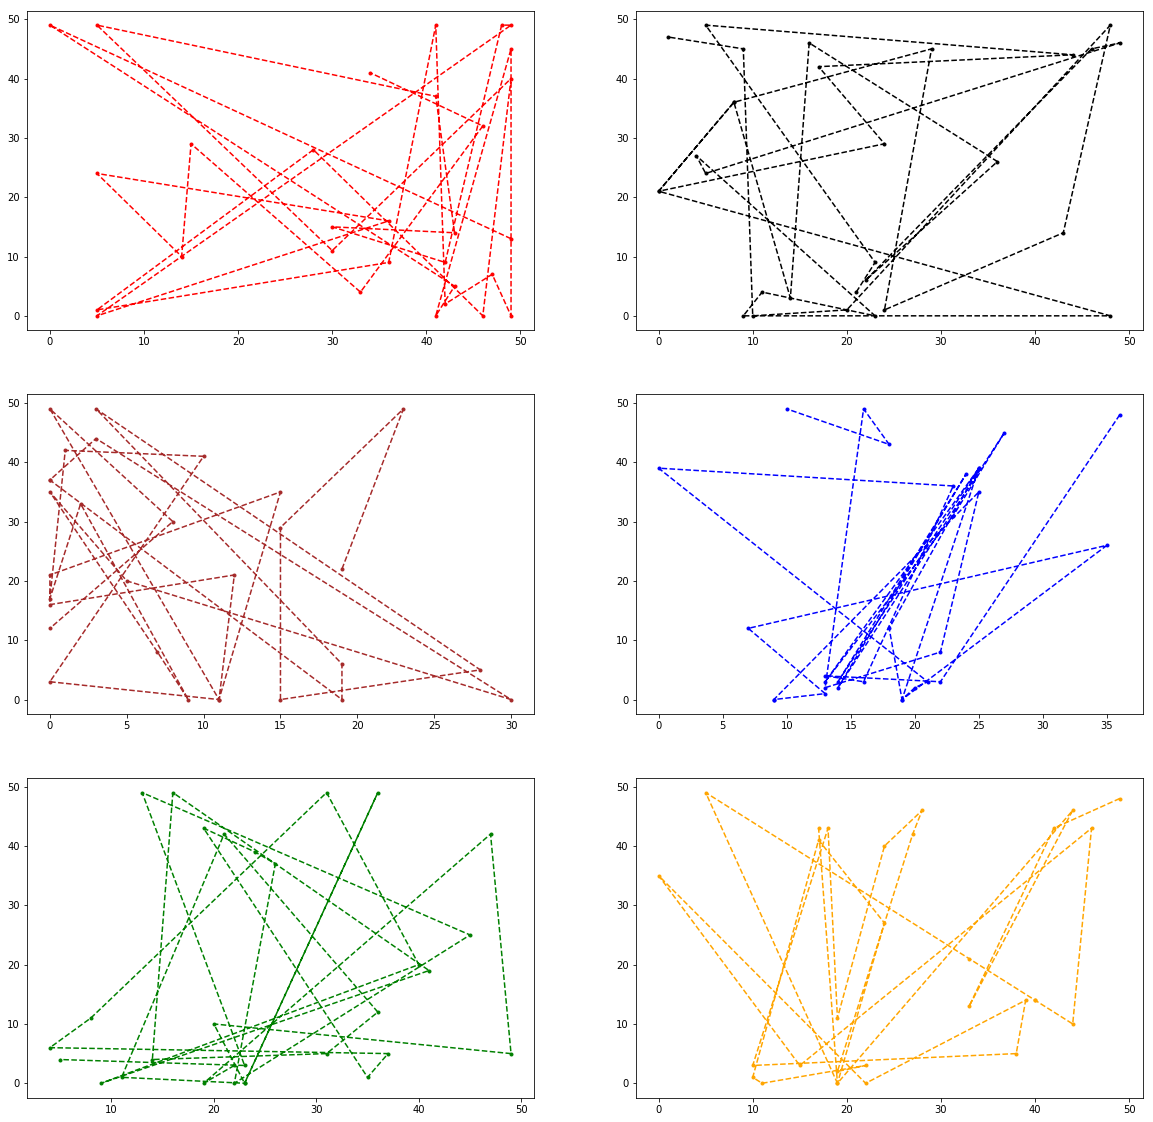

In [96]:
plot_data(som)

### Patterns learned by the neural network which are used to determine de winning neuron of each training instance

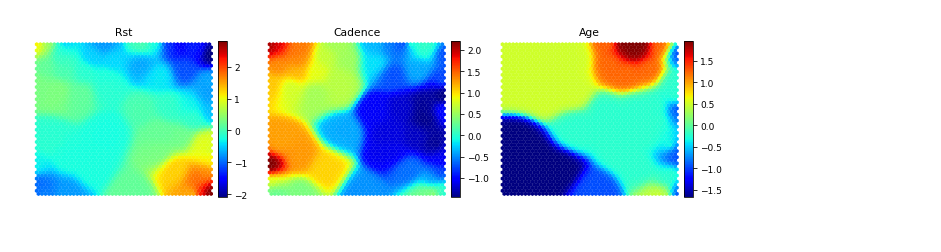

In [97]:
som.component_names = ['Rst', 'Cadence', 'Age']
v = sompy.mapview.View2D(10,10,"", text_size=9)  
v.show(som, which_dim='all', cmap='jet', col_sz=4) #which_dim='all' default

In [98]:
new_complet_data = complet_data.copy()
new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 1].index)
new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 3].index)
new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 4].index)
new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 5].index)

Confusion matrix, without normalization
[[ 7 23]
 [ 9 21]]


true_positives total: 28
false_positives total: 32
false_negatives total: 32

Precision:  0.45738636363636365
Recal:  0.4666666666666667
F1-Score:  0.43595769682726204
Accuracy:  0.4666666666666667


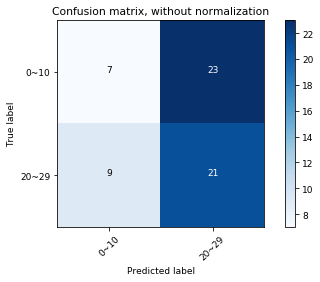

In [99]:
# Replaces age groups number by 0 and 1
new_complet_data.loc[new_complet_data['Age'] == 0, 'Age'] = 1
new_complet_data.loc[new_complet_data['Age'] == 2, 'Age'] = 0
new_complet_data

evaluate_som(group_1_and_3, new_complet_data, classes_name=['0~10', '20~29'])

In [100]:
analyse_cluster_per_group(new_complet_data)

Age  Cluster
0    1          23
     0           7
1    1          21
     0           9
Name: Cluster, dtype: int64

In [101]:
new_complet_data = complet_data.copy()
new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 1].index)
new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 3].index)
new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 4].index)
new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 5].index)

Confusion matrix, without normalization
[[ 9 21]
 [ 7 23]]


true_positives total: 32
false_positives total: 28
false_negatives total: 28

Precision:  0.5426136363636364
Recal:  0.5333333333333333
F1-Score:  0.5064629847238542
Accuracy:  0.5333333333333333


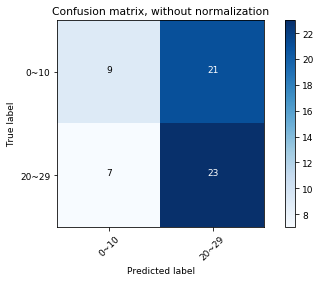

In [102]:
# Replaces age groups number by 0 and 1
new_complet_data.loc[new_complet_data['Age'] == 0, 'Age'] = 0
new_complet_data.loc[new_complet_data['Age'] == 2, 'Age'] = 1
new_complet_data

evaluate_som(group_1_and_3, new_complet_data, classes_name=['0~10', '20~29'])

<hr>

# Experiment 10

- Map Size = [50, 50]
- Iterations = 2000
- Only 2 features as input: Rsw & ACT
- Only 2 groups to classify
   - Group 1: 40~49
   - Group 2: >50

In [103]:
mapsize = [50,50]

rsw_act = complet_data.drop(['Rst', 'RssR', 'RssL', 'Rs', 'Cadence', 'Age'], axis=1)
rsw_act = rsw_act.values

group_0_10 = rsw_act[:30]
group_10_19 = rsw_act[30:60]
group_20_29 = rsw_act[60:90]
group_30_39 = rsw_act[90:120]
group_40_49 = rsw_act[120:150]
group_over_50 = rsw_act[150:]

group_5_and_6 = np.concatenate((group_40_49, group_over_50))

/home/sarai/.virtualenvs/hybrid-approach/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


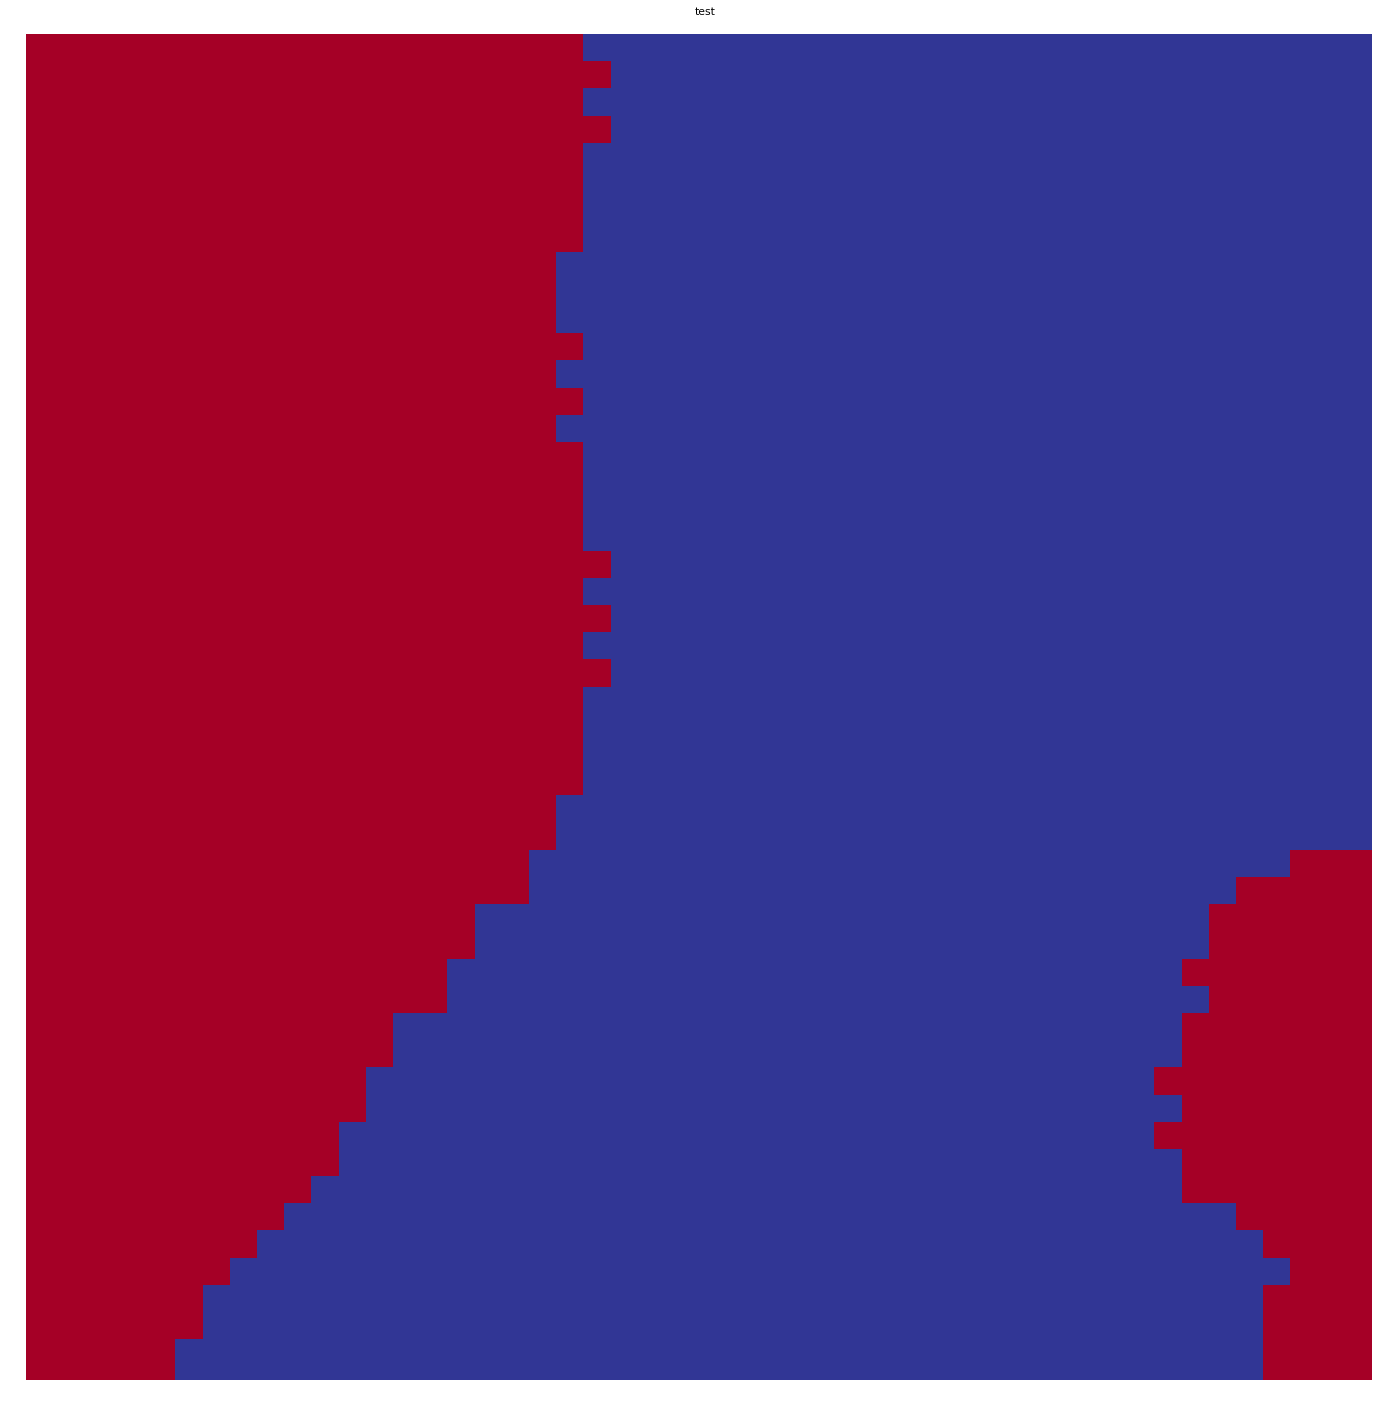

In [104]:
som = sompy.SOMFactory.build(
    group_5_and_6, mapsize, mask=None, mapshape='planar', lattice='hexa', 
    normalization='var', initialization='pca', neighborhood='gaussian', 
    training='batch', name='sompy'
)
som.train(n_job=4, verbose=False, train_finetune_len=100, train_rough_len=2000)

vis = sompy.mapview.View2DPacked(5, 5, 'test',text_size=12)  

kmeans_labels = cluster(som, n_clusters=2)

som.cluster_labels = kmeans_labels.labels_
vis.show(som, what='cluster')

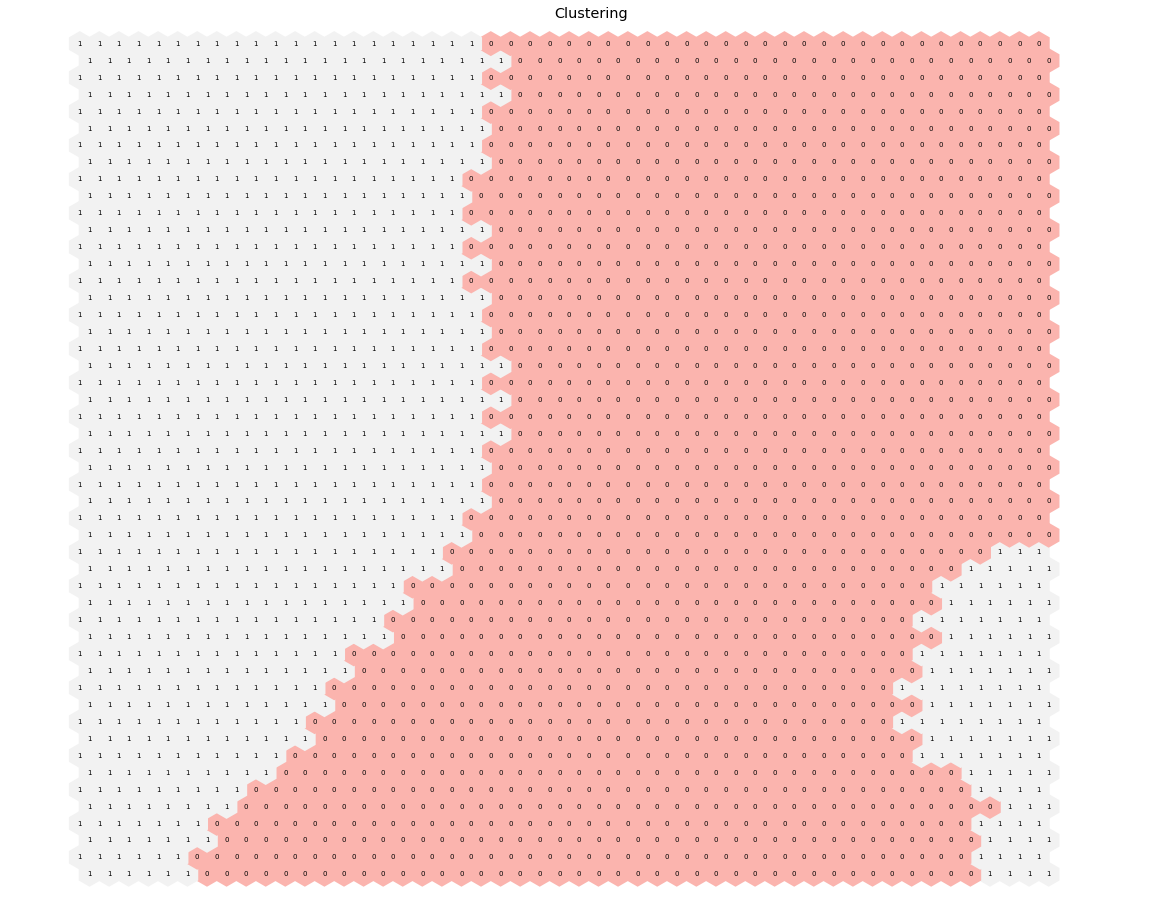

In [105]:
from sompy.visualization.hitmap import HitMapView
hits = HitMapView(20, 20,"Clustering",text_size=10, cmap=plt.cm.jet)
a = hits.show(som, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")
plt.show()

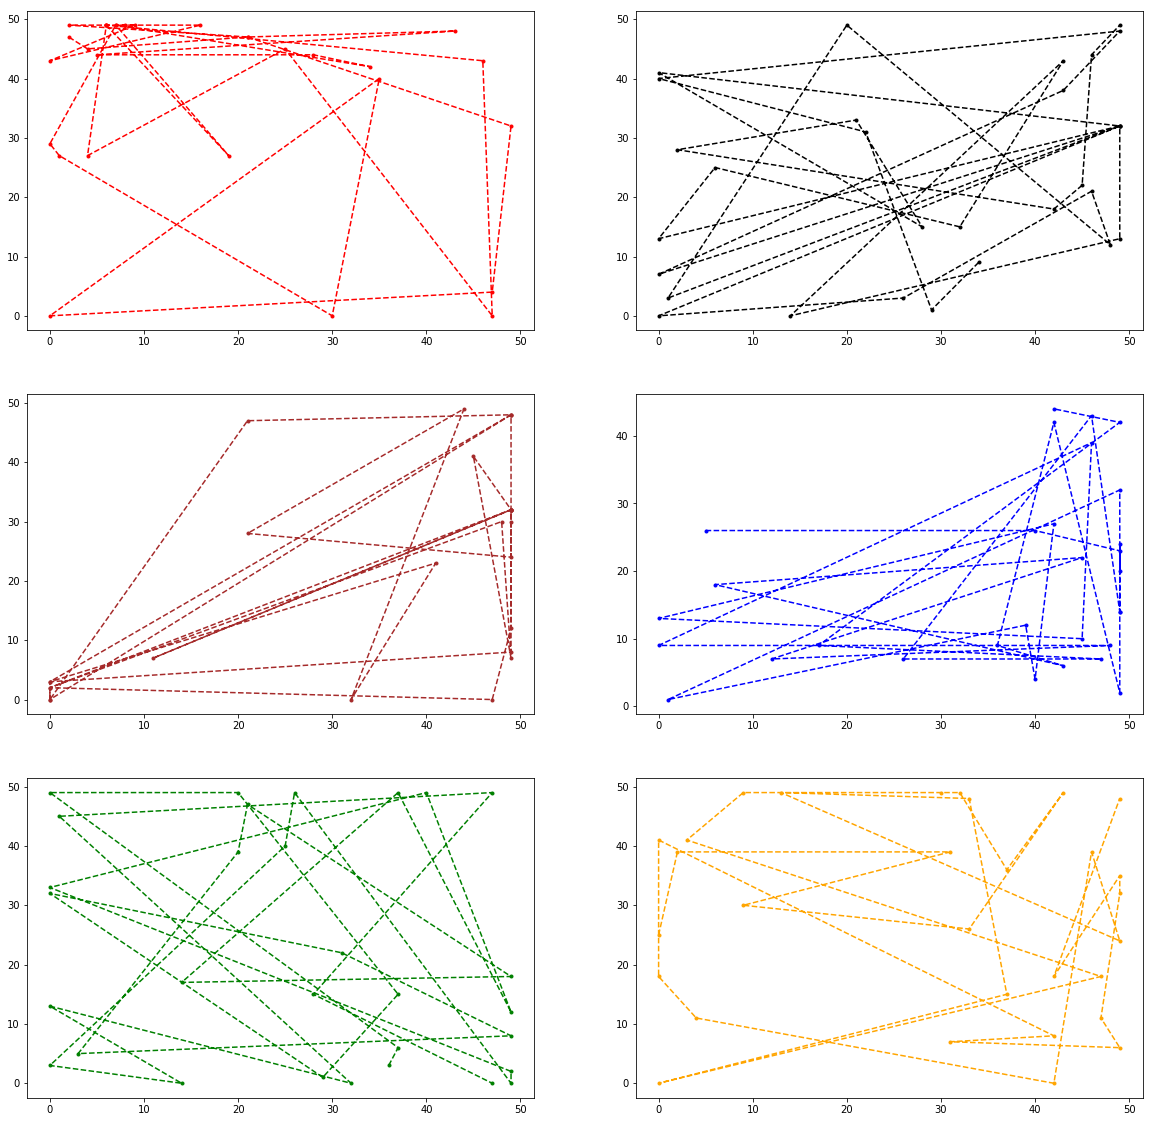

In [106]:
plot_data(som)

### Patterns learned by the neural network which are used to determine de winning neuron of each training instance

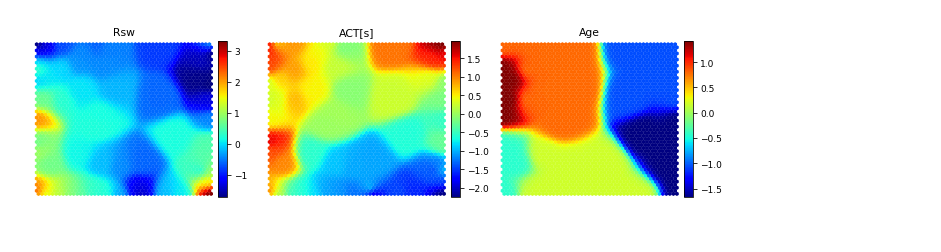

In [107]:
som.component_names = ['Rsw', 'ACT[s]', 'Age']
v = sompy.mapview.View2D(10,10,"", text_size=9)  
v.show(som, which_dim='all', cmap='jet', col_sz=4) #which_dim='all' default

In [108]:
new_complet_data = complet_data.copy()
new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 1].index)
new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 2].index)
new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 3].index)
new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 0].index)

Confusion matrix, without normalization
[[20 10]
 [18 12]]


true_positives total: 32
false_positives total: 28
false_negatives total: 28

Precision:  0.5358851674641147
Recal:  0.5333333333333333
F1-Score:  0.5248868778280543
Accuracy:  0.5333333333333333


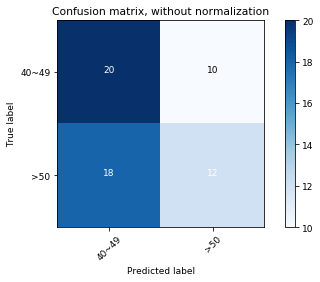

In [109]:
# Replaces age groups number by 0 and 1
new_complet_data.loc[new_complet_data['Age'] == 5, 'Age'] = 1
new_complet_data.loc[new_complet_data['Age'] == 4, 'Age'] = 0
new_complet_data

evaluate_som(group_5_and_6, new_complet_data, classes_name=['40~49', '>50'])

In [110]:
analyse_cluster_per_group(new_complet_data)

Age  Cluster
0    0          20
     1          10
1    0          18
     1          12
Name: Cluster, dtype: int64

In [111]:
new_complet_data = complet_data.copy()
new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 0].index)
new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 1].index)
new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 2].index)
new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 3].index)

Confusion matrix, without normalization
[[18 12]
 [20 10]]


true_positives total: 28
false_positives total: 32
false_negatives total: 32

Precision:  0.46411483253588515
Recal:  0.4666666666666667
F1-Score:  0.45701357466063347
Accuracy:  0.4666666666666667


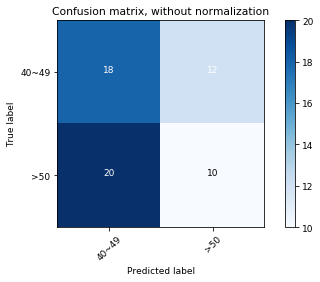

In [112]:
# Replaces age groups number by 0 and 1
new_complet_data.loc[new_complet_data['Age'] == 5, 'Age'] = 0
new_complet_data.loc[new_complet_data['Age'] == 4, 'Age'] = 1
new_complet_data

evaluate_som(group_5_and_6, new_complet_data, classes_name=['40~49', '>50'])

<hr>

# Experiment 11

- Map Size = [50, 50]
- Iterations = 2000
- Only 2 features as input: Rsw & ACT
- Only 2 groups to classify
   - Group 1: 0~10
   - Group 2: 20~29

In [113]:
mapsize = [50,50]

rsw_act = complet_data.drop(['Rst', 'RssR', 'RssL', 'Rs', 'Cadence', 'Age'], axis=1)
rsw_act = rsw_act.values

group_0_10 = rsw_act[:30]
group_10_19 = rsw_act[30:60]
group_20_29 = rsw_act[60:90]
group_30_39 = rsw_act[90:120]
group_40_49 = rsw_act[120:150]
group_over_50 = rsw_act[150:]

group_1_and_3 = np.concatenate((group_0_10, group_20_29))

/home/sarai/.virtualenvs/hybrid-approach/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


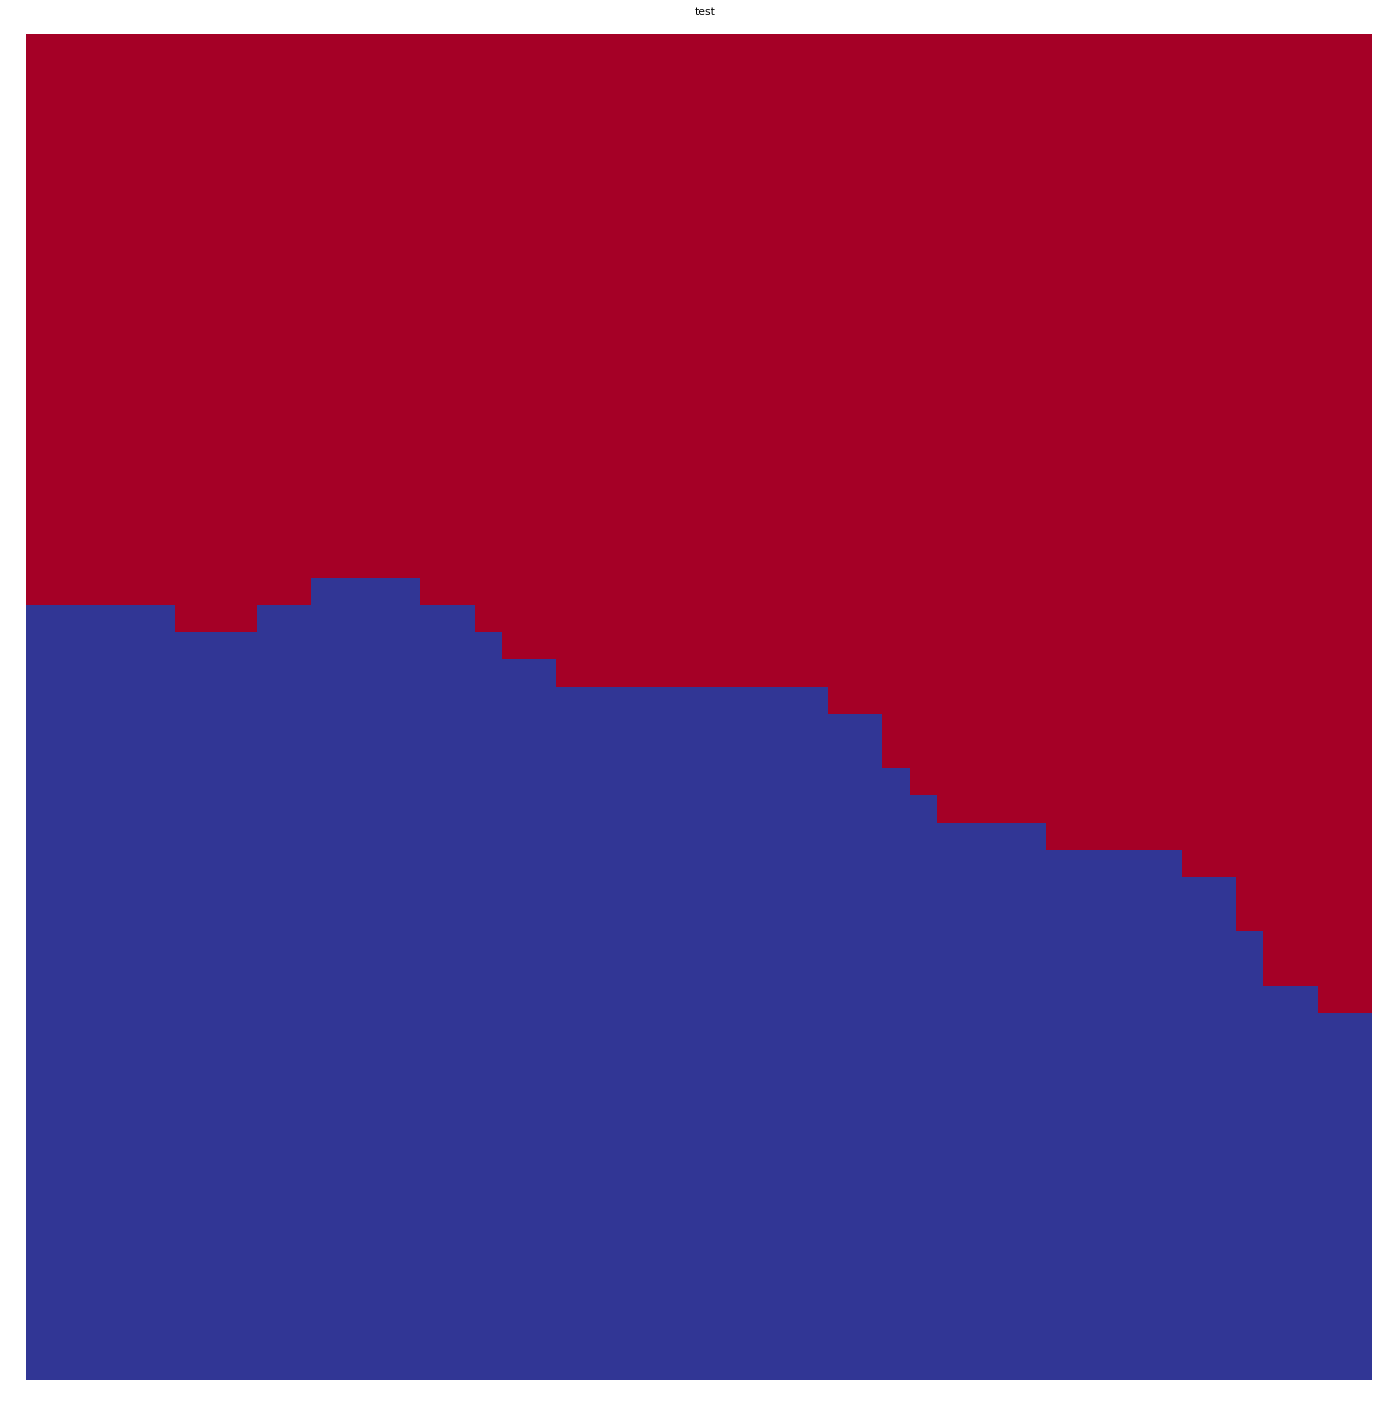

In [114]:
som = sompy.SOMFactory.build(
    group_1_and_3, mapsize, mask=None, mapshape='planar', lattice='hexa', 
    normalization='var', initialization='pca', neighborhood='gaussian', 
    training='batch', name='sompy'
)
som.train(n_job=4, verbose=False, train_finetune_len=100, train_rough_len=2000)

vis = sompy.mapview.View2DPacked(5, 5, 'test',text_size=12)  

kmeans_labels = cluster(som, n_clusters=2)

som.cluster_labels = kmeans_labels.labels_
vis.show(som, what='cluster')

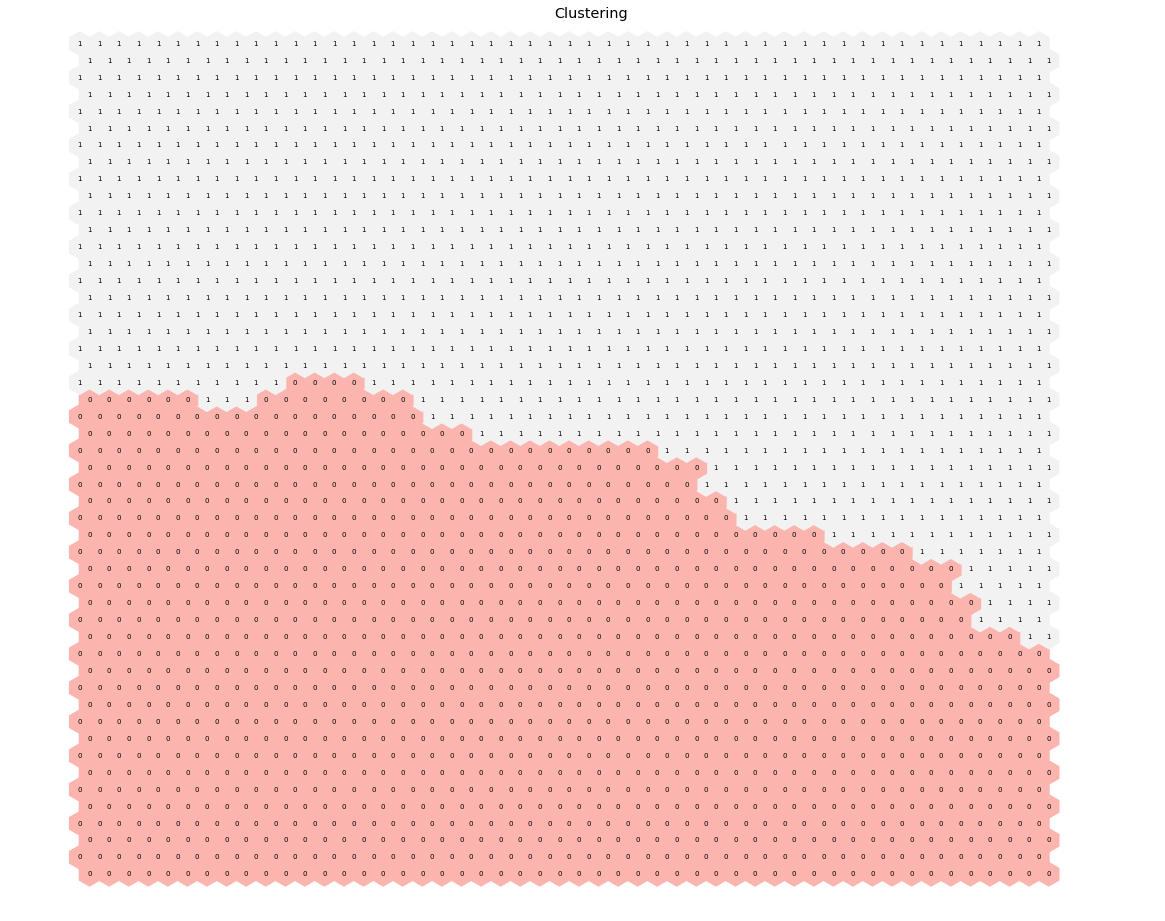

In [115]:
from sompy.visualization.hitmap import HitMapView
hits = HitMapView(20, 20,"Clustering",text_size=10, cmap=plt.cm.jet)
a = hits.show(som, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")
plt.show()

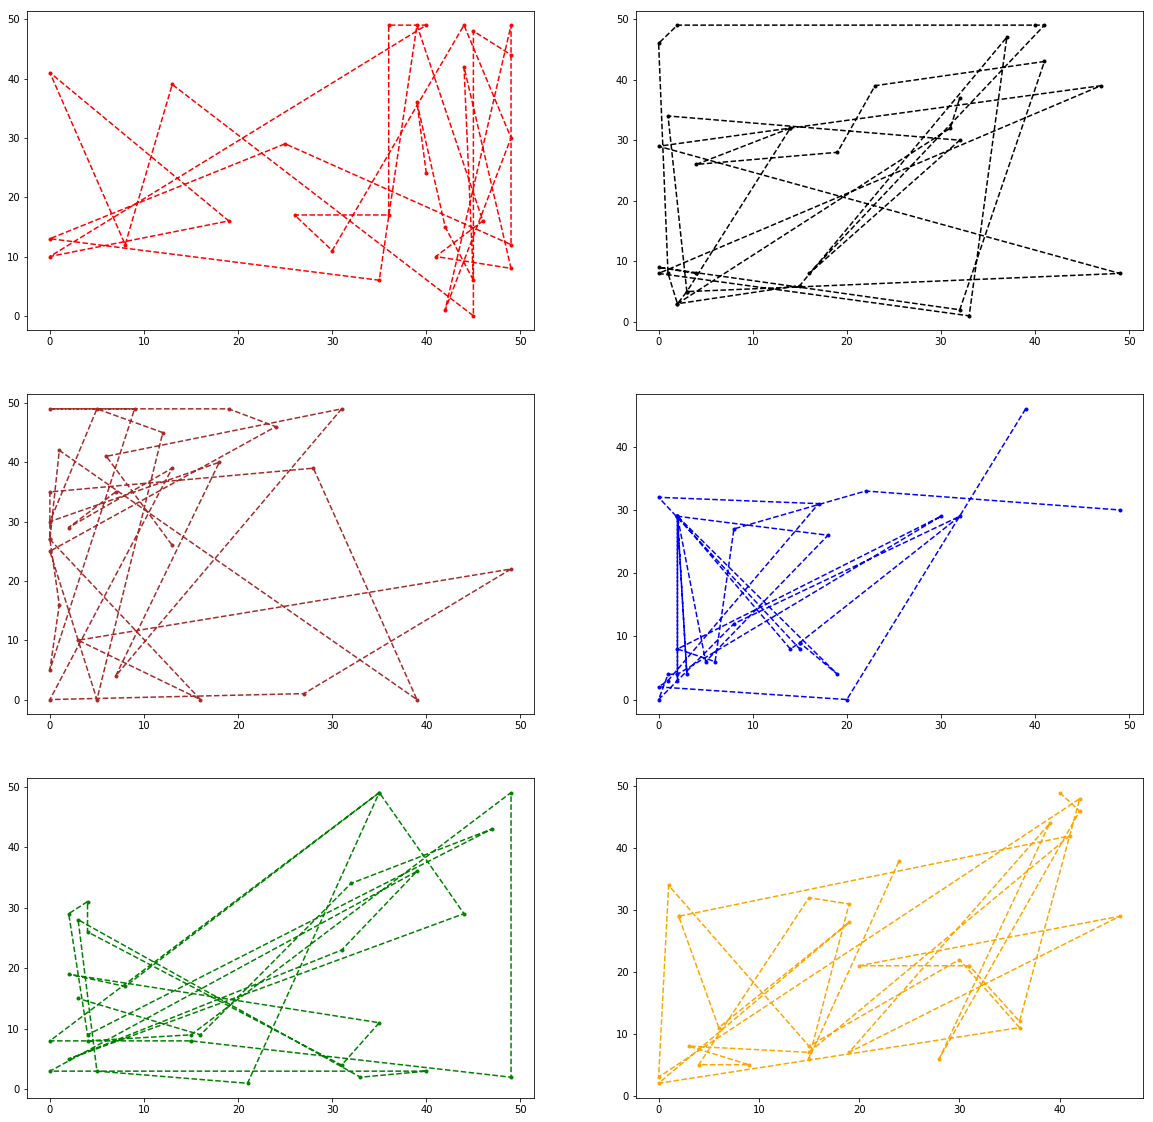

In [116]:
plot_data(som)

### Patterns learned by the neural network which are used to determine de winning neuron of each training instance

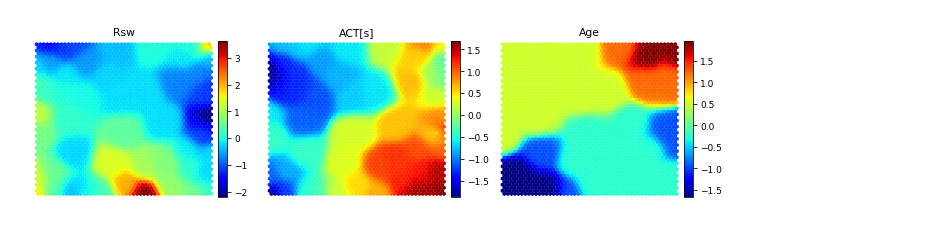

In [117]:
som.component_names = ['Rsw', 'ACT[s]', 'Age']
v = sompy.mapview.View2D(10,10,"", text_size=9)  
v.show(som, which_dim='all', cmap='jet', col_sz=4) #which_dim='all' default

In [118]:
new_complet_data = complet_data.copy()
new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 1].index)
new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 3].index)
new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 4].index)
new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 5].index)

Confusion matrix, without normalization
[[20 10]
 [12 18]]


true_positives total: 38
false_positives total: 22
false_negatives total: 22

Precision:  0.6339285714285714
Recal:  0.6333333333333333
F1-Score:  0.6329254727474972
Accuracy:  0.6333333333333333


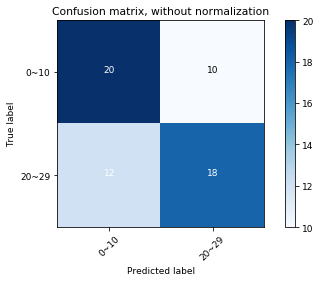

In [119]:
# Replaces age groups number by 0 and 1
new_complet_data.loc[new_complet_data['Age'] == 0, 'Age'] = 1
new_complet_data.loc[new_complet_data['Age'] == 2, 'Age'] = 0
new_complet_data

evaluate_som(group_1_and_3, new_complet_data, classes_name=['0~10', '20~29'])

In [120]:
analyse_cluster_per_group(new_complet_data)

Age  Cluster
0    0          20
     1          10
1    1          18
     0          12
Name: Cluster, dtype: int64

In [121]:
new_complet_data = complet_data.copy()
new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 1].index)
new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 3].index)
new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 4].index)
new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 5].index)

Confusion matrix, without normalization
[[12 18]
 [20 10]]


true_positives total: 22
false_positives total: 38
false_negatives total: 38

Precision:  0.3660714285714286
Recal:  0.36666666666666664
F1-Score:  0.3659621802002225
Accuracy:  0.36666666666666664


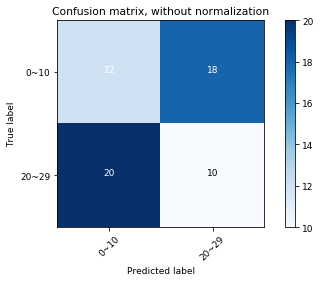

In [122]:
# Replaces age groups number by 0 and 1
new_complet_data.loc[new_complet_data['Age'] == 0, 'Age'] = 0
new_complet_data.loc[new_complet_data['Age'] == 2, 'Age'] = 1
new_complet_data

evaluate_som(group_1_and_3, new_complet_data, classes_name=['0~10', '20~29'])

<hr>